In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber, clusterwise_optimization
from Code.loading_data import *

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection(optional parameter)?
What is the maximum amount of containers in a cluster that is considered to be useful?8
Where to get db files(local/online)?local
DB relation POIs loaded


..\Code\loading_data.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3])\


distance matrix loaded
API data loaded
Table all households created
API and DB joined
containers per cluster determined


In [46]:
joined_final3 = pd.read_csv('../Results/hillclimber_best_config2020-05-07-14.csv')
joined_final2 = pd.read_csv('../Results/hillclimber_best_config2020-05-05-21.csv')
joined_final1 = pd.read_csv('../Results/hillclimber_best_config2020-05-05-7.csv')
joined_final0 = pd.read_csv('../Results/hillclimber_best_config2020-05-04-23.csv')
joined_final = joined_final3.append([joined_final2, joined_final1, joined_final0])
joined_final_clean = joined_final[joined_final['totaal'] <= 8]
new = joined_final_clean[['s1_afv_nodes', 'cluster_x', 'cluster_y', 'totaal', 'glas', 'papier', 'plastic', 'rest', 
                          'textiel', 'stadsdeel']]\
.set_index('s1_afv_nodes').join(
joined[['s1_afv_nodes', 'totaal', 'glas', 'papier', 'plastic', 'rest', 'textiel']].set_index('s1_afv_nodes'), rsuffix='_old')
new = new.reindex(sorted(new.columns), axis=1)
new.max()

cluster_x      129898
cluster_y      493064
glas                3
glas_old            4
papier              5
papier_old          4
plastic             3
plastic_old         4
rest                8
rest_old            8
stadsdeel           T
textiel             2
textiel_old         3
totaal              8
totaal_old          8
dtype: object

In [ ]:
hillclimber_df, best_solution = random_start_hillclimber(joined, all_households, rel_poi_df, df_afstandn2)

How many random iterations?25
How many iterations hillclimber?100
Do you want the results saved(True/False)?False
Do you want to only use a subset of data?True
Do you want to use addresses over clusters?True
Do you want to apply simulated annealing? (True/False)False
Optimize on (score/penalties)?penalties
What method (2-opt, dim Gaussian, Gaussian)?dim Gaussian
Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection(optional parameter)?
What is the maximum amount of containers in a cluster that is considered to be useful?8
Where to get db files(local/online)?local
DB relation POIs loaded


..\Code\loading_data.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3])\


distance matrix loaded
API data loaded
Table all households created
API and DB joined
containers per cluster determined
Average distance is : 251.30602484352022
Penalties are: 308.46003618693135
Average distance is : 262.68707861242126
Penalties are: 329.5882014848634
Average distance is : 264.29331524896025
Penalties are: 311.78427056669005
Average distance is : 257.3456968404479
Penalties are: 335.73237476351073
Average distance is : 264.4934161809172
Penalties are: 332.0103664651201
Average distance is : 268.3358078151984
Penalties are: 329.2046807469255
Average distance is : 265.8284350964229
Penalties are: 320.34603872413936
Average distance is : 263.36072735518553
Penalties are: 334.6499287212602
Average distance is : 268.9312795505076
Penalties are: 321.4193104643963
Average distance is : 269.1461170369657
Penalties are: 326.26183759822277
Average distance is : 269.7868671767888
Penalties are: 309.3706006251799
Average distance is : 261.06929453544274
Penalties are: 339.79595089

Average distance is : 252.27823047349654
Penalties are: 295.34334351870996
295.34334351870996 296.51156063675836
Amount of clusters to change: 3
Average distance is : 252.27032799504826
Penalties are: 295.3322673351251
295.3322673351251 295.34334351870996
Amount of clusters to change: 3
Average distance is : 252.27032799504826
Penalties are: 295.3322673351251
295.3322673351251 295.3322673351251
Average distance is : 252.27032799504826
Penalties are: 295.3322673351251
295.3322673351251 295.3322673351251
Amount of clusters to change: 3
Average distance is : 252.27032799504826
Penalties are: 295.3322673351251
295.3322673351251 295.3322673351251
Amount of clusters to change: 5
Average distance is : 249.55706913668755
Penalties are: 300.0451635521746
300.0451635521746 295.3322673351251
Amount of clusters to change: 4
Average distance is : 252.27032799504826
Penalties are: 295.3322673351251
295.3322673351251 295.3322673351251
Amount of clusters to change: 2
Average distance is : 252.27032799

Average distance is : 250.91213224524057
Penalties are: 411.09282446106903
Average distance is : 245.9991623849047
Penalties are: 400.7785240528513
Average distance is : 246.4355515649592
Penalties are: 400.9557102600015
Average distance is : 250.67196037443625
Penalties are: 410.8550063558905
Average distance is : 245.31644970297208
Penalties are: 401.5430945355406
***************************************
246.95621998785953 399.44202945063614 11
Average distance is : 246.95621998785953
Penalties are: 399.44202945063614
Amount of clusters to change: 33
Average distance is : 248.78156587344716
Penalties are: 405.7584514745044
405.7584514745044 399.44202945063614
Amount of clusters to change: 38
Average distance is : 246.92948669893747
Penalties are: 406.694202929283
406.694202929283 399.44202945063614
Amount of clusters to change: 44
Average distance is : 243.04258849518658
Penalties are: 397.5811364927508
397.5811364927508 399.44202945063614
Amount of clusters to change: 33
Average dist

Average distance is : 243.11697476272633
Penalties are: 380.1046352715466
380.1046352715466 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Amount of clusters to change: 2
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Amount of clusters to change: 4
Average distance is : 243.17701508297552
Penalties are: 381.626687819756
381.626687819756 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.0549568280205
380.0549568280205 380.0549568280205
Average distance is : 243.1619915947242
Penalties are: 380.05495

Average distance is : 163.7776290044081
Penalties are: 219.47168885809418
219.47168885809418 218.44061324749313
Amount of clusters to change: 52
Average distance is : 163.76798115729937
Penalties are: 219.8486473045018
219.8486473045018 218.44061324749313
Amount of clusters to change: 41
Average distance is : 164.14974960045367
Penalties are: 216.80086460919608
216.80086460919608 218.44061324749313
Amount of clusters to change: 55
Average distance is : 164.58582479933324
Penalties are: 216.91579591777815
216.91579591777815 216.80086460919608
Amount of clusters to change: 35
Average distance is : 165.20256019865178
Penalties are: 217.73442341744135
217.73442341744135 216.80086460919608
Amount of clusters to change: 31
Average distance is : 164.315888657111
Penalties are: 218.20824980272147
218.20824980272147 216.80086460919608
Amount of clusters to change: 30
Average distance is : 165.01992644984776
Penalties are: 216.01833391073387
216.01833391073387 216.80086460919608
Amount of cluste

Average distance is : 162.3440643925645
Penalties are: 207.68141323594512
207.68141323594512 207.64676920337973
Amount of clusters to change: 2
Average distance is : 162.35626009941365
Penalties are: 207.69688406759437
207.69688406759437 207.64676920337973
Average distance is : 162.3440643925645
Penalties are: 207.64676920337973
207.64676920337973 207.64676920337973
Average distance is : 162.3440643925645
Penalties are: 207.64676920337973
207.64676920337973 207.64676920337973
Amount of clusters to change: 3
Average distance is : 162.3430768508905
Penalties are: 207.64676920337973
207.64676920337973 207.64676920337973
Average distance is : 162.3440643925645
Penalties are: 207.64676920337973
207.64676920337973 207.64676920337973
Amount of clusters to change: 2
Average distance is : 161.98000555819172
Penalties are: 207.16882094809168
207.16882094809168 207.64676920337973
Amount of clusters to change: 3
Average distance is : 161.9457914941483
Penalties are: 207.34210636680334
207.34210636

Average distance is : 156.54510473857255
Penalties are: 294.27634984713876
294.27634984713876 293.47587630080045
Amount of clusters to change: 98
Average distance is : 156.45684682071308
Penalties are: 293.77622122382013
293.77622122382013 293.47587630080045
Amount of clusters to change: 91
Average distance is : 157.22415781848068
Penalties are: 293.8740972724313
293.8740972724313 293.47587630080045
Amount of clusters to change: 94
Average distance is : 156.43838141496786
Penalties are: 293.862033001535
293.862033001535 293.47587630080045
Amount of clusters to change: 78
Average distance is : 156.76690501429988
Penalties are: 295.171949674192
295.171949674192 293.47587630080045
Amount of clusters to change: 69
Average distance is : 156.59855507392473
Penalties are: 292.90342241288175
292.90342241288175 293.47587630080045
Amount of clusters to change: 68
Average distance is : 156.75070130124396
Penalties are: 293.91870096706396
293.91870096706396 292.90342241288175
Amount of clusters to

Average distance is : 156.97997703030398
Penalties are: 291.0021098382977
291.0021098382977 291.0021098382977
Amount of clusters to change: 2
Average distance is : 156.97997703030398
Penalties are: 291.0021098382977
291.0021098382977 291.0021098382977
Amount of clusters to change: 3
Average distance is : 156.9637690629755
Penalties are: 291.0385461574567
291.0385461574567 291.0021098382977
Amount of clusters to change: 6
Average distance is : 157.03679215850337
Penalties are: 291.0172379526733
291.0172379526733 291.0021098382977
Average distance is : 156.97997703030398
Penalties are: 291.0021098382977
291.0021098382977 291.0021098382977
Amount of clusters to change: 2
Average distance is : 156.97997703030398
Penalties are: 291.0021098382977
291.0021098382977 291.0021098382977
Average distance is : 156.97997703030398
Penalties are: 291.0021098382977
291.0021098382977 291.0021098382977
Amount of clusters to change: 3
Average distance is : 156.97997703030398
Penalties are: 291.00210983829

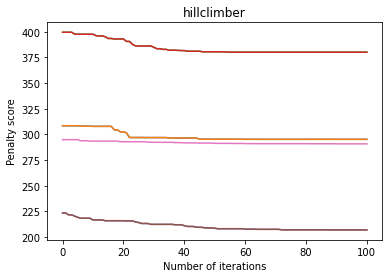

In [53]:
joined_optimized = clusterwise_optimization()

In [ ]:
joined_optimzed2 = clusterwise_optimization()

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses over clusters?True
Do you want to apply simulated annealing? (True/False)False
Optimize on (score/penalties)?penalties
What method (2-opt, dim Gaussian, Gaussian)?Gaussian
Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection(optional parameter)?
What is the maximum amount of containers in a cluster that is considered to be useful?8
Where to get db files(local/online)?local
DB relation POIs loaded


..\Code\loading_data.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3])\


distance matrix loaded
API data loaded
Table all households created
API and DB joined
containers per cluster determined
Average distance is : 251.30602484352022
Penalties are: 308.46003618693135
Average distance is : 267.0206765476193
Penalties are: 321.8176798420598
Average distance is : 262.91407953726207
Penalties are: 329.0624121930149
Average distance is : 259.54570750715374
Penalties are: 324.95108470428556
Average distance is : 270.81853934698313
Penalties are: 305.6580804713527
Average distance is : 257.440001504591
Penalties are: 314.28175937901585
Average distance is : 258.1364615549219
Penalties are: 313.0226625879159
Average distance is : 267.67608296158494
Penalties are: 333.00554804014314
Average distance is : 267.8420468890492
Penalties are: 323.90105358906817
Average distance is : 271.269368131916
Penalties are: 323.6145826272929
Average distance is : 264.98388272927286
Penalties are: 340.9993086249485
Average distance is : 267.0822100430724
Penalties are: 323.868888815

Average distance is : 271.60376728349814
Penalties are: 305.1460187965286
305.1460187965286 302.68584905194746
Amount of clusters to change: 15
Average distance is : 270.74221155132193
Penalties are: 295.34076991732815
295.34076991732815 302.68584905194746
Amount of clusters to change: 15
Average distance is : 269.19339934444525
Penalties are: 295.9626601612306
295.9626601612306 295.34076991732815
Amount of clusters to change: 10
Average distance is : 270.721772589886
Penalties are: 297.5081642331263
297.5081642331263 295.34076991732815
Amount of clusters to change: 11
Average distance is : 271.9569350627305
Penalties are: 295.05444943034587
295.05444943034587 295.34076991732815
Amount of clusters to change: 14
Average distance is : 270.0388753854276
Penalties are: 296.06464154978823
296.06464154978823 295.05444943034587
Amount of clusters to change: 13
Average distance is : 267.08239401620114
Penalties are: 297.7316216427426
297.7316216427426 295.05444943034587
Amount of clusters to c

Average distance is : 261.036823890561
Penalties are: 273.78025776333646
273.78025776333646 271.9275513716941
Amount of clusters to change: 10
Average distance is : 262.43985694821424
Penalties are: 276.3675645745074
276.3675645745074 271.9275513716941
Amount of clusters to change: 8
Average distance is : 261.631730847665
Penalties are: 272.2991251182495
272.2991251182495 271.9275513716941
Amount of clusters to change: 18
Average distance is : 262.24705841558966
Penalties are: 278.43549376876564
278.43549376876564 271.9275513716941
Amount of clusters to change: 18
Average distance is : 259.2501315960689
Penalties are: 281.300989861391
281.300989861391 271.9275513716941
Amount of clusters to change: 10
Average distance is : 261.53832989269023
Penalties are: 270.98847731666183
270.98847731666183 271.9275513716941
Amount of clusters to change: 9
Average distance is : 261.34326376222623
Penalties are: 274.572829000946
274.572829000946 270.98847731666183
Amount of clusters to change: 13
Ave

Average distance is : 261.2808748147906
Penalties are: 267.72152502776294
267.72152502776294 264.9168922181549
Amount of clusters to change: 17
Average distance is : 266.3714662578752
Penalties are: 278.37772066384235
278.37772066384235 264.9168922181549
Amount of clusters to change: 13
Average distance is : 262.0453641280459
Penalties are: 262.5147288076338
262.5147288076338 264.9168922181549
Amount of clusters to change: 13
Average distance is : 262.86755263866183
Penalties are: 266.29108372064326
266.29108372064326 262.5147288076338
Amount of clusters to change: 12
Average distance is : 262.4759862149174
Penalties are: 266.0322359437338
266.0322359437338 262.5147288076338
Amount of clusters to change: 13
Average distance is : 261.41371544774404
Penalties are: 267.90563834162793
267.90563834162793 262.5147288076338
Amount of clusters to change: 10
Average distance is : 262.6748219733347
Penalties are: 263.9505093982643
263.9505093982643 262.5147288076338
Amount of clusters to change:

Average distance is : 266.61035277906797
Penalties are: 266.2594122828682
266.2594122828682 261.5178513007327
Amount of clusters to change: 17
Average distance is : 264.46544383161125
Penalties are: 265.01586253807517
265.01586253807517 261.5178513007327
Amount of clusters to change: 7
Average distance is : 266.98388869753603
Penalties are: 265.37316224170576
265.37316224170576 261.5178513007327
Amount of clusters to change: 12
Average distance is : 267.23302296649456
Penalties are: 262.2262007079937
262.2262007079937 261.5178513007327
Amount of clusters to change: 8
Average distance is : 265.4167917253232
Penalties are: 266.9482059150408
266.9482059150408 261.5178513007327
Amount of clusters to change: 9
Average distance is : 266.5549439291981
Penalties are: 262.878638552729
262.878638552729 261.5178513007327
Amount of clusters to change: 13
Average distance is : 267.6605811635016
Penalties are: 265.08025298304807
265.08025298304807 261.5178513007327
Amount of clusters to change: 7
Av

Average distance is : 270.07469155922956
Penalties are: 260.81039882691914
260.81039882691914 258.0555808190986
Amount of clusters to change: 15
Average distance is : 266.3832966706881
Penalties are: 260.76716733895864
260.76716733895864 258.0555808190986
Amount of clusters to change: 13
Average distance is : 265.72302678143416
Penalties are: 257.56259794196336
257.56259794196336 258.0555808190986
Amount of clusters to change: 6
Average distance is : 266.93914317095584
Penalties are: 258.09349051245107
258.09349051245107 257.56259794196336
Amount of clusters to change: 12
Average distance is : 265.93507421265474
Penalties are: 261.1374306235851
261.1374306235851 257.56259794196336
Amount of clusters to change: 6
Average distance is : 265.48830939938716
Penalties are: 259.33620926116487
259.33620926116487 257.56259794196336
Amount of clusters to change: 10
Average distance is : 266.05998201353367
Penalties are: 260.5640906565137
260.5640906565137 257.56259794196336
Amount of clusters to

Average distance is : 266.8865239545904
Penalties are: 256.5971510804692
256.5971510804692 254.11181788433834
Amount of clusters to change: 7
Average distance is : 269.55721057065335
Penalties are: 256.0520308293888
256.0520308293888 254.11181788433834
Amount of clusters to change: 18
Average distance is : 265.1358963301777
Penalties are: 261.7786331755505
261.7786331755505 254.11181788433834
Amount of clusters to change: 11
Average distance is : 266.31690629743656
Penalties are: 258.7653567812307
258.7653567812307 254.11181788433834
Amount of clusters to change: 11
Average distance is : 267.9240433810878
Penalties are: 254.14655918913354
254.14655918913354 254.11181788433834
Amount of clusters to change: 8
Average distance is : 267.5342464035416
Penalties are: 256.6753282156822
256.6753282156822 254.11181788433834
Amount of clusters to change: 13
Average distance is : 266.39998318883306
Penalties are: 257.1434111339782
257.1434111339782 254.11181788433834
Amount of clusters to change:

Average distance is : 267.43793225775033
Penalties are: 253.1460050627701
253.1460050627701 250.45411650545378
Amount of clusters to change: 9
Average distance is : 267.5621718033029
Penalties are: 255.098915003087
255.098915003087 250.45411650545378
Amount of clusters to change: 15
Average distance is : 263.7573684911133
Penalties are: 260.2778934554435
260.2778934554435 250.45411650545378
Amount of clusters to change: 11
Average distance is : 264.7429420722868
Penalties are: 255.4603698703437
255.4603698703437 250.45411650545378
Amount of clusters to change: 3
Average distance is : 267.38326150975786
Penalties are: 250.53416126775053
250.53416126775053 250.45411650545378
Amount of clusters to change: 11
Average distance is : 269.32144849147835
Penalties are: 264.96380113192015
264.96380113192015 250.45411650545378
Amount of clusters to change: 9
Average distance is : 265.48306454333704
Penalties are: 253.66451623790903
253.66451623790903 250.45411650545378
Amount of clusters to chang

Average distance is : 265.9132952146912
Penalties are: 254.71925338547027
254.71925338547027 249.90758324758178
Amount of clusters to change: 13
Average distance is : 266.61272359892286
Penalties are: 255.01873580983744
255.01873580983744 249.90758324758178
Amount of clusters to change: 10
Average distance is : 265.1121887127881
Penalties are: 252.36692574603825
252.36692574603825 249.90758324758178
Amount of clusters to change: 15
Average distance is : 266.83951854263927
Penalties are: 254.39965415328885
254.39965415328885 249.90758324758178
Amount of clusters to change: 11
Average distance is : 267.21197222847434
Penalties are: 257.19961222473756
257.19961222473756 249.90758324758178
Amount of clusters to change: 11
Average distance is : 265.8005604842746
Penalties are: 253.38444459765387
253.38444459765387 249.90758324758178
Amount of clusters to change: 17
Average distance is : 265.1904057706547
Penalties are: 256.70141228647867
256.70141228647867 249.90758324758178
Amount of clust

Average distance is : 266.0571113762498
Penalties are: 252.60864111957193
252.60864111957193 247.1957730397201
Amount of clusters to change: 11
Average distance is : 266.8313589515321
Penalties are: 256.6192487137271
256.6192487137271 247.1957730397201
Amount of clusters to change: 11
Average distance is : 266.05934477398563
Penalties are: 253.77243706523979
253.77243706523979 247.1957730397201
Amount of clusters to change: 8
Average distance is : 266.15596517603484
Penalties are: 252.89601181313026
252.89601181313026 247.1957730397201
Amount of clusters to change: 15
Average distance is : 263.4082617041765
Penalties are: 255.79909522535502
255.79909522535502 247.1957730397201
Amount of clusters to change: 11
Average distance is : 270.7725275887673
Penalties are: 249.979532640461
249.979532640461 247.1957730397201
Amount of clusters to change: 14
Average distance is : 266.12764234110847
Penalties are: 249.71554727310144
249.71554727310144 247.1957730397201
Amount of clusters to change:

Average distance is : 265.5954319343789
Penalties are: 244.35022683679773
244.35022683679773 243.83668748713728
Amount of clusters to change: 13
Average distance is : 261.9997075558585
Penalties are: 247.32373675653426
247.32373675653426 243.83668748713728
Amount of clusters to change: 12
Average distance is : 264.6195523702764
Penalties are: 251.9499941963367
251.9499941963367 243.83668748713728
Amount of clusters to change: 12
Average distance is : 265.82888624921407
Penalties are: 248.49025314892566
248.49025314892566 243.83668748713728
Amount of clusters to change: 17
Average distance is : 265.0231398730864
Penalties are: 245.8256110722371
245.8256110722371 243.83668748713728
Amount of clusters to change: 9
Average distance is : 265.2894981136604
Penalties are: 246.36215655484665
246.36215655484665 243.83668748713728
Amount of clusters to change: 18
Average distance is : 265.71561042083454
Penalties are: 254.35014675859233
254.35014675859233 243.83668748713728
Amount of clusters to

Average distance is : 267.02192496482576
Penalties are: 245.05456816217327
245.05456816217327 241.68833589215885
Amount of clusters to change: 16
Average distance is : 269.2770350392442
Penalties are: 245.5027758592303
245.5027758592303 241.68833589215885
Amount of clusters to change: 11
Average distance is : 268.5372807893443
Penalties are: 240.09803010907595
240.09803010907595 241.68833589215885
Amount of clusters to change: 15
Average distance is : 266.5083461497616
Penalties are: 244.97239965013375
244.97239965013375 240.09803010907595
Amount of clusters to change: 13
Average distance is : 268.8429668807841
Penalties are: 253.80255352953284
253.80255352953284 240.09803010907595
Amount of clusters to change: 10
Average distance is : 267.32995563071114
Penalties are: 240.13494723194074
240.13494723194074 240.09803010907595
Amount of clusters to change: 7
Average distance is : 268.68063325138195
Penalties are: 245.47430294299238
245.47430294299238 240.09803010907595
Amount of clusters

Average distance is : 268.92854652946016
Penalties are: 250.85835124511217
250.85835124511217 239.91600576250258
Amount of clusters to change: 16
Average distance is : 268.650694488762
Penalties are: 240.20429250874665
240.20429250874665 239.91600576250258
Amount of clusters to change: 15
Average distance is : 269.61016919857946
Penalties are: 245.6067050216094
245.6067050216094 239.91600576250258
Amount of clusters to change: 7
Average distance is : 264.16717854781615
Penalties are: 242.10767855525827
242.10767855525827 239.91600576250258
Amount of clusters to change: 14
Average distance is : 267.3594815711336
Penalties are: 245.36502800987853
245.36502800987853 239.91600576250258
Amount of clusters to change: 14
Average distance is : 269.172461440084
Penalties are: 240.27015449495988
240.27015449495988 239.91600576250258
Amount of clusters to change: 11
Average distance is : 268.3260336525815
Penalties are: 240.79629534883722
240.79629534883722 239.91600576250258
Amount of clusters t

Average distance is : 269.81026001169295
Penalties are: 241.91813560403372
241.91813560403372 238.89695443506895
Amount of clusters to change: 10
Average distance is : 269.8903992065128
Penalties are: 241.69605743980244
241.69605743980244 238.89695443506895
Amount of clusters to change: 14
Average distance is : 270.9101290503255
Penalties are: 242.05507425396172
242.05507425396172 238.89695443506895
Amount of clusters to change: 17
Average distance is : 270.57783910981425
Penalties are: 248.45918193232342
248.45918193232342 238.89695443506895
Amount of clusters to change: 9
Average distance is : 269.4238866855778
Penalties are: 241.8858247993414
241.8858247993414 238.89695443506895
Amount of clusters to change: 12
Average distance is : 268.64023597442326
Penalties are: 246.05911317143443
246.05911317143443 238.89695443506895
Amount of clusters to change: 9
Average distance is : 269.075758063889
Penalties are: 241.13198217740273
241.13198217740273 238.89695443506895
Amount of clusters t

Average distance is : 270.1753597937215
Penalties are: 238.78204834328048
238.78204834328048 238.32005169788022
Amount of clusters to change: 19
Average distance is : 270.20668691375624
Penalties are: 246.68203622144472
246.68203622144472 238.32005169788022
Amount of clusters to change: 8
Average distance is : 268.80261365454913
Penalties are: 239.84802405844823
239.84802405844823 238.32005169788022
Amount of clusters to change: 8
Average distance is : 269.4289678031337
Penalties are: 241.130292529327
241.130292529327 238.32005169788022
Amount of clusters to change: 17
Average distance is : 269.36682580492106
Penalties are: 247.83368750771766
247.83368750771766 238.32005169788022
Amount of clusters to change: 15
Average distance is : 265.2427365044983
Penalties are: 248.87939983535705
248.87939983535705 238.32005169788022
Amount of clusters to change: 11
Average distance is : 270.2138516360698
Penalties are: 245.40212820407322
245.40212820407322 238.32005169788022
Amount of clusters to

Average distance is : 271.2289321232411
Penalties are: 247.89224418604653
247.89224418604653 238.32005169788022
Amount of clusters to change: 7
Average distance is : 269.7372197076047
Penalties are: 240.65862000411605
240.65862000411605 238.32005169788022
Amount of clusters to change: 7
Average distance is : 270.6016677852625
Penalties are: 239.90068940111132
239.90068940111132 238.32005169788022
Amount of clusters to change: 4
Average distance is : 270.15992770409764
Penalties are: 238.9670894628524
238.9670894628524 238.32005169788022
Amount of clusters to change: 12
Average distance is : 269.7863002430256
Penalties are: 244.20743718872194
244.20743718872194 238.32005169788022
Amount of clusters to change: 9
Average distance is : 270.84690749127554
Penalties are: 246.1915436921177
246.1915436921177 238.32005169788022
Amount of clusters to change: 13
Average distance is : 269.7317903744717
Penalties are: 240.67107106400496
240.67107106400496 238.32005169788022
Amount of clusters to ch

Average distance is : 271.6673960212492
Penalties are: 239.83660769705702
239.83660769705702 235.14176231734922
Amount of clusters to change: 15
Average distance is : 269.65271070218677
Penalties are: 248.9086965630788
248.9086965630788 235.14176231734922
Amount of clusters to change: 14
Average distance is : 268.5948685871345
Penalties are: 236.8949114501933
236.8949114501933 235.14176231734922
Amount of clusters to change: 12
Average distance is : 271.91726695422904
Penalties are: 241.80161973657127
241.80161973657127 235.14176231734922
Amount of clusters to change: 16
Average distance is : 270.23031440976945
Penalties are: 239.62210685326198
239.62210685326198 235.14176231734922
Amount of clusters to change: 11
Average distance is : 270.6794046064615
Penalties are: 235.54060551553818
235.54060551553818 235.14176231734922
Amount of clusters to change: 11
Average distance is : 270.51249769475254
Penalties are: 236.18250366330517
236.18250366330517 235.14176231734922
Amount of clusters

Average distance is : 268.975502928828
Penalties are: 240.81098464704667
240.81098464704667 233.7813093434863
Amount of clusters to change: 6
Average distance is : 270.7382427467548
Penalties are: 237.87732249434038
237.87732249434038 233.7813093434863
Amount of clusters to change: 14
Average distance is : 270.41152787382845
Penalties are: 239.47466871784314
239.47466871784314 233.7813093434863
Amount of clusters to change: 11
Average distance is : 270.99104517699107
Penalties are: 239.8382353982301
239.8382353982301 233.7813093434863
Amount of clusters to change: 5
Average distance is : 271.08034367616074
Penalties are: 232.99639769499896
232.99639769499896 233.7813093434863
Amount of clusters to change: 11
Average distance is : 269.3052501456931
Penalties are: 234.95301617616792
234.95301617616792 232.99639769499896
Amount of clusters to change: 12
Average distance is : 270.87797657313035
Penalties are: 238.96337199012137
238.96337199012137 232.99639769499896
Amount of clusters to ch

Average distance is : 269.4020389303967
Penalties are: 232.58580399259108
232.58580399259108 229.6839247376003
Amount of clusters to change: 16
Average distance is : 269.84145447390085
Penalties are: 232.31392926528093
232.31392926528093 229.6839247376003
Amount of clusters to change: 8
Average distance is : 269.9037380388864
Penalties are: 234.68395955958016
234.68395955958016 229.6839247376003
Amount of clusters to change: 7
Average distance is : 268.9496129363894
Penalties are: 232.9592077793785
232.9592077793785 229.6839247376003
Amount of clusters to change: 10
Average distance is : 269.88308400922074
Penalties are: 230.69642043630373
230.69642043630373 229.6839247376003
Amount of clusters to change: 16
Average distance is : 270.98457726336403
Penalties are: 241.44355511422103
241.44355511422103 229.6839247376003
Amount of clusters to change: 10
Average distance is : 268.7861554219153
Penalties are: 238.80326807985185
238.80326807985185 229.6839247376003
Amount of clusters to chan

Average distance is : 270.2159245665523
Penalties are: 234.77439176785344
234.77439176785344 228.27367100226382
Amount of clusters to change: 12
Average distance is : 270.8819639596703
Penalties are: 231.5010152706318
231.5010152706318 228.27367100226382
Amount of clusters to change: 14
Average distance is : 272.7663045157343
Penalties are: 235.91393202305
235.91393202305 228.27367100226382
Amount of clusters to change: 12
Average distance is : 273.0462291511529
Penalties are: 232.55269353776495
232.55269353776495 228.27367100226382
Amount of clusters to change: 15
Average distance is : 272.6743942596076
Penalties are: 235.91028917472732
235.91028917472732 228.27367100226382
Amount of clusters to change: 12
Average distance is : 269.7489161114372
Penalties are: 231.1413593537765
231.1413593537765 228.27367100226382
Amount of clusters to change: 14
Average distance is : 270.66169790612327
Penalties are: 232.0907790903478
232.0907790903478 228.27367100226382
Amount of clusters to change:

Average distance is : 268.58919409571035
Penalties are: 232.1457218975098
232.1457218975098 225.88016954105782
Amount of clusters to change: 13
Average distance is : 270.5795311143813
Penalties are: 235.53900113192017
235.53900113192017 225.88016954105782
Amount of clusters to change: 12
Average distance is : 268.43451588454354
Penalties are: 231.89950331343897
231.89950331343897 225.88016954105782
Amount of clusters to change: 19
Average distance is : 266.0580209993962
Penalties are: 236.4116357333882
236.4116357333882 225.88016954105782
Amount of clusters to change: 11
Average distance is : 269.89911161628015
Penalties are: 227.38696698909243
227.38696698909243 225.88016954105782
Amount of clusters to change: 10
Average distance is : 267.6177205304051
Penalties are: 232.35648322700143
232.35648322700143 225.88016954105782
Amount of clusters to change: 8
Average distance is : 271.69970334577823
Penalties are: 232.26277094052273
232.26277094052273 225.88016954105782
Amount of clusters 

Average distance is : 265.89505056058044
Penalties are: 235.77463685597795
235.77463685597795 222.3335455237703
Amount of clusters to change: 8
Average distance is : 266.8935774349916
Penalties are: 225.46299522535503
225.46299522535503 222.3335455237703
Amount of clusters to change: 14
Average distance is : 266.4161695589354
Penalties are: 232.15735645194488
232.15735645194488 222.3335455237703
Amount of clusters to change: 9
Average distance is : 267.2063778262083
Penalties are: 226.75829512245318
226.75829512245318 222.3335455237703
Amount of clusters to change: 12
Average distance is : 268.44815531776067
Penalties are: 229.77001617616793
229.77001617616793 222.3335455237703
Amount of clusters to change: 8
Average distance is : 267.01685018796826
Penalties are: 228.83808230088493
228.83808230088493 222.3335455237703
Amount of clusters to change: 9
Average distance is : 265.8319251042783
Penalties are: 225.18174054332167
225.18174054332167 222.3335455237703
Amount of clusters to chan

Average distance is : 265.4099664296958
Penalties are: 220.99273965495945
220.99273965495945 220.0773253272413
Amount of clusters to change: 9
Average distance is : 266.87747411351796
Penalties are: 223.1594575203754
223.1594575203754 220.0773253272413
Amount of clusters to change: 12
Average distance is : 265.841348691019
Penalties are: 227.53364462418705
227.53364462418705 220.0773253272413
Amount of clusters to change: 6
Average distance is : 266.65553058627245
Penalties are: 230.00901813204908
230.00901813204908 220.0773253272413
Amount of clusters to change: 14
Average distance is : 265.4479114285964
Penalties are: 222.1921737260229
222.1921737260229 220.0773253272413
Amount of clusters to change: 12
Average distance is : 265.2510645327169
Penalties are: 226.8604104717214
226.8604104717214 220.0773253272413
Amount of clusters to change: 11
Average distance is : 266.7101194286155
Penalties are: 231.9110404832469
231.9110404832469 220.0773253272413
Amount of clusters to change: 12
A

Average distance is : 262.48450071698085
Penalties are: 219.54782557421586
219.54782557421586 216.75080007409235
Amount of clusters to change: 8
Average distance is : 260.82247951384073
Penalties are: 219.00100738288157
219.00100738288157 216.75080007409235
Amount of clusters to change: 11
Average distance is : 262.42740727509283
Penalties are: 218.7022023544908
218.7022023544908 216.75080007409235
Amount of clusters to change: 13
Average distance is : 262.27689654913934
Penalties are: 228.72991029654037
228.72991029654037 216.75080007409235
Amount of clusters to change: 15
Average distance is : 259.4838566153296
Penalties are: 220.13091652613826
220.13091652613826 216.75080007409235
Amount of clusters to change: 15
Average distance is : 260.7580884136088
Penalties are: 232.99023670453613
232.99023670453613 216.75080007409235
Amount of clusters to change: 10
Average distance is : 263.4881907381464
Penalties are: 217.8643244422491
217.8643244422491 216.75080007409235
Amount of clusters 

Average distance is : 262.52856343248516
Penalties are: 225.6650214929798
225.6650214929798 215.46867197661973
Amount of clusters to change: 15
Average distance is : 260.78291626996526
Penalties are: 228.83865888696798
228.83865888696798 215.46867197661973
Amount of clusters to change: 16
Average distance is : 259.74313060959855
Penalties are: 221.44920591504075
221.44920591504075 215.46867197661973
Amount of clusters to change: 9
Average distance is : 261.66243852982075
Penalties are: 219.7449378035729
219.7449378035729 215.46867197661973
Amount of clusters to change: 9
Average distance is : 261.87450686720047
Penalties are: 216.55359467358196
216.55359467358196 215.46867197661973
Amount of clusters to change: 11
Average distance is : 262.89721562141443
Penalties are: 220.35094418374908
220.35094418374908 215.46867197661973
Amount of clusters to change: 15
Average distance is : 262.62970108314045
Penalties are: 225.58874810652833
225.58874810652833 215.46867197661973
Amount of cluster

Average distance is : 262.0952331227361
Penalties are: 216.07833028731375
216.07833028731375 215.0070573392607
Amount of clusters to change: 16
Average distance is : 262.71744001820525
Penalties are: 234.16357748826871
234.16357748826871 215.0070573392607
Amount of clusters to change: 12
Average distance is : 262.6138099821936
Penalties are: 218.31188211080925
218.31188211080925 215.0070573392607
Amount of clusters to change: 5
Average distance is : 262.3657400790617
Penalties are: 216.7971169012925
216.7971169012925 215.0070573392607
Amount of clusters to change: 12
Average distance is : 261.5150406910429
Penalties are: 220.58838528031615
220.58838528031615 215.0070573392607
Amount of clusters to change: 11
Average distance is : 263.8143239216781
Penalties are: 220.46029132707662
220.46029132707662 215.0070573392607
Amount of clusters to change: 13
Average distance is : 261.91912784755567
Penalties are: 224.823603935128
224.823603935128 215.0070573392607
Amount of clusters to change: 

Average distance is : 261.7563072015893
Penalties are: 217.16368827694077
217.16368827694077 215.0070573392607
Amount of clusters to change: 11
Average distance is : 264.542654041494
Penalties are: 218.7837256524245
218.7837256524245 215.0070573392607
Amount of clusters to change: 11
Average distance is : 262.2907988546244
Penalties are: 220.82988278998928
220.82988278998928 215.0070573392607
Amount of clusters to change: 14
Average distance is : 259.9033520956161
Penalties are: 225.86058975888741
225.86058975888741 215.0070573392607
Amount of clusters to change: 9
Average distance is : 261.45980685934876
Penalties are: 223.08244899975304
223.08244899975304 215.0070573392607
Amount of clusters to change: 16
Average distance is : 260.9202650907821
Penalties are: 217.2525798132686
217.2525798132686 215.0070573392607
Amount of clusters to change: 10
Average distance is : 263.52997554651085
Penalties are: 222.64427239236025
222.64427239236025 215.0070573392607
Amount of clusters to change:

Average distance is : 263.85477857066655
Penalties are: 223.5649551123734
223.5649551123734 214.5496346011361
Amount of clusters to change: 11
Average distance is : 262.3330648174253
Penalties are: 218.10388731785628
218.10388731785628 214.5496346011361
Amount of clusters to change: 11
Average distance is : 262.175876727002
Penalties are: 221.82505281139373
221.82505281139373 214.5496346011361
Amount of clusters to change: 8
Average distance is : 261.7661484565538
Penalties are: 216.7446334485881
216.7446334485881 214.5496346011361
Amount of clusters to change: 10
Average distance is : 263.4133888465178
Penalties are: 217.89727698197083
217.89727698197083 214.5496346011361
Amount of clusters to change: 19
Average distance is : 263.4344239116017
Penalties are: 223.9419629126533
223.9419629126533 214.5496346011361
Amount of clusters to change: 8
Average distance is : 262.3992450913868
Penalties are: 216.0334220589446
216.0334220589446 214.5496346011361
Amount of clusters to change: 15
Av

Average distance is : 262.3539196361475
Penalties are: 222.07392146208943
222.07392146208943 214.5496346011361
Amount of clusters to change: 16
Average distance is : 262.4269853715836
Penalties are: 224.5842068823578
224.5842068823578 214.5496346011361
Amount of clusters to change: 11
Average distance is : 262.8153498315414
Penalties are: 221.04702002552068
221.04702002552068 214.5496346011361
Amount of clusters to change: 15
Average distance is : 261.8273010143368
Penalties are: 224.57779075080265
224.57779075080265 214.5496346011361
Amount of clusters to change: 18
Average distance is : 262.009398270429
Penalties are: 226.02866312669798
226.02866312669798 214.5496346011361
Amount of clusters to change: 17
Average distance is : 263.0834244008517
Penalties are: 221.61375056614648
221.61375056614648 214.5496346011361
Amount of clusters to change: 6
Average distance is : 262.4582014032177
Penalties are: 215.27355342883016
215.27355342883016 214.5496346011361
Amount of clusters to change:

Average distance is : 263.1104668380353
Penalties are: 219.94127255700997
219.94127255700997 214.5496346011361
Amount of clusters to change: 13
Average distance is : 261.7913702143795
Penalties are: 218.6215878817815
218.6215878817815 214.5496346011361
Amount of clusters to change: 16
Average distance is : 262.7023719150446
Penalties are: 222.03732230180293
222.03732230180293 214.5496346011361
Amount of clusters to change: 6
Average distance is : 262.096267855081
Penalties are: 219.7866539063143
219.7866539063143 214.5496346011361
Amount of clusters to change: 11
Average distance is : 262.19022198491155
Penalties are: 215.73825465135423
215.73825465135423 214.5496346011361
Amount of clusters to change: 12
Average distance is : 261.50156313366017
Penalties are: 224.36179225323121
224.36179225323121 214.5496346011361
Amount of clusters to change: 9
Average distance is : 262.3340827792318
Penalties are: 217.80714643533383
217.80714643533383 214.5496346011361
Amount of clusters to change: 

Average distance is : 260.4586363912421
Penalties are: 225.053933924238
225.053933924238 213.51439662056472
Amount of clusters to change: 10
Average distance is : 262.3770032809628
Penalties are: 222.85852284514692
222.85852284514692 213.51439662056472
Amount of clusters to change: 8
Average distance is : 264.6806347378983
Penalties are: 218.2626633530913
218.2626633530913 213.51439662056472
Amount of clusters to change: 10
Average distance is : 264.58962485962934
Penalties are: 226.13501273977116
226.13501273977116 213.51439662056472
Amount of clusters to change: 17
Average distance is : 263.35828182537415
Penalties are: 221.51016472597104
221.51016472597104 213.51439662056472
Amount of clusters to change: 14
Average distance is : 263.96075433959885
Penalties are: 215.8984071169836
215.8984071169836 213.51439662056472
Amount of clusters to change: 10
Average distance is : 262.76830198908885
Penalties are: 216.77216026590924
216.77216026590924 213.51439662056472
Amount of clusters to c

Average distance is : 265.7748661017001
Penalties are: 225.9169042767761
225.9169042767761 213.51439662056472
Amount of clusters to change: 11
Average distance is : 264.6190619370114
Penalties are: 214.65091769572737
214.65091769572737 213.51439662056472
Amount of clusters to change: 10
Average distance is : 264.1104644618346
Penalties are: 217.7044121799621
217.7044121799621 213.51439662056472
Amount of clusters to change: 11
Average distance is : 264.18964953341975
Penalties are: 219.11579840734186
219.11579840734186 213.51439662056472
Amount of clusters to change: 7
Average distance is : 265.0130141391338
Penalties are: 214.2093435004528
214.2093435004528 213.51439662056472
Amount of clusters to change: 17
Average distance is : 263.93314175777203
Penalties are: 217.2656251749403
217.2656251749403 213.51439662056472
Amount of clusters to change: 14
Average distance is : 263.85682433043246
Penalties are: 224.22646741993907
224.22646741993907 213.51439662056472
Amount of clusters to ch

Average distance is : 263.4796170212724
Penalties are: 219.18766281797974
219.18766281797974 213.1284090927801
Amount of clusters to change: 13
Average distance is : 264.832183786907
Penalties are: 227.39237678027496
227.39237678027496 213.1284090927801
Amount of clusters to change: 16
Average distance is : 264.2014863595379
Penalties are: 220.84021997528828
220.84021997528828 213.1284090927801
Amount of clusters to change: 13
Average distance is : 265.7507844238253
Penalties are: 216.17611945336296
216.17611945336296 213.1284090927801
Amount of clusters to change: 14
Average distance is : 261.47209222165424
Penalties are: 216.76059331522188
216.76059331522188 213.1284090927801
Amount of clusters to change: 9
Average distance is : 263.25050026757367
Penalties are: 217.26224024450482
217.26224024450482 213.1284090927801
Amount of clusters to change: 14
Average distance is : 263.53875340292205
Penalties are: 223.11724275541286
223.11724275541286 213.1284090927801
Amount of clusters to ch

Average distance is : 265.0081789417758
Penalties are: 213.24044126481238
213.24044126481238 211.30260372778145
Amount of clusters to change: 19
Average distance is : 262.4886801596322
Penalties are: 224.83308454474323
224.83308454474323 211.30260372778145
Amount of clusters to change: 10
Average distance is : 264.6822597405682
Penalties are: 216.91714974901248
216.91714974901248 211.30260372778145
Amount of clusters to change: 14
Average distance is : 264.75330612455053
Penalties are: 227.08583043943383
227.08583043943383 211.30260372778145
Amount of clusters to change: 12
Average distance is : 264.38803694326657
Penalties are: 217.51288742593815
217.51288742593815 211.30260372778145
Amount of clusters to change: 11
Average distance is : 264.3458418063423
Penalties are: 217.38771796823568
217.38771796823568 211.30260372778145
Amount of clusters to change: 10
Average distance is : 265.2266323599297
Penalties are: 217.4031267692561
217.4031267692561 211.30260372778145
Amount of clusters

Average distance is : 267.9475602372621
Penalties are: 212.29623144338382
212.29623144338382 211.30260372778145
Amount of clusters to change: 13
Average distance is : 266.1648283311985
Penalties are: 213.57957355059045
213.57957355059045 211.30260372778145
Amount of clusters to change: 12
Average distance is : 267.4850412040015
Penalties are: 216.81292209101383
216.81292209101383 211.30260372778145
Amount of clusters to change: 7
Average distance is : 265.9359966144994
Penalties are: 219.3464180793285
219.3464180793285 211.30260372778145
Amount of clusters to change: 11
Average distance is : 265.1438979919177
Penalties are: 218.80778003620804
218.80778003620804 211.30260372778145
Amount of clusters to change: 13
Average distance is : 265.1639526099114
Penalties are: 217.47443828176432
217.47443828176432 211.30260372778145
Amount of clusters to change: 18
Average distance is : 265.99044220219486
Penalties are: 217.63195266211324
217.63195266211324 211.30260372778145
Amount of clusters t

Average distance is : 262.59063050793196
Penalties are: 213.47524997942725
213.47524997942725 211.30260372778145
Amount of clusters to change: 16
Average distance is : 267.071146068866
Penalties are: 222.686233850395
222.686233850395 211.30260372778145
Amount of clusters to change: 12
Average distance is : 269.9413806065646
Penalties are: 218.0985386973338
218.0985386973338 211.30260372778145
Amount of clusters to change: 17
Average distance is : 265.66011394216576
Penalties are: 223.58206803406847
223.58206803406847 211.30260372778145
Amount of clusters to change: 20
Average distance is : 261.8136214327892
Penalties are: 216.45585206138907
216.45585206138907 211.30260372778145
Amount of clusters to change: 19
Average distance is : 264.6132088427517
Penalties are: 226.04641637956084
226.04641637956084 211.30260372778145
Amount of clusters to change: 10
Average distance is : 264.9504754113227
Penalties are: 217.0802755719223
217.0802755719223 211.30260372778145
Amount of clusters to cha

Average distance is : 265.3890509842682
Penalties are: 213.30496782422645
213.30496782422645 211.2164506459842
Amount of clusters to change: 16
Average distance is : 266.0514936445098
Penalties are: 218.71977787606977
218.71977787606977 211.2164506459842
Amount of clusters to change: 11
Average distance is : 265.8561222139758
Penalties are: 221.61510434496375
221.61510434496375 211.2164506459842
Amount of clusters to change: 10
Average distance is : 266.1469120763142
Penalties are: 212.88662251069783
212.88662251069783 211.2164506459842
Amount of clusters to change: 10
Average distance is : 268.05548300390177
Penalties are: 218.31129637096774
218.31129637096774 211.2164506459842
Amount of clusters to change: 11
Average distance is : 265.91102656554557
Penalties are: 222.97834644502962
222.97834644502962 211.2164506459842
Amount of clusters to change: 10
Average distance is : 266.1455072686609
Penalties are: 215.99384833772214
215.99384833772214 211.2164506459842
Amount of clusters to c

Average distance is : 268.3914993953667
Penalties are: 219.62635841836735
219.62635841836735 210.83140483048055
Amount of clusters to change: 12
Average distance is : 264.78800324088735
Penalties are: 220.37194052419355
220.37194052419355 210.83140483048055
Amount of clusters to change: 10
Average distance is : 267.3717168308686
Penalties are: 221.1010992223502
221.1010992223502 210.83140483048055
Amount of clusters to change: 11
Average distance is : 265.5062727369167
Penalties are: 216.9159984981896
216.9159984981896 210.83140483048055
Amount of clusters to change: 15
Average distance is : 266.6358459577452
Penalties are: 221.33784054065174
221.33784054065174 210.83140483048055
Amount of clusters to change: 18
Average distance is : 266.30906025552986
Penalties are: 215.82025626465867
215.82025626465867 210.83140483048055
Amount of clusters to change: 12
Average distance is : 264.9001479156177
Penalties are: 214.83051411290322
214.83051411290322 210.83140483048055
Amount of clusters t

Average distance is : 266.21507749106456
Penalties are: 211.89092770737327
211.89092770737327 210.83140483048055
Amount of clusters to change: 10
Average distance is : 263.2953516488324
Penalties are: 219.98707286866355
219.98707286866355 210.83140483048055
Amount of clusters to change: 10
Average distance is : 266.2598563288785
Penalties are: 213.26033358706385
213.26033358706385 210.83140483048055
Amount of clusters to change: 22
Average distance is : 267.7912223761478
Penalties are: 218.90302902814352
218.90302902814352 210.83140483048055
Amount of clusters to change: 12
Average distance is : 269.6031023835301
Penalties are: 222.80443953670175
222.80443953670175 210.83140483048055
Amount of clusters to change: 8
Average distance is : 264.015302499171
Penalties are: 215.48644496790652
215.48644496790652 210.83140483048055
Amount of clusters to change: 15
Average distance is : 270.4793520026581
Penalties are: 214.93740018104018
214.93740018104018 210.83140483048055
Amount of clusters 

Average distance is : 264.9615305885579
Penalties are: 217.3415112327189
217.3415112327189 210.83140483048055
Amount of clusters to change: 10
Average distance is : 264.9654515138214
Penalties are: 213.45783517116521
213.45783517116521 210.83140483048055
Amount of clusters to change: 15
Average distance is : 266.27160911449073
Penalties are: 217.3510348956833
217.3510348956833 210.83140483048055
Amount of clusters to change: 8
Average distance is : 266.4584686327124
Penalties are: 212.17672850148125
212.17672850148125 210.83140483048055
Amount of clusters to change: 18
Average distance is : 266.4298696179231
Penalties are: 219.97981334348256
219.97981334348256 210.83140483048055
Amount of clusters to change: 12
Average distance is : 266.8897846860849
Penalties are: 226.4844645450396
226.4844645450396 210.83140483048055
Amount of clusters to change: 11
Average distance is : 266.9668809796629
Penalties are: 220.12201507982223
220.12201507982223 210.83140483048055
Amount of clusters to ch

Average distance is : 265.75367689839607
Penalties are: 222.5785108852216
222.5785108852216 210.83140483048055
Amount of clusters to change: 8
Average distance is : 266.2400255348898
Penalties are: 212.35211232718893
212.35211232718893 210.83140483048055
Amount of clusters to change: 10
Average distance is : 266.4162803883637
Penalties are: 215.49156488643845
215.49156488643845 210.83140483048055
Amount of clusters to change: 15
Average distance is : 265.95320661763054
Penalties are: 216.4611286884234
216.4611286884234 210.83140483048055
Amount of clusters to change: 7
Average distance is : 264.34602098289554
Penalties are: 219.88291731813695
219.88291731813695 210.83140483048055
Amount of clusters to change: 13
Average distance is : 266.1131831177433
Penalties are: 214.49282564598417
214.49282564598417 210.83140483048055
Amount of clusters to change: 6
Average distance is : 266.5183765407265
Penalties are: 212.6146460253456
212.6146460253456 210.83140483048055
Amount of clusters to ch

Average distance is : 265.6670221116319
Penalties are: 219.0850825995721
219.0850825995721 209.73793087557604
Amount of clusters to change: 14
Average distance is : 267.0882124722436
Penalties are: 216.33790151826858
216.33790151826858 209.73793087557604
Amount of clusters to change: 11
Average distance is : 265.4118152510066
Penalties are: 211.93366647465436
211.93366647465436 209.73793087557604
Amount of clusters to change: 11
Average distance is : 264.7446619069658
Penalties are: 216.3015640841014
216.3015640841014 209.73793087557604
Amount of clusters to change: 13
Average distance is : 265.0025076151629
Penalties are: 225.8603667091837
225.8603667091837 209.73793087557604
Amount of clusters to change: 13
Average distance is : 263.71153241097267
Penalties are: 216.90352003785387
216.90352003785387 209.73793087557604
Amount of clusters to change: 9
Average distance is : 265.1252559062883
Penalties are: 214.99245270325872
214.99245270325872 209.73793087557604
Amount of clusters to ch

Average distance is : 265.92497912730903
Penalties are: 212.7780213750823
212.7780213750823 208.1854673716261
Amount of clusters to change: 18
Average distance is : 266.1348762893383
Penalties are: 213.18397438693216
213.18397438693216 208.1854673716261
Amount of clusters to change: 13
Average distance is : 265.23422589851987
Penalties are: 212.86503390388413
212.86503390388413 208.1854673716261
Amount of clusters to change: 15
Average distance is : 269.23626047545736
Penalties are: 216.5222792955892
216.5222792955892 208.1854673716261
Amount of clusters to change: 18
Average distance is : 265.76312909060044
Penalties are: 221.52528954407043
221.52528954407043 208.1854673716261
Amount of clusters to change: 16
Average distance is : 264.97659756693054
Penalties are: 217.40130106155365
217.40130106155365 208.1854673716261
Amount of clusters to change: 9
Average distance is : 264.21896465483616
Penalties are: 211.8053251522383
211.8053251522383 208.1854673716261
Amount of clusters to chan

Average distance is : 263.8132255636935
Penalties are: 218.89056682302595
218.89056682302595 207.9013472062212
Amount of clusters to change: 8
Average distance is : 264.62270328659395
Penalties are: 210.07892637014484
210.07892637014484 207.9013472062212
Amount of clusters to change: 15
Average distance is : 265.1523277599963
Penalties are: 215.69579435633366
215.69579435633366 207.9013472062212
Amount of clusters to change: 10
Average distance is : 266.94446707786693
Penalties are: 213.79786792297563
213.79786792297563 207.9013472062212
Amount of clusters to change: 18
Average distance is : 265.85798149274666
Penalties are: 220.45917595259652
220.45917595259652 207.9013472062212
Amount of clusters to change: 4
Average distance is : 265.85932011152966
Penalties are: 208.65566715355496
208.65566715355496 207.9013472062212
Amount of clusters to change: 9
Average distance is : 264.58780278847314
Penalties are: 212.99709381171826
212.99709381171826 207.9013472062212
Amount of clusters to c

Average distance is : 263.98827170393287
Penalties are: 207.86605891909676
207.86605891909676 207.16193852863725
Amount of clusters to change: 4
Average distance is : 265.58064395914244
Penalties are: 207.87953129114547
207.87953129114547 207.16193852863725
Amount of clusters to change: 13
Average distance is : 264.83813362474103
Penalties are: 215.48547755513493
215.48547755513493 207.16193852863725
Amount of clusters to change: 11
Average distance is : 265.44302767923085
Penalties are: 212.271680957867
212.271680957867 207.16193852863725
Amount of clusters to change: 11
Average distance is : 266.34494226773603
Penalties are: 213.97464168449636
213.97464168449636 207.16193852863725
Amount of clusters to change: 8
Average distance is : 264.60335823975635
Penalties are: 206.43068138989466
206.43068138989466 207.16193852863725
Amount of clusters to change: 16
Average distance is : 265.5737825916883
Penalties are: 231.15751711652402
231.15751711652402 206.43068138989466
Amount of clusters

Average distance is : 265.5450653268984
Penalties are: 209.1304316161949
209.1304316161949 206.43068138989466
Amount of clusters to change: 15
Average distance is : 266.4161098151996
Penalties are: 221.08846340108624
221.08846340108624 206.43068138989466
Amount of clusters to change: 12
Average distance is : 265.92611949589406
Penalties are: 215.356056099568
215.356056099568 206.43068138989466
Amount of clusters to change: 10
Average distance is : 265.0865159579172
Penalties are: 207.3049508722844
207.3049508722844 206.43068138989466
Amount of clusters to change: 10
Average distance is : 265.162433441605
Penalties are: 207.58685934414086
207.58685934414086 206.43068138989466
Amount of clusters to change: 11
Average distance is : 265.4600845413662
Penalties are: 210.88955427090187
210.88955427090187 206.43068138989466
Amount of clusters to change: 14
Average distance is : 260.97299545106443
Penalties are: 217.27941071428572
217.27941071428572 206.43068138989466
Amount of clusters to cha

Average distance is : 263.93003223571054
Penalties are: 211.01502316491113
211.01502316491113 206.43068138989466
Amount of clusters to change: 17
Average distance is : 264.13230973692225
Penalties are: 214.88400576036864
214.88400576036864 206.43068138989466
Amount of clusters to change: 10
Average distance is : 265.0194734042866
Penalties are: 212.59218906352862
212.59218906352862 206.43068138989466
Amount of clusters to change: 13
Average distance is : 264.5456439736795
Penalties are: 213.1893574308756
213.1893574308756 206.43068138989466
Amount of clusters to change: 12
Average distance is : 263.791012045069
Penalties are: 214.5423684990125
214.5423684990125 206.43068138989466
Amount of clusters to change: 4
Average distance is : 264.60335823975635
Penalties are: 206.43068138989466
206.43068138989466 206.43068138989466
Amount of clusters to change: 9
Average distance is : 264.8188208660939
Penalties are: 210.44028519996706
210.44028519996706 206.43068138989466
Amount of clusters to 

Average distance is : 263.67255950312773
Penalties are: 212.99192591754442
212.99192591754442 206.43068138989466
Amount of clusters to change: 12
Average distance is : 265.256145400838
Penalties are: 210.26254595951283
210.26254595951283 206.43068138989466
Amount of clusters to change: 11
Average distance is : 265.9305229614319
Penalties are: 213.84421301020404
213.84421301020404 206.43068138989466
Amount of clusters to change: 14
Average distance is : 263.1151828242211
Penalties are: 219.9100112944371
219.9100112944371 206.43068138989466
Amount of clusters to change: 15
Average distance is : 265.3485711252162
Penalties are: 216.87532455562874
216.87532455562874 206.43068138989466
Amount of clusters to change: 13
Average distance is : 266.170644982386
Penalties are: 210.93932862903225
210.93932862903225 206.43068138989466
Amount of clusters to change: 14
Average distance is : 265.85849460563384
Penalties are: 215.7573192478604
215.7573192478604 206.43068138989466
Amount of clusters to 

Average distance is : 262.5362536758619
Penalties are: 208.0893925074062
208.0893925074062 206.43068138989466
Amount of clusters to change: 9
Average distance is : 265.0959341653152
Penalties are: 211.7189100559579
211.7189100559579 206.43068138989466
Amount of clusters to change: 14
Average distance is : 264.7117608252778
Penalties are: 209.1536993293285
209.1536993293285 206.43068138989466
Amount of clusters to change: 17
Average distance is : 261.7650015094018
Penalties are: 216.9155504855168
216.9155504855168 206.43068138989466
Amount of clusters to change: 9
Average distance is : 264.5059516062961
Penalties are: 209.5641706303489
209.5641706303489 206.43068138989466
Amount of clusters to change: 15
Average distance is : 265.00263797693907
Penalties are: 216.5372471815339
216.5372471815339 206.43068138989466
Amount of clusters to change: 18
Average distance is : 264.68158572519906
Penalties are: 218.14376941597726
218.14376941597726 206.43068138989466
Amount of clusters to change: 

Average distance is : 262.8733229224066
Penalties are: 213.59382251892694
213.59382251892694 206.43068138989466
Amount of clusters to change: 10
Average distance is : 262.4483405566669
Penalties are: 216.5977955274852
216.5977955274852 206.43068138989466
Amount of clusters to change: 8
Average distance is : 265.3166004097309
Penalties are: 210.5841462927913
210.5841462927913 206.43068138989466
Amount of clusters to change: 9
Average distance is : 265.14663940962913
Penalties are: 211.16586642116525
211.16586642116525 206.43068138989466
Amount of clusters to change: 14
Average distance is : 261.78635344033745
Penalties are: 220.24181587393022
220.24181587393022 206.43068138989466
Amount of clusters to change: 8
Average distance is : 260.59412348116575
Penalties are: 209.02224681122448
209.02224681122448 206.43068138989466
Amount of clusters to change: 12
Average distance is : 265.30200499515786
Penalties are: 214.3168216137261
214.3168216137261 206.43068138989466
Amount of clusters to c

Average distance is : 266.3586005010547
Penalties are: 220.61215532422645
220.61215532422645 206.43068138989466
Amount of clusters to change: 12
Average distance is : 264.13358978756145
Penalties are: 217.20421541721527
217.20421541721527 206.43068138989466
Amount of clusters to change: 15
Average distance is : 265.14697854713233
Penalties are: 212.2370363108953
212.2370363108953 206.43068138989466
Amount of clusters to change: 13
Average distance is : 265.8402265165196
Penalties are: 213.06760996132323
213.06760996132323 206.43068138989466
Amount of clusters to change: 9
Average distance is : 264.8824169005047
Penalties are: 208.70706743745885
208.70706743745885 206.43068138989466
Amount of clusters to change: 11
Average distance is : 264.96033465295045
Penalties are: 213.44372325543122
213.44372325543122 206.43068138989466
Amount of clusters to change: 13
Average distance is : 264.16167596428886
Penalties are: 213.84028925279787
213.84028925279787 206.43068138989466
Amount of cluster

Average distance is : 268.429898828213
Penalties are: 206.1942024563858
206.1942024563858 206.05276699308757
Amount of clusters to change: 11
Average distance is : 267.84877135219597
Penalties are: 207.17623292462147
207.17623292462147 206.05276699308757
Amount of clusters to change: 12
Average distance is : 267.61370002045624
Penalties are: 213.18202184825546
213.18202184825546 206.05276699308757
Amount of clusters to change: 12
Average distance is : 268.442889092763
Penalties are: 210.25046710418036
210.25046710418036 206.05276699308757
Amount of clusters to change: 10
Average distance is : 266.71530040242595
Penalties are: 209.62724175032918
209.62724175032918 206.05276699308757
Amount of clusters to change: 9
Average distance is : 267.6008110320072
Penalties are: 207.48606677913102
207.48606677913102 206.05276699308757
Amount of clusters to change: 9
Average distance is : 267.34136033827616
Penalties are: 215.04119537936143
215.04119537936143 206.05276699308757
Amount of clusters t

Average distance is : 267.3977717835474
Penalties are: 211.69786374670835
211.69786374670835 206.05276699308757
Amount of clusters to change: 9
Average distance is : 268.07620324364143
Penalties are: 212.06786088709677
212.06786088709677 206.05276699308757
Amount of clusters to change: 5
Average distance is : 267.0956783169258
Penalties are: 208.14597132159315
208.14597132159315 206.05276699308757
Amount of clusters to change: 6
Average distance is : 268.131339477397
Penalties are: 211.93799981484528
211.93799981484528 206.05276699308757
Amount of clusters to change: 13
Average distance is : 267.3071140852786
Penalties are: 212.5792766211323
212.5792766211323 206.05276699308757
Amount of clusters to change: 14
Average distance is : 269.12420883315247
Penalties are: 214.764452682686
214.764452682686 206.05276699308757
Amount of clusters to change: 10
Average distance is : 264.9310056297532
Penalties are: 206.44191153719555
206.44191153719555 206.05276699308757
Amount of clusters to chan

Average distance is : 261.20177346958104
Penalties are: 206.49319757251595
206.49319757251595 203.41422332853324
Amount of clusters to change: 13
Average distance is : 263.99986271755444
Penalties are: 211.60628206130423
211.60628206130423 203.41422332853324
Amount of clusters to change: 16
Average distance is : 263.394559623522
Penalties are: 210.22503995062743
210.22503995062743 203.41422332853324
Amount of clusters to change: 4
Average distance is : 263.3400619562996
Penalties are: 203.9868896934787
203.9868896934787 203.41422332853324
Amount of clusters to change: 12
Average distance is : 262.99121835410523
Penalties are: 212.3800934787081
212.3800934787081 203.41422332853324
Amount of clusters to change: 12
Average distance is : 263.88360731814396
Penalties are: 206.62878524994855
206.62878524994855 203.41422332853324
Amount of clusters to change: 20
Average distance is : 261.37237536540744
Penalties are: 211.54658101213744
211.54658101213744 203.41422332853324
Amount of clusters 

Average distance is : 264.1880417750964
Penalties are: 210.67971065624357
210.67971065624357 203.22189300555442
Amount of clusters to change: 9
Average distance is : 262.98830087295033
Penalties are: 209.66831433861344
209.66831433861344 203.22189300555442
Amount of clusters to change: 6
Average distance is : 262.43690576970295
Penalties are: 206.4820606459576
206.4820606459576 203.22189300555442
Amount of clusters to change: 14
Average distance is : 263.09502210432794
Penalties are: 214.2004898786258
214.2004898786258 203.22189300555442
Amount of clusters to change: 22
Average distance is : 267.51894212779894
Penalties are: 214.17440053486936
214.17440053486936 203.22189300555442
Amount of clusters to change: 13
Average distance is : 264.6693869545779
Penalties are: 213.42301269286156
213.42301269286156 203.22189300555442
Amount of clusters to change: 10
Average distance is : 263.3537037764189
Penalties are: 209.77369765480353
209.77369765480353 203.22189300555442
Amount of clusters t

Average distance is : 262.6497299287196
Penalties are: 205.79502756634437
205.79502756634437 203.22189300555442
Amount of clusters to change: 15
Average distance is : 263.35291719919803
Penalties are: 212.5014357128163
212.5014357128163 203.22189300555442
Amount of clusters to change: 11
Average distance is : 262.45123820273034
Penalties are: 205.8142406706439
205.8142406706439 203.22189300555442
Amount of clusters to change: 11
Average distance is : 263.26358035540443
Penalties are: 202.97558650483438
202.97558650483438 203.22189300555442
Amount of clusters to change: 13
Average distance is : 263.5744774885196
Penalties are: 210.9786948364534
210.9786948364534 202.97558650483438
Amount of clusters to change: 11
Average distance is : 263.5107727235013
Penalties are: 205.7841623534252
205.7841623534252 202.97558650483438
Amount of clusters to change: 10
Average distance is : 262.47231914445643
Penalties are: 217.01219494733377
217.01219494733377 202.97558650483438
Amount of clusters to 

Average distance is : 264.02706399556183
Penalties are: 205.37512258794484
205.37512258794484 202.97558650483438
Amount of clusters to change: 8
Average distance is : 262.2509608399181
Penalties are: 213.14286511005966
213.14286511005966 202.97558650483438
Amount of clusters to change: 12
Average distance is : 264.09631075503023
Penalties are: 210.19670861962558
210.19670861962558 202.97558650483438
Amount of clusters to change: 10
Average distance is : 263.79097627925415
Penalties are: 205.88218533223613
205.88218533223613 202.97558650483438
Amount of clusters to change: 10
Average distance is : 262.40191779399134
Penalties are: 204.8783334910512
204.8783334910512 202.97558650483438
Amount of clusters to change: 9
Average distance is : 263.3728529406956
Penalties are: 209.47046757868748
209.47046757868748 202.97558650483438
Amount of clusters to change: 13
Average distance is : 263.53147525407655
Penalties are: 204.694750195433
204.694750195433 202.97558650483438
Amount of clusters to

Average distance is : 264.19017078309105
Penalties are: 225.86506831927588
225.86506831927588 202.97558650483438
Amount of clusters to change: 10
Average distance is : 261.055734032013
Penalties are: 208.7927148529109
208.7927148529109 202.97558650483438
Amount of clusters to change: 17
Average distance is : 263.33010782269827
Penalties are: 204.94303620654188
204.94303620654188 202.97558650483438
Amount of clusters to change: 16
Average distance is : 262.0527298963513
Penalties are: 217.02027813207158
217.02027813207158 202.97558650483438
Amount of clusters to change: 9
Average distance is : 262.9606352309694
Penalties are: 208.86725338407737
208.86725338407737 202.97558650483438
Amount of clusters to change: 9
Average distance is : 263.45322208777105
Penalties are: 209.78548076527463
209.78548076527463 202.97558650483438
Amount of clusters to change: 13
Average distance is : 263.7414441025273
Penalties are: 213.48227222793662
213.48227222793662 202.97558650483438
Amount of clusters t

Average distance is : 258.6739604983929
Penalties are: 210.26019671794026
210.26019671794026 202.86022034630253
Amount of clusters to change: 8
Average distance is : 259.92576551936173
Penalties are: 208.4494473143045
208.4494473143045 202.86022034630253
Amount of clusters to change: 14
Average distance is : 260.0685514064001
Penalties are: 204.9252300937731
204.9252300937731 202.86022034630253
Amount of clusters to change: 9
Average distance is : 259.09488555154064
Penalties are: 206.5233623838118
206.5233623838118 202.86022034630253
Amount of clusters to change: 7
Average distance is : 261.84400996460056
Penalties are: 206.7081803076417
206.7081803076417 202.86022034630253
Amount of clusters to change: 9
Average distance is : 261.17160329073283
Penalties are: 206.08087941103895
206.08087941103895 202.86022034630253
Amount of clusters to change: 17
Average distance is : 260.3973753907739
Penalties are: 208.18991905897835
208.18991905897835 202.86022034630253
Amount of clusters to chan

Average distance is : 263.5755895196561
Penalties are: 208.48945161223986
208.48945161223986 202.33071849551698
Amount of clusters to change: 16
Average distance is : 260.8008800692258
Penalties are: 210.03737015711113
210.03737015711113 202.33071849551698
Amount of clusters to change: 12
Average distance is : 261.85559067994643
Penalties are: 209.57685635847662
209.57685635847662 202.33071849551698
Amount of clusters to change: 14
Average distance is : 261.01039487249477
Penalties are: 208.93749385127913
208.93749385127913 202.33071849551698
Amount of clusters to change: 8
Average distance is : 259.47056954468155
Penalties are: 204.46972427408076
204.46972427408076 202.33071849551698
Amount of clusters to change: 9
Average distance is : 260.2675671649657
Penalties are: 208.51507405198652
208.51507405198652 202.33071849551698
Amount of clusters to change: 14
Average distance is : 259.7580248584953
Penalties are: 211.0638846960599
211.0638846960599 202.33071849551698
Amount of clusters 

Average distance is : 264.2566990680031
Penalties are: 209.05497449819018
209.05497449819018 202.33071849551698
Amount of clusters to change: 8
Average distance is : 260.5535733287101
Penalties are: 206.5647087480464
206.5647087480464 202.33071849551698
Amount of clusters to change: 10
Average distance is : 260.62446156352905
Penalties are: 210.30648165665872
210.30648165665872 202.33071849551698
Amount of clusters to change: 18
Average distance is : 259.6134180109989
Penalties are: 208.61279324668917
208.61279324668917 202.33071849551698
Amount of clusters to change: 12
Average distance is : 258.2490754153314
Penalties are: 220.9617214362096
220.9617214362096 202.33071849551698
Amount of clusters to change: 15
Average distance is : 259.7900870723452
Penalties are: 208.8081290203175
208.8081290203175 202.33071849551698
Amount of clusters to change: 13
Average distance is : 261.47251991516634
Penalties are: 207.08379709221023
207.08379709221023 202.33071849551698
Amount of clusters to c

Average distance is : 259.49593237821614
Penalties are: 204.2081532244797
204.2081532244797 201.20149362507198
Amount of clusters to change: 14
Average distance is : 259.98307934684215
Penalties are: 203.45926965945543
203.45926965945543 201.20149362507198
Amount of clusters to change: 15
Average distance is : 258.1592189120361
Penalties are: 209.74420148885415
209.74420148885415 201.20149362507198
Amount of clusters to change: 15
Average distance is : 260.2661067724107
Penalties are: 214.31763191988153
214.31763191988153 201.20149362507198
Amount of clusters to change: 15
Average distance is : 259.5904800700029
Penalties are: 211.65167615365635
211.65167615365635 201.20149362507198
Amount of clusters to change: 11
Average distance is : 258.686043738542
Penalties are: 208.5859059106614
208.5859059106614 201.20149362507198
Amount of clusters to change: 12
Average distance is : 259.8628995998155
Penalties are: 211.094103129884
211.094103129884 201.20149362507198
Amount of clusters to cha

Average distance is : 260.48663984663864
Penalties are: 206.61719786954015
206.61719786954015 201.20149362507198
Amount of clusters to change: 13
Average distance is : 258.58649181719954
Penalties are: 205.63356206300895
205.63356206300895 201.20149362507198
Amount of clusters to change: 8
Average distance is : 260.9418848498184
Penalties are: 203.79327294974092
203.79327294974092 201.20149362507198
Amount of clusters to change: 12
Average distance is : 261.10731367254084
Penalties are: 206.55906165172325
206.55906165172325 201.20149362507198
Amount of clusters to change: 9
Average distance is : 258.29369074331265
Penalties are: 210.25475719749937
210.25475719749937 201.20149362507198
Amount of clusters to change: 13
Average distance is : 260.6392938201612
Penalties are: 203.55501887801265
203.55501887801265 201.20149362507198
Amount of clusters to change: 7
Average distance is : 260.6119228587469
Penalties are: 202.4045411285679
202.4045411285679 201.20149362507198
Amount of clusters 

Average distance is : 261.149420047328
Penalties are: 210.88183550629267
210.88183550629267 201.10454807929588
Amount of clusters to change: 16
Average distance is : 254.08921773332216
Penalties are: 208.9303799045817
208.9303799045817 201.10454807929588
Amount of clusters to change: 6
Average distance is : 260.3515502764826
Penalties are: 203.35217757259193
203.35217757259193 201.10454807929588
Amount of clusters to change: 12
Average distance is : 258.8748174191282
Penalties are: 208.9749011886156
208.9749011886156 201.10454807929588
Amount of clusters to change: 16
Average distance is : 258.54304559646096
Penalties are: 209.7745531792383
209.7745531792383 201.10454807929588
Amount of clusters to change: 12
Average distance is : 261.25329935327403
Penalties are: 204.73502124290533
204.73502124290533 201.10454807929588
Amount of clusters to change: 10
Average distance is : 260.59636217661307
Penalties are: 211.01975715637082
211.01975715637082 201.10454807929588
Amount of clusters to 

Average distance is : 262.71696816185363
Penalties are: 208.12824195936497
208.12824195936497 201.10454807929588
Amount of clusters to change: 11
Average distance is : 259.24234213521123
Penalties are: 210.0798299333717
210.0798299333717 201.10454807929588
Amount of clusters to change: 11
Average distance is : 259.61719182339937
Penalties are: 207.9518043308382
207.9518043308382 201.10454807929588
Amount of clusters to change: 20
Average distance is : 264.204525273625
Penalties are: 210.27038667023115
210.27038667023115 201.10454807929588
Amount of clusters to change: 14
Average distance is : 260.2356937478198
Penalties are: 208.33245303117548
208.33245303117548 201.10454807929588
Amount of clusters to change: 9
Average distance is : 260.43313224662904
Penalties are: 205.397990005758
205.397990005758 201.10454807929588
Amount of clusters to change: 13
Average distance is : 259.54666929804443
Penalties are: 208.31984973677714
208.31984973677714 201.10454807929588
Amount of clusters to c

Average distance is : 259.1923739885326
Penalties are: 213.68183655507116
213.68183655507116 201.10454807929588
Amount of clusters to change: 10
Average distance is : 257.87371118230374
Penalties are: 210.94351299662742
210.94351299662742 201.10454807929588
Amount of clusters to change: 17
Average distance is : 264.6497890945314
Penalties are: 212.77462881467468
212.77462881467468 201.10454807929588
Amount of clusters to change: 10
Average distance is : 259.74962453207473
Penalties are: 209.16869706753312
209.16869706753312 201.10454807929588
Amount of clusters to change: 13
Average distance is : 257.08530514594725
Penalties are: 212.98397752323763
212.98397752323763 201.10454807929588
Amount of clusters to change: 15
Average distance is : 255.3404196322397
Penalties are: 213.20185578267666
213.20185578267666 201.10454807929588
Amount of clusters to change: 7
Average distance is : 260.87452634993
Penalties are: 207.10796983219547
207.10796983219547 201.10454807929588
Amount of clusters

Average distance is : 262.0679475488266
Penalties are: 201.92409689890596
201.92409689890596 201.10454807929588
Amount of clusters to change: 9
Average distance is : 259.47620838740477
Penalties are: 212.43008669902113
212.43008669902113 201.10454807929588
Amount of clusters to change: 13
Average distance is : 260.8210388298465
Penalties are: 207.94359319733488
207.94359319733488 201.10454807929588
Amount of clusters to change: 10
Average distance is : 260.7566380710771
Penalties are: 206.49733303857855
206.49733303857855 201.10454807929588
Amount of clusters to change: 16
Average distance is : 258.3234787069442
Penalties are: 217.68672071645966
217.68672071645966 201.10454807929588
Amount of clusters to change: 13
Average distance is : 260.1539352263211
Penalties are: 206.55457524780982
206.55457524780982 201.10454807929588
Amount of clusters to change: 5
Average distance is : 259.8757161106483
Penalties are: 202.17878615201118
202.17878615201118 201.10454807929588
Amount of clusters 

Average distance is : 262.9873284174337
Penalties are: 204.91539974911572
204.91539974911572 200.33384473965617
Amount of clusters to change: 8
Average distance is : 262.67454685486086
Penalties are: 202.5596672493214
202.5596672493214 200.33384473965617
Amount of clusters to change: 15
Average distance is : 262.49238652020256
Penalties are: 216.50972968248743
216.50972968248743 200.33384473965617
Amount of clusters to change: 18
Average distance is : 262.31410217215347
Penalties are: 209.6417385662581
209.6417385662581 200.33384473965617
Amount of clusters to change: 14
Average distance is : 262.5331554944629
Penalties are: 208.21058783005677
208.21058783005677 200.33384473965617
Amount of clusters to change: 9
Average distance is : 263.50867848647226
Penalties are: 205.16706313235173
205.16706313235173 200.33384473965617
Amount of clusters to change: 9
Average distance is : 264.5716065919966
Penalties are: 209.07709116147072
209.07709116147072 200.33384473965617
Amount of clusters to

Average distance is : 263.88863566103294
Penalties are: 201.89250431849965
201.89250431849965 200.33384473965617
Amount of clusters to change: 15
Average distance is : 263.72700524917695
Penalties are: 200.06563800690964
200.06563800690964 200.33384473965617
Amount of clusters to change: 17
Average distance is : 266.5204584851192
Penalties are: 208.46678685119682
208.46678685119682 200.06563800690964
Amount of clusters to change: 10
Average distance is : 264.36298154610483
Penalties are: 207.1352565394423
207.1352565394423 200.06563800690964
Amount of clusters to change: 12
Average distance is : 263.5772088564474
Penalties are: 205.79614228428068
205.79614228428068 200.06563800690964
Amount of clusters to change: 18
Average distance is : 264.9289793727588
Penalties are: 210.7734685777741
210.7734685777741 200.06563800690964
Amount of clusters to change: 15
Average distance is : 257.26701631691105
Penalties are: 208.06362387924653
208.06362387924653 200.06563800690964
Amount of clusters

Average distance is : 262.889034080324
Penalties are: 208.19793314551288
208.19793314551288 200.06563800690964
Amount of clusters to change: 12
Average distance is : 263.57528869893554
Penalties are: 206.82940474623672
206.82940474623672 200.06563800690964
Amount of clusters to change: 15
Average distance is : 262.70038472455735
Penalties are: 207.4870489429958
207.4870489429958 200.06563800690964
Amount of clusters to change: 13
Average distance is : 263.7329434769688
Penalties are: 209.02360940199063
209.02360940199063 200.06563800690964
Amount of clusters to change: 7
Average distance is : 263.9179208465569
Penalties are: 201.56644170025498
201.56644170025498 200.06563800690964
Amount of clusters to change: 13
Average distance is : 263.14275768193596
Penalties are: 205.20820697951797
205.20820697951797 200.06563800690964
Amount of clusters to change: 12
Average distance is : 263.9148999199285
Penalties are: 204.3370855885498
204.3370855885498 200.06563800690964
Amount of clusters to

Average distance is : 263.75261582608033
Penalties are: 204.3677095089249
204.3677095089249 200.06563800690964
Amount of clusters to change: 7
Average distance is : 263.1685991908329
Penalties are: 208.12495358641115
208.12495358641115 200.06563800690964
Amount of clusters to change: 12
Average distance is : 264.9333273253884
Penalties are: 211.45985331496254
211.45985331496254 200.06563800690964
Amount of clusters to change: 10
Average distance is : 263.69816905572213
Penalties are: 204.10726803487702
204.10726803487702 200.06563800690964
Amount of clusters to change: 11
Average distance is : 263.3998453255022
Penalties are: 206.50375125442133
206.50375125442133 200.06563800690964
Amount of clusters to change: 8
Average distance is : 263.59913005713
Penalties are: 204.56303360203998
204.56303360203998 200.06563800690964
Amount of clusters to change: 12
Average distance is : 264.41360698923654
Penalties are: 202.23143339228432
202.23143339228432 200.06563800690964
Amount of clusters to

Average distance is : 263.7726993050674
Penalties are: 212.2662379493296
212.2662379493296 200.06563800690964
Amount of clusters to change: 13
Average distance is : 264.46405640899957
Penalties are: 210.55524864275722
210.55524864275722 200.06563800690964
Amount of clusters to change: 8
Average distance is : 263.96384335139555
Penalties are: 200.67183310027144
200.67183310027144 200.06563800690964
Amount of clusters to change: 10
Average distance is : 262.37059992870735
Penalties are: 206.37697032573826
206.37697032573826 200.06563800690964
Amount of clusters to change: 3
Average distance is : 263.82891885276274
Penalties are: 201.76474049930084
201.76474049930084 200.06563800690964
Amount of clusters to change: 9
Average distance is : 263.89112469227405
Penalties are: 202.7741544172082
202.7741544172082 200.06563800690964
Amount of clusters to change: 13
Average distance is : 262.67951652666693
Penalties are: 206.88203035288313
206.88203035288313 200.06563800690964
Amount of clusters 

Average distance is : 263.4061097514373
Penalties are: 211.3756997614543
211.3756997614543 200.06563800690964
Amount of clusters to change: 20
Average distance is : 264.3591581117002
Penalties are: 215.0705839434071
215.0705839434071 200.06563800690964
Amount of clusters to change: 13
Average distance is : 262.96993354877225
Penalties are: 209.4493383030353
209.4493383030353 200.06563800690964
Amount of clusters to change: 12
Average distance is : 262.57549713699007
Penalties are: 206.68594451756186
206.68594451756186 200.06563800690964
Amount of clusters to change: 8
Average distance is : 264.29199915570996
Penalties are: 205.24730603767378
205.24730603767378 200.06563800690964
Amount of clusters to change: 19
Average distance is : 263.40459183570925
Penalties are: 209.57207396972936
209.57207396972936 200.06563800690964
Amount of clusters to change: 22
Average distance is : 264.74695310959675
Penalties are: 208.7541294521675
208.7541294521675 200.06563800690964
Amount of clusters to 

Average distance is : 262.53969260230775
Penalties are: 212.7865576828165
212.7865576828165 200.06563800690964
Amount of clusters to change: 9
Average distance is : 264.35570402399355
Penalties are: 207.52578855803245
207.52578855803245 200.06563800690964
Amount of clusters to change: 10
Average distance is : 264.21776583417017
Penalties are: 207.67347437690216
207.67347437690216 200.06563800690964
Amount of clusters to change: 14
Average distance is : 263.7151268070566
Penalties are: 206.1957907584108
206.1957907584108 200.06563800690964
Amount of clusters to change: 6
Average distance is : 263.6798944050995
Penalties are: 206.58827757670474
206.58827757670474 200.06563800690964
Amount of clusters to change: 12
Average distance is : 262.7559021557298
Penalties are: 209.3373024183598
209.3373024183598 200.06563800690964
Amount of clusters to change: 13
Average distance is : 262.96574003179285
Penalties are: 208.01895979682487
208.01895979682487 200.06563800690964
Amount of clusters to 

Average distance is : 263.6650797142251
Penalties are: 203.40956010940198
203.40956010940198 200.06563800690964
Amount of clusters to change: 11
Average distance is : 264.2989165580405
Penalties are: 203.5404988689644
203.5404988689644 200.06563800690964
Amount of clusters to change: 10
Average distance is : 263.03275098847575
Penalties are: 212.26607962490746
212.26607962490746 200.06563800690964
Amount of clusters to change: 16
Average distance is : 263.21025025177283
Penalties are: 215.2592724356338
215.2592724356338 200.06563800690964
Amount of clusters to change: 14
Average distance is : 263.9185155874208
Penalties are: 207.95586112939048
207.95586112939048 200.06563800690964
Amount of clusters to change: 9
Average distance is : 264.84284492169326
Penalties are: 207.89641110060046
207.89641110060046 200.06563800690964
Amount of clusters to change: 12
Average distance is : 262.69431005413094
Penalties are: 211.32355104055281
211.32355104055281 200.06563800690964
Amount of clusters 

Average distance is : 264.953730563557
Penalties are: 202.8736014436127
202.8736014436127 200.06563800690964
Amount of clusters to change: 14
Average distance is : 262.9611375972167
Penalties are: 206.12375532614953
206.12375532614953 200.06563800690964
Amount of clusters to change: 12
Average distance is : 263.63331463142833
Penalties are: 207.49233589701407
207.49233589701407 200.06563800690964
Amount of clusters to change: 9
Average distance is : 264.1090868353814
Penalties are: 209.6332197705026
209.6332197705026 200.06563800690964
Amount of clusters to change: 14
Average distance is : 264.22784626021314
Penalties are: 205.25612967837458
205.25612967837458 200.06563800690964
Amount of clusters to change: 10
Average distance is : 264.43913066942196
Penalties are: 209.19875479147817
209.19875479147817 200.06563800690964
Amount of clusters to change: 16
Average distance is : 263.14505387301347
Penalties are: 213.25093548984123
213.25093548984123 200.06563800690964
Amount of clusters t

Average distance is : 263.92667371688896
Penalties are: 204.81695486139668
204.81695486139668 199.71611592086862
Amount of clusters to change: 10
Average distance is : 264.1308985698534
Penalties are: 206.46909897589865
206.46909897589865 199.71611592086862
Amount of clusters to change: 9
Average distance is : 263.50349264409635
Penalties are: 203.03051289380605
203.03051289380605 199.71611592086862
Amount of clusters to change: 15
Average distance is : 261.75601397938766
Penalties are: 212.15393433824136
212.15393433824136 199.71611592086862
Amount of clusters to change: 16
Average distance is : 261.7819106841045
Penalties are: 209.49410016862717
209.49410016862717 199.71611592086862
Amount of clusters to change: 12
Average distance is : 263.10082119115094
Penalties are: 204.35205276795259
204.35205276795259 199.71611592086862
Amount of clusters to change: 13
Average distance is : 264.12566222948936
Penalties are: 204.48532222176527
204.48532222176527 199.71611592086862
Amount of clus

Average distance is : 264.426483047877
Penalties are: 201.37639489594474
201.37639489594474 199.1398231265937
Amount of clusters to change: 13
Average distance is : 261.7224191057362
Penalties are: 211.35674710043597
211.35674710043597 199.1398231265937
Amount of clusters to change: 7
Average distance is : 265.0706390915196
Penalties are: 198.23398564612978
198.23398564612978 199.1398231265937
Amount of clusters to change: 7
Average distance is : 266.9003311568003
Penalties are: 200.90816844204986
200.90816844204986 198.23398564612978
Amount of clusters to change: 10
Average distance is : 264.5596408671755
Penalties are: 202.57949214444352
202.57949214444352 198.23398564612978
Amount of clusters to change: 13
Average distance is : 267.78030183015795
Penalties are: 202.4630376532039
202.4630376532039 198.23398564612978
Amount of clusters to change: 12
Average distance is : 265.62725695212794
Penalties are: 205.44950571687093
205.44950571687093 198.23398564612978
Amount of clusters to ch

Average distance is : 267.60667908161616
Penalties are: 212.1534097844863
212.1534097844863 198.20678185407584
Amount of clusters to change: 17
Average distance is : 265.91625121630466
Penalties are: 208.16829174549645
208.16829174549645 198.20678185407584
Amount of clusters to change: 14
Average distance is : 264.3119524166117
Penalties are: 203.06649965040717
203.06649965040717 198.20678185407584
Amount of clusters to change: 6
Average distance is : 264.9260081536829
Penalties are: 209.14462225466812
209.14462225466812 198.20678185407584
Amount of clusters to change: 9
Average distance is : 265.04142106821627
Penalties are: 207.07762996627457
207.07762996627457 198.20678185407584
Amount of clusters to change: 12
Average distance is : 264.11509726303063
Penalties are: 202.0722133338817
202.0722133338817 198.20678185407584
Amount of clusters to change: 14
Average distance is : 265.18362647508593
Penalties are: 210.4037479641359
210.4037479641359 198.20678185407584
Amount of clusters to

Average distance is : 263.9618560225277
Penalties are: 198.66320541663237
198.66320541663237 197.62510055934854
Amount of clusters to change: 5
Average distance is : 264.1360267833539
Penalties are: 197.62510055934854
197.62510055934854 197.62510055934854
Amount of clusters to change: 8
Average distance is : 265.18643001361033
Penalties are: 198.80917537221356
198.80917537221356 197.62510055934854
Amount of clusters to change: 13
Average distance is : 266.06177288244936
Penalties are: 201.83943113021306
201.83943113021306 197.62510055934854
Amount of clusters to change: 10
Average distance is : 264.5435298356724
Penalties are: 200.24084424611337
200.24084424611337 197.62510055934854
Amount of clusters to change: 18
Average distance is : 262.8311991595811
Penalties are: 212.07240698774368
212.07240698774368 197.62510055934854
Amount of clusters to change: 9
Average distance is : 263.06355586165546
Penalties are: 208.6253855186312
208.6253855186312 197.62510055934854
Amount of clusters t

Average distance is : 265.0162637688466
Penalties are: 203.02127545858352
203.02127545858352 197.33557651970057
Amount of clusters to change: 17
Average distance is : 266.37759102695514
Penalties are: 212.899330241836
212.899330241836 197.33557651970057
Amount of clusters to change: 7
Average distance is : 264.4030113487409
Penalties are: 202.06771849551697
202.06771849551697 197.33557651970057
Amount of clusters to change: 14
Average distance is : 267.42287109373143
Penalties are: 206.03144013736937
206.03144013736937 197.33557651970057
Amount of clusters to change: 8
Average distance is : 264.68280226628946
Penalties are: 201.46876914534838
201.46876914534838 197.33557651970057
Amount of clusters to change: 9
Average distance is : 264.70969588222596
Penalties are: 200.9585607263305
200.9585607263305 197.33557651970057
Amount of clusters to change: 14
Average distance is : 261.0899706016549
Penalties are: 206.74259741301307
206.74259741301307 197.33557651970057
Amount of clusters to c

Average distance is : 264.23823924942803
Penalties are: 205.09012258369663
205.09012258369663 197.33557651970057
Amount of clusters to change: 10
Average distance is : 263.72006839845284
Penalties are: 205.6303106235091
205.6303106235091 197.33557651970057
Amount of clusters to change: 10
Average distance is : 265.0473107114896
Penalties are: 199.44571596611004
199.44571596611004 197.33557651970057
Amount of clusters to change: 14
Average distance is : 262.84967156726265
Penalties are: 211.4708297071646
211.4708297071646 197.33557651970057
Amount of clusters to change: 13
Average distance is : 266.32170216435685
Penalties are: 202.69550076090982
202.69550076090982 197.33557651970057
Amount of clusters to change: 22
Average distance is : 266.10790095625765
Penalties are: 208.62048346631568
208.62048346631568 197.33557651970057
Amount of clusters to change: 11
Average distance is : 266.00289054203995
Penalties are: 202.03337980176028
202.03337980176028 197.33557651970057
Amount of cluste

Average distance is : 265.0675054301954
Penalties are: 204.01164954347286
204.01164954347286 197.33557651970057
Amount of clusters to change: 10
Average distance is : 265.2118363846077
Penalties are: 203.22607024759398
203.22607024759398 197.33557651970057
Amount of clusters to change: 14
Average distance is : 265.06220394002196
Penalties are: 200.45126472402728
200.45126472402728 197.33557651970057
Amount of clusters to change: 17
Average distance is : 264.40179637476035
Penalties are: 207.70376034383483
207.70376034383483 197.33557651970057
Amount of clusters to change: 7
Average distance is : 266.46888953439026
Penalties are: 196.15998603685117
196.15998603685117 197.33557651970057
Amount of clusters to change: 13
Average distance is : 266.3041092820594
Penalties are: 203.20554001809654
203.20554001809654 196.15998603685117
Amount of clusters to change: 9
Average distance is : 266.1228518303608
Penalties are: 198.34791979929258
198.34791979929258 196.15998603685117
Amount of cluster

Average distance is : 265.88341469100317
Penalties are: 206.5173482972773
206.5173482972773 196.03079384305337
Amount of clusters to change: 14
Average distance is : 266.1158192448213
Penalties are: 203.77259589125606
203.77259589125606 196.03079384305337
Amount of clusters to change: 12
Average distance is : 267.4169070729353
Penalties are: 201.8504652874887
201.8504652874887 196.03079384305337
Amount of clusters to change: 11
Average distance is : 267.11077870451896
Penalties are: 205.2491266965534
205.2491266965534 196.03079384305337
Amount of clusters to change: 7
Average distance is : 266.16291695794035
Penalties are: 201.4901861478983
201.4901861478983 196.03079384305337
Amount of clusters to change: 7
Average distance is : 266.27386494766256
Penalties are: 196.94108842642098
196.94108842642098 196.03079384305337
Amount of clusters to change: 18
Average distance is : 267.5968153741438
Penalties are: 206.18779388418193
206.18779388418193 196.03079384305337
Amount of clusters to ch

Average distance is : 268.1947788369831
Penalties are: 201.7111280284645
201.7111280284645 195.9847842629154
Amount of clusters to change: 16
Average distance is : 268.5443061801598
Penalties are: 206.69317343287264
206.69317343287264 195.9847842629154
Amount of clusters to change: 15
Average distance is : 267.3206669127736
Penalties are: 209.32678154820664
209.32678154820664 195.9847842629154
Amount of clusters to change: 11
Average distance is : 267.3848609294428
Penalties are: 200.1682308325107
200.1682308325107 195.9847842629154
Amount of clusters to change: 13
Average distance is : 267.12087156373667
Penalties are: 198.4743148445212
198.4743148445212 195.9847842629154
Amount of clusters to change: 10
Average distance is : 266.45367474450785
Penalties are: 211.98529244817374
211.98529244817374 195.9847842629154
Amount of clusters to change: 15
Average distance is : 265.6934188781037
Penalties are: 201.41819066716027
201.41819066716027 195.9847842629154
Amount of clusters to change:

Average distance is : 267.43227850892686
Penalties are: 209.27595847729518
209.27595847729518 195.9847842629154
Amount of clusters to change: 13
Average distance is : 266.37451986186926
Penalties are: 202.26974144455414
202.26974144455414 195.9847842629154
Amount of clusters to change: 11
Average distance is : 267.9233224089729
Penalties are: 196.71547764478447
196.71547764478447 195.9847842629154
Amount of clusters to change: 13
Average distance is : 265.2238550805206
Penalties are: 206.12601289486673
206.12601289486673 195.9847842629154
Amount of clusters to change: 13
Average distance is : 264.9001376076093
Penalties are: 207.53363688713392
207.53363688713392 195.9847842629154
Amount of clusters to change: 10
Average distance is : 267.47994247275483
Penalties are: 199.0845187356038
199.0845187356038 195.9847842629154
Amount of clusters to change: 7
Average distance is : 265.96126106665673
Penalties are: 198.465057399638
198.465057399638 195.9847842629154
Amount of clusters to change

Average distance is : 266.3960048859024
Penalties are: 196.221976349128
196.221976349128 195.813271100691
Amount of clusters to change: 12
Average distance is : 265.2319441381899
Penalties are: 199.83818365416255
199.83818365416255 195.813271100691
Amount of clusters to change: 13
Average distance is : 263.7386736820414
Penalties are: 201.7887253413952
201.7887253413952 195.813271100691
Amount of clusters to change: 8
Average distance is : 268.86446686553757
Penalties are: 199.4033423823626
199.4033423823626 195.813271100691
Amount of clusters to change: 19
Average distance is : 265.8103861754661
Penalties are: 213.0268691386969
213.0268691386969 195.813271100691
Amount of clusters to change: 11
Average distance is : 265.1749342473106
Penalties are: 211.84330951793356
211.84330951793356 195.813271100691
Amount of clusters to change: 13
Average distance is : 266.67384142496405
Penalties are: 204.5486017604475
204.5486017604475 195.813271100691
Amount of clusters to change: 13
Average di

Average distance is : 263.75550579907633
Penalties are: 211.1144914034222
211.1144914034222 195.813271100691
Amount of clusters to change: 18
Average distance is : 266.3976820853732
Penalties are: 196.28884435669627
196.28884435669627 195.813271100691
Amount of clusters to change: 9
Average distance is : 266.3764583843174
Penalties are: 196.99307615580778
196.99307615580778 195.813271100691
Amount of clusters to change: 16
Average distance is : 267.5133365774151
Penalties are: 207.67516447287232
207.67516447287232 195.813271100691
Amount of clusters to change: 11
Average distance is : 265.43640537843766
Penalties are: 201.39639725238564
201.39639725238564 195.813271100691
Amount of clusters to change: 7
Average distance is : 266.4973990724737
Penalties are: 197.5937144208621
197.5937144208621 195.813271100691
Amount of clusters to change: 10
Average distance is : 266.2985283795776
Penalties are: 195.7118824243172
195.7118824243172 195.813271100691
Amount of clusters to change: 13
Avera

Average distance is : 267.39524021011715
Penalties are: 212.06080984698917
212.06080984698917 195.7118824243172
Amount of clusters to change: 10
Average distance is : 265.3761753435146
Penalties are: 196.9308181556433
196.9308181556433 195.7118824243172
Amount of clusters to change: 11
Average distance is : 267.17121109796506
Penalties are: 204.08452673576835
204.08452673576835 195.7118824243172
Amount of clusters to change: 9
Average distance is : 265.62264696198986
Penalties are: 199.79582512750903
199.79582512750903 195.7118824243172
Amount of clusters to change: 8
Average distance is : 265.0683028228251
Penalties are: 197.1484819430734
197.1484819430734 195.7118824243172
Amount of clusters to change: 6
Average distance is : 265.4913536391713
Penalties are: 201.30924255511684
201.30924255511684 195.7118824243172
Amount of clusters to change: 7
Average distance is : 266.2985283795776
Penalties are: 195.7118824243172
195.7118824243172 195.7118824243172
Amount of clusters to change: 8


Average distance is : 245.49048665073596
Penalties are: 411.17374744067695
Average distance is : 253.30389494667492
Penalties are: 411.5083442708642
Average distance is : 249.78538496707452
Penalties are: 402.9422118214454
Average distance is : 246.79913061958493
Penalties are: 411.4423447352357
Average distance is : 250.34433052661868
Penalties are: 403.8088711483216
Average distance is : 241.27836285888543
Penalties are: 404.5845592860095
Average distance is : 256.9183718876226
Penalties are: 408.86597167044005
Average distance is : 248.9903013907826
Penalties are: 407.30168935697145
Average distance is : 250.13727708214947
Penalties are: 412.6406893861691
Average distance is : 251.9700262635856
Penalties are: 404.7909917260242
Average distance is : 251.39654498556587
Penalties are: 418.9694967041642
Average distance is : 247.38125351851536
Penalties are: 408.2026620203216
Average distance is : 251.1542524343164
Penalties are: 413.33496048820854
Average distance is : 253.569849457734

Average distance is : 239.28657588777122
Penalties are: 378.62493529736224
378.62493529736224 379.0552427654
Amount of clusters to change: 21
Average distance is : 240.2314861846342
Penalties are: 378.6878609223253
378.6878609223253 378.62493529736224
Amount of clusters to change: 15
Average distance is : 239.12641468947834
Penalties are: 379.8984413155251
379.8984413155251 378.62493529736224
Amount of clusters to change: 17
Average distance is : 238.94621784169695
Penalties are: 377.2840018615921
377.2840018615921 378.62493529736224
Amount of clusters to change: 18
Average distance is : 240.12107566252
Penalties are: 379.88642519157656
379.88642519157656 377.2840018615921
Amount of clusters to change: 13
Average distance is : 238.11020707596637
Penalties are: 381.5770066488052
381.5770066488052 377.2840018615921
Amount of clusters to change: 22
Average distance is : 240.69422161727914
Penalties are: 378.27427645135236
378.27427645135236 377.2840018615921
Amount of clusters to change: 

Average distance is : 241.54741478404316
Penalties are: 371.2302178949235
371.2302178949235 371.50584504461904
Amount of clusters to change: 20
Average distance is : 242.01553283973468
Penalties are: 374.1533026219885
374.1533026219885 371.2302178949235
Amount of clusters to change: 21
Average distance is : 239.61722473559752
Penalties are: 370.2450233043752
370.2450233043752 371.2302178949235
Amount of clusters to change: 22
Average distance is : 239.9588628044169
Penalties are: 379.45378536532513
379.45378536532513 370.2450233043752
Amount of clusters to change: 25
Average distance is : 238.93494684014803
Penalties are: 373.20182560132383
373.20182560132383 370.2450233043752
Amount of clusters to change: 21
Average distance is : 239.05188535833366
Penalties are: 372.4638909737407
372.4638909737407 370.2450233043752
Amount of clusters to change: 25
Average distance is : 239.41971478217317
Penalties are: 368.60942093650885
368.60942093650885 370.2450233043752
Amount of clusters to chan

Average distance is : 239.28330122876926
Penalties are: 363.1383700181159
363.1383700181159 362.24397635081914
Amount of clusters to change: 24
Average distance is : 240.51192330474632
Penalties are: 365.6704943486137
365.6704943486137 362.24397635081914
Amount of clusters to change: 16
Average distance is : 240.78427586523352
Penalties are: 364.4134010121298
364.4134010121298 362.24397635081914
Amount of clusters to change: 20
Average distance is : 240.08170298975512
Penalties are: 362.64906511893514
362.64906511893514 362.24397635081914
Amount of clusters to change: 23
Average distance is : 239.24843247223995
Penalties are: 363.0406927772527
363.0406927772527 362.24397635081914
Amount of clusters to change: 24
Average distance is : 239.05657250013132
Penalties are: 362.4433169502205
362.4433169502205 362.24397635081914
Amount of clusters to change: 32
Average distance is : 242.3895662264302
Penalties are: 367.1039609827159
367.1039609827159 362.24397635081914
Amount of clusters to ch

Average distance is : 235.9695200686372
Penalties are: 356.0500828410523
356.0500828410523 356.3354939350977
Amount of clusters to change: 21
Average distance is : 237.55582745507647
Penalties are: 359.85009642111896
359.85009642111896 356.0500828410523
Amount of clusters to change: 18
Average distance is : 237.73164707581944
Penalties are: 361.21915773668866
361.21915773668866 356.0500828410523
Amount of clusters to change: 29
Average distance is : 236.61588375998596
Penalties are: 357.5005387031349
357.5005387031349 356.0500828410523
Amount of clusters to change: 19
Average distance is : 235.6822966059858
Penalties are: 359.7132199216288
359.7132199216288 356.0500828410523
Amount of clusters to change: 22
Average distance is : 235.7067611328815
Penalties are: 356.70368733262444
356.70368733262444 356.0500828410523
Amount of clusters to change: 15
Average distance is : 236.24799860556507
Penalties are: 356.7683804840107
356.7683804840107 356.0500828410523
Amount of clusters to change:

Average distance is : 237.50462141139894
Penalties are: 356.4123634117045
356.4123634117045 350.0142579749527
Amount of clusters to change: 10
Average distance is : 233.9442514824241
Penalties are: 351.1001497420447
351.1001497420447 350.0142579749527
Amount of clusters to change: 15
Average distance is : 234.85717766376112
Penalties are: 351.8547521662072
351.8547521662072 350.0142579749527
Amount of clusters to change: 21
Average distance is : 238.12576511008763
Penalties are: 357.89464426787964
357.89464426787964 350.0142579749527
Amount of clusters to change: 25
Average distance is : 234.1822329913216
Penalties are: 350.9722902685885
350.9722902685885 350.0142579749527
Amount of clusters to change: 24
Average distance is : 236.17902466614962
Penalties are: 358.9103835853812
358.9103835853812 350.0142579749527
Amount of clusters to change: 21
Average distance is : 236.5525319614688
Penalties are: 353.5466048558601
353.5466048558601 350.0142579749527
Amount of clusters to change: 28


Average distance is : 231.27726956239908
Penalties are: 347.5465896917187
347.5465896917187 348.69900843537147
Amount of clusters to change: 18
Average distance is : 231.574733772215
Penalties are: 349.49464258506356
349.49464258506356 347.5465896917187
Amount of clusters to change: 21
Average distance is : 232.20902322696617
Penalties are: 348.4855298117155
348.4855298117155 347.5465896917187
Amount of clusters to change: 26
Average distance is : 232.64745032294883
Penalties are: 352.1073707172179
352.1073707172179 347.5465896917187
Amount of clusters to change: 15
Average distance is : 230.9206214628219
Penalties are: 348.51916102865715
348.51916102865715 347.5465896917187
Amount of clusters to change: 25
Average distance is : 232.34255366540626
Penalties are: 350.44415545314604
350.44415545314604 347.5465896917187
Amount of clusters to change: 23
Average distance is : 233.35575769211815
Penalties are: 351.785650134207
351.785650134207 347.5465896917187
Amount of clusters to change: 

Average distance is : 231.76105136262723
Penalties are: 348.6621301906528
348.6621301906528 346.42700700639455
Amount of clusters to change: 9
Average distance is : 230.8903913866882
Penalties are: 347.29266514368044
347.29266514368044 346.42700700639455
Amount of clusters to change: 19
Average distance is : 231.92685752117492
Penalties are: 349.65759249427646
349.65759249427646 346.42700700639455
Amount of clusters to change: 16
Average distance is : 233.30439052771123
Penalties are: 353.5524147670081
353.5524147670081 346.42700700639455
Amount of clusters to change: 19
Average distance is : 230.02611067233886
Penalties are: 347.8269052459146
347.8269052459146 346.42700700639455
Amount of clusters to change: 21
Average distance is : 232.92011193925185
Penalties are: 348.15135660574725
348.15135660574725 346.42700700639455
Amount of clusters to change: 22
Average distance is : 231.4958253945262
Penalties are: 348.5316175692745
348.5316175692745 346.42700700639455
Amount of clusters to 

Average distance is : 233.11331809010125
Penalties are: 349.9095010062546
349.9095010062546 344.8038010282624
Amount of clusters to change: 23
Average distance is : 231.8479052753862
Penalties are: 349.21719767900845
349.21719767900845 344.8038010282624
Amount of clusters to change: 19
Average distance is : 231.64314708462982
Penalties are: 345.8164500276308
345.8164500276308 344.8038010282624
Amount of clusters to change: 13
Average distance is : 231.35541761494977
Penalties are: 345.50692822886236
345.50692822886236 344.8038010282624
Amount of clusters to change: 18
Average distance is : 231.42163717526373
Penalties are: 348.51065870963924
348.51065870963924 344.8038010282624
Amount of clusters to change: 21
Average distance is : 232.66521238080728
Penalties are: 350.6558454349886
350.6558454349886 344.8038010282624
Amount of clusters to change: 20
Average distance is : 233.79556010688347
Penalties are: 349.4210506039314
349.4210506039314 344.8038010282624
Amount of clusters to chang

Average distance is : 235.49587170039703
Penalties are: 346.5046215256544
346.5046215256544 340.65547567711513
Amount of clusters to change: 25
Average distance is : 233.09798546168443
Penalties are: 343.9044192196161
343.9044192196161 340.65547567711513
Amount of clusters to change: 22
Average distance is : 236.8441029943029
Penalties are: 346.4281877872685
346.4281877872685 340.65547567711513
Amount of clusters to change: 21
Average distance is : 231.60511512994557
Penalties are: 348.81465534689204
348.81465534689204 340.65547567711513
Amount of clusters to change: 16
Average distance is : 233.25707831620468
Penalties are: 340.25718399976324
340.25718399976324 340.65547567711513
Amount of clusters to change: 23
Average distance is : 234.68580032273607
Penalties are: 346.4308398200936
346.4308398200936 340.25718399976324
Amount of clusters to change: 17
Average distance is : 233.0467899580543
Penalties are: 340.6218895804155
340.6218895804155 340.25718399976324
Amount of clusters to c

Average distance is : 233.6382132395106
Penalties are: 339.6107147633796
339.6107147633796 338.4579214881739
Amount of clusters to change: 18
Average distance is : 236.17014930952394
Penalties are: 345.7484173850433
345.7484173850433 338.4579214881739
Amount of clusters to change: 15
Average distance is : 234.74947580569125
Penalties are: 340.4415539522222
340.4415539522222 338.4579214881739
Amount of clusters to change: 20
Average distance is : 236.77497186178496
Penalties are: 342.01462815378846
342.01462815378846 338.4579214881739
Amount of clusters to change: 21
Average distance is : 236.35016057419995
Penalties are: 343.89269375456183
343.89269375456183 338.4579214881739
Amount of clusters to change: 25
Average distance is : 234.2667463251197
Penalties are: 341.7748855956444
341.7748855956444 338.4579214881739
Amount of clusters to change: 23
Average distance is : 234.6944315013833
Penalties are: 342.08909324758844
342.08909324758844 338.4579214881739
Amount of clusters to change:

Average distance is : 234.6282801271292
Penalties are: 340.3344752529935
340.3344752529935 335.80583636794034
Amount of clusters to change: 16
Average distance is : 234.2656991745768
Penalties are: 338.8216483932693
338.8216483932693 335.80583636794034
Amount of clusters to change: 19
Average distance is : 233.91933660976724
Penalties are: 341.598724715444
341.598724715444 335.80583636794034
Amount of clusters to change: 24
Average distance is : 232.67016660399673
Penalties are: 339.6194698380447
339.6194698380447 335.80583636794034
Amount of clusters to change: 20
Average distance is : 233.50041357443
Penalties are: 339.8224833113053
339.8224833113053 335.80583636794034
Amount of clusters to change: 20
Average distance is : 232.77443336272125
Penalties are: 336.1510215710256
336.1510215710256 335.80583636794034
Amount of clusters to change: 22
Average distance is : 232.3432832824684
Penalties are: 333.6175282013849
333.6175282013849 335.80583636794034
Amount of clusters to change: 8
A

Average distance is : 233.42223472226914
Penalties are: 338.0311083272505
338.0311083272505 332.71307565744047
Amount of clusters to change: 20
Average distance is : 233.86613486678263
Penalties are: 336.89210488468893
336.89210488468893 332.71307565744047
Amount of clusters to change: 21
Average distance is : 232.72108338450258
Penalties are: 335.70909039436566
335.70909039436566 332.71307565744047
Amount of clusters to change: 19
Average distance is : 234.66908003523568
Penalties are: 340.1969073350309
340.1969073350309 332.71307565744047
Amount of clusters to change: 17
Average distance is : 231.65661202409157
Penalties are: 335.37974347491564
335.37974347491564 332.71307565744047
Amount of clusters to change: 18
Average distance is : 233.87660875604905
Penalties are: 338.0593343624849
338.0593343624849 332.71307565744047
Amount of clusters to change: 25
Average distance is : 232.5668054181346
Penalties are: 335.82690938862476
335.82690938862476 332.71307565744047
Amount of clusters

Average distance is : 233.7191538245216
Penalties are: 337.133159827576
337.133159827576 332.71307565744047
Amount of clusters to change: 18
Average distance is : 233.32455723580833
Penalties are: 337.10459213044254
337.10459213044254 332.71307565744047
Amount of clusters to change: 19
Average distance is : 234.96126962352668
Penalties are: 336.86570137505174
336.86570137505174 332.71307565744047
Amount of clusters to change: 21
Average distance is : 234.60091641450558
Penalties are: 338.73819103275355
338.73819103275355 332.71307565744047
Amount of clusters to change: 16
Average distance is : 233.2464187618046
Penalties are: 334.4339521296534
334.4339521296534 332.71307565744047
Amount of clusters to change: 19
Average distance is : 232.65914982418792
Penalties are: 335.30134435693986
335.30134435693986 332.71307565744047
Amount of clusters to change: 32
Average distance is : 232.73895664202934
Penalties are: 334.96094418907455
334.96094418907455 332.71307565744047
Amount of clusters 

Average distance is : 231.51202819174966
Penalties are: 334.3887849328007
334.3887849328007 330.4329531277671
Amount of clusters to change: 18
Average distance is : 232.49974920449378
Penalties are: 332.5594719691454
332.5594719691454 330.4329531277671
Amount of clusters to change: 26
Average distance is : 231.64097544465872
Penalties are: 334.80682534091585
334.80682534091585 330.4329531277671
Amount of clusters to change: 20
Average distance is : 231.98689277807344
Penalties are: 334.27907838449426
334.27907838449426 330.4329531277671
Amount of clusters to change: 24
Average distance is : 232.41018946862556
Penalties are: 337.0789882819418
337.0789882819418 330.4329531277671
Amount of clusters to change: 25
Average distance is : 230.7160222149873
Penalties are: 332.5751225698544
332.5751225698544 330.4329531277671
Amount of clusters to change: 17
Average distance is : 231.76430932478658
Penalties are: 332.8316042326689
332.8316042326689 330.4329531277671
Amount of clusters to change:

Average distance is : 230.1751793069598
Penalties are: 331.0186593498495
331.0186593498495 330.4329531277671
Amount of clusters to change: 12
Average distance is : 230.43129719458895
Penalties are: 331.20574479033434
331.20574479033434 330.4329531277671
Amount of clusters to change: 29
Average distance is : 231.40584432961765
Penalties are: 340.1995900155454
340.1995900155454 330.4329531277671
Amount of clusters to change: 18
Average distance is : 230.30777130478756
Penalties are: 332.23275369448436
332.23275369448436 330.4329531277671
Amount of clusters to change: 20
Average distance is : 234.34104855144238
Penalties are: 339.5327295598103
339.5327295598103 330.4329531277671
Amount of clusters to change: 24
Average distance is : 231.1171747195837
Penalties are: 336.85549260119245
336.85549260119245 330.4329531277671
Amount of clusters to change: 27
Average distance is : 230.91813696040515
Penalties are: 331.48674714181703
331.48674714181703 330.4329531277671
Amount of clusters to chan

Average distance is : 231.0436106937747
Penalties are: 333.4760569570436
333.4760569570436 330.4329531277671
Amount of clusters to change: 24
Average distance is : 229.71641986859237
Penalties are: 335.6183498888211
335.6183498888211 330.4329531277671
Amount of clusters to change: 23
Average distance is : 231.60207994268248
Penalties are: 332.2448263051221
332.2448263051221 330.4329531277671
Amount of clusters to change: 22
Average distance is : 233.1357928764184
Penalties are: 342.8388221137764
342.8388221137764 330.4329531277671
Amount of clusters to change: 22
Average distance is : 231.22811577026906
Penalties are: 331.47393256459196
331.47393256459196 330.4329531277671
Amount of clusters to change: 20
Average distance is : 232.05561110640136
Penalties are: 333.2929310494107
333.2929310494107 330.4329531277671
Amount of clusters to change: 18
Average distance is : 232.75380915881055
Penalties are: 335.71569918931147
335.71569918931147 330.4329531277671
Amount of clusters to change: 

Average distance is : 232.7241415731143
Penalties are: 336.9699854770151
336.9699854770151 330.05549545445604
Amount of clusters to change: 24
Average distance is : 230.04925756797314
Penalties are: 334.26146463920975
334.26146463920975 330.05549545445604
Amount of clusters to change: 17
Average distance is : 230.10079067966402
Penalties are: 332.8894800271552
332.8894800271552 330.05549545445604
Amount of clusters to change: 32
Average distance is : 232.73626023691452
Penalties are: 341.20211494716546
341.20211494716546 330.05549545445604
Amount of clusters to change: 9
Average distance is : 229.84143714572932
Penalties are: 332.2488645388536
332.2488645388536 330.05549545445604
Amount of clusters to change: 22
Average distance is : 229.68220489147828
Penalties are: 329.415509150121
329.415509150121 330.05549545445604
Amount of clusters to change: 20
Average distance is : 230.08532972491614
Penalties are: 332.1993224286192
332.1993224286192 329.415509150121
Amount of clusters to chang

Average distance is : 229.59452593547272
Penalties are: 334.1043404041796
334.1043404041796 329.415509150121
Amount of clusters to change: 16
Average distance is : 231.08289780455982
Penalties are: 332.1163558118027
332.1163558118027 329.415509150121
Amount of clusters to change: 20
Average distance is : 229.91322489098806
Penalties are: 332.406437602078
332.406437602078 329.415509150121
Amount of clusters to change: 24
Average distance is : 229.681455971176
Penalties are: 335.58279703457373
335.58279703457373 329.415509150121
Amount of clusters to change: 17
Average distance is : 229.30178066619476
Penalties are: 331.4908175682324
331.4908175682324 329.415509150121
Amount of clusters to change: 21
Average distance is : 229.64082988732613
Penalties are: 329.47752978216806
329.47752978216806 329.415509150121
Amount of clusters to change: 21
Average distance is : 230.51673932534078
Penalties are: 335.34222106889166
335.34222106889166 329.415509150121
Amount of clusters to change: 10
Aver

Average distance is : 229.87910537448602
Penalties are: 330.6553689171373
330.6553689171373 329.415509150121
Amount of clusters to change: 17
Average distance is : 230.95518856093142
Penalties are: 332.0059882327476
332.0059882327476 329.415509150121
Amount of clusters to change: 15
Average distance is : 229.4784831072195
Penalties are: 332.6686899683189
332.6686899683189 329.415509150121
Amount of clusters to change: 20
Average distance is : 229.61101505730036
Penalties are: 330.6477723194081
330.6477723194081 329.415509150121
Amount of clusters to change: 16
Average distance is : 229.43419774764325
Penalties are: 333.6734717231744
333.6734717231744 329.415509150121
Amount of clusters to change: 17
Average distance is : 229.77559842336038
Penalties are: 330.49402913280466
330.49402913280466 329.415509150121
Amount of clusters to change: 14
Average distance is : 231.75322509839324
Penalties are: 332.38716907062326
332.38716907062326 329.415509150121
Amount of clusters to change: 32
Ave

Average distance is : 229.65534735376175
Penalties are: 329.10299240456516
329.10299240456516 327.23031682048054
Amount of clusters to change: 26
Average distance is : 230.3363359217947
Penalties are: 333.7063745055983
333.7063745055983 327.23031682048054
Amount of clusters to change: 19
Average distance is : 230.36789780428117
Penalties are: 328.41116886400755
328.41116886400755 327.23031682048054
Amount of clusters to change: 18
Average distance is : 231.47455330373293
Penalties are: 331.9215611582282
331.9215611582282 327.23031682048054
Amount of clusters to change: 21
Average distance is : 229.52588119147902
Penalties are: 331.3093203231075
331.3093203231075 327.23031682048054
Amount of clusters to change: 17
Average distance is : 230.96465946794484
Penalties are: 328.50186336803165
328.50186336803165 327.23031682048054
Amount of clusters to change: 14
Average distance is : 229.85430230327393
Penalties are: 327.48539072984516
327.48539072984516 327.23031682048054
Amount of clusters

Average distance is : 230.75664357054748
Penalties are: 332.36860441960675
332.36860441960675 326.8358895590232
Amount of clusters to change: 16
Average distance is : 228.85903658938886
Penalties are: 329.0985777760286
329.0985777760286 326.8358895590232
Amount of clusters to change: 17
Average distance is : 227.73649052358556
Penalties are: 329.0179926011924
329.0179926011924 326.8358895590232
Amount of clusters to change: 26
Average distance is : 229.19262023445293
Penalties are: 329.33118230386276
329.33118230386276 326.8358895590232
Amount of clusters to change: 20
Average distance is : 231.67452752415994
Penalties are: 331.67073057321085
331.67073057321085 326.8358895590232
Amount of clusters to change: 19
Average distance is : 231.02881050150248
Penalties are: 339.56386308270527
339.56386308270527 326.8358895590232
Amount of clusters to change: 20
Average distance is : 231.94825262370568
Penalties are: 337.06189770578965
337.06189770578965 326.8358895590232
Amount of clusters to 

Average distance is : 228.95555111952035
Penalties are: 330.20362828863216
330.20362828863216 326.70353688581037
Amount of clusters to change: 26
Average distance is : 229.73999911552318
Penalties are: 329.1049764847101
329.1049764847101 326.70353688581037
Amount of clusters to change: 20
Average distance is : 228.87499039720296
Penalties are: 327.82535233869214
327.82535233869214 326.70353688581037
Amount of clusters to change: 25
Average distance is : 230.20495282524084
Penalties are: 337.55685231901447
337.55685231901447 326.70353688581037
Amount of clusters to change: 18
Average distance is : 229.8423374744365
Penalties are: 328.0398086542435
328.0398086542435 326.70353688581037
Amount of clusters to change: 22
Average distance is : 231.62931033217885
Penalties are: 330.7782636218737
330.7782636218737 326.70353688581037
Amount of clusters to change: 19
Average distance is : 229.79940085188372
Penalties are: 333.3327273952655
333.3327273952655 326.70353688581037
Amount of clusters t

Average distance is : 233.78936017722913
Penalties are: 343.89947335799457
343.89947335799457 325.35893403057906
Amount of clusters to change: 18
Average distance is : 229.89927627172267
Penalties are: 327.81551860524604
327.81551860524604 325.35893403057906
Amount of clusters to change: 23
Average distance is : 228.56833098813695
Penalties are: 329.28163953442606
329.28163953442606 325.35893403057906
Amount of clusters to change: 23
Average distance is : 233.83517691328285
Penalties are: 331.4150034731104
331.4150034731104 325.35893403057906
Amount of clusters to change: 15
Average distance is : 230.00684310796476
Penalties are: 325.49146212046674
325.49146212046674 325.35893403057906
Amount of clusters to change: 19
Average distance is : 229.63320794154657
Penalties are: 327.3804498317558
327.3804498317558 325.35893403057906
Amount of clusters to change: 17
Average distance is : 229.15222336140022
Penalties are: 326.7679589425215
326.7679589425215 325.35893403057906
Amount of cluster

Average distance is : 230.56475283318588
Penalties are: 328.0900346642789
328.0900346642789 325.35893403057906
Amount of clusters to change: 17
Average distance is : 233.04301098108095
Penalties are: 333.7338948719967
333.7338948719967 325.35893403057906
Amount of clusters to change: 29
Average distance is : 234.09376081595713
Penalties are: 331.3785357740215
331.3785357740215 325.35893403057906
Amount of clusters to change: 20
Average distance is : 229.55212455133108
Penalties are: 327.8410603612822
327.8410603612822 325.35893403057906
Amount of clusters to change: 17
Average distance is : 231.6501058868717
Penalties are: 331.8417417009386
331.8417417009386 325.35893403057906
Amount of clusters to change: 13
Average distance is : 228.78708985690707
Penalties are: 324.6472894389894
324.6472894389894 325.35893403057906
Amount of clusters to change: 22
Average distance is : 229.3075128704713
Penalties are: 335.94072419764257
335.94072419764257 324.6472894389894
Amount of clusters to chan

Average distance is : 230.41527070990213
Penalties are: 332.51916918868926
332.51916918868926 324.6472894389894
Amount of clusters to change: 10
Average distance is : 228.5444735640899
Penalties are: 325.9251168854168
325.9251168854168 324.6472894389894
Amount of clusters to change: 18
Average distance is : 229.62536944969912
Penalties are: 326.90258469273306
326.90258469273306 324.6472894389894
Amount of clusters to change: 21
Average distance is : 232.74908417547707
Penalties are: 330.48783584879664
330.48783584879664 324.6472894389894
Amount of clusters to change: 17
Average distance is : 230.9698501891985
Penalties are: 332.7354755996773
332.7354755996773 324.6472894389894
Amount of clusters to change: 18
Average distance is : 232.17008414054263
Penalties are: 328.13052787343315
328.13052787343315 324.6472894389894
Amount of clusters to change: 20
Average distance is : 228.06785840150837
Penalties are: 328.6558304604486
328.6558304604486 324.6472894389894
Amount of clusters to chan

Average distance is : 229.9534511967115
Penalties are: 327.9998167158599
327.9998167158599 324.4365813065722
Amount of clusters to change: 11
Average distance is : 229.8918903404865
Penalties are: 327.05538614718614
327.05538614718614 324.4365813065722
Amount of clusters to change: 16
Average distance is : 229.935922350282
Penalties are: 331.8866223829201
331.8866223829201 324.4365813065722
Amount of clusters to change: 18
Average distance is : 232.14926453490907
Penalties are: 332.13269288665884
332.13269288665884 324.4365813065722
Amount of clusters to change: 21
Average distance is : 229.3356461479147
Penalties are: 328.0041718417946
328.0041718417946 324.4365813065722
Amount of clusters to change: 22
Average distance is : 229.36795296251793
Penalties are: 328.6732170700512
328.6732170700512 324.4365813065722
Amount of clusters to change: 20
Average distance is : 231.34769948083039
Penalties are: 330.94414487691614
330.94414487691614 324.4365813065722
Amount of clusters to change: 1

Average distance is : 229.27963906823032
Penalties are: 325.8009124608937
325.8009124608937 324.4365813065722
Amount of clusters to change: 17
Average distance is : 228.79984085026103
Penalties are: 325.65263218221173
325.65263218221173 324.4365813065722
Amount of clusters to change: 23
Average distance is : 229.71900079001142
Penalties are: 331.4106683392365
331.4106683392365 324.4365813065722
Amount of clusters to change: 16
Average distance is : 229.57457847721327
Penalties are: 325.062831729634
325.062831729634 324.4365813065722
Amount of clusters to change: 21
Average distance is : 228.73744248311053
Penalties are: 325.5912306768989
325.5912306768989 324.4365813065722
Amount of clusters to change: 11
Average distance is : 228.88246575733075
Penalties are: 325.7624786894923
325.7624786894923 324.4365813065722
Amount of clusters to change: 15
Average distance is : 232.18831503859946
Penalties are: 329.58300615899253
329.58300615899253 324.4365813065722
Amount of clusters to change: 

Average distance is : 232.5607195660601
Penalties are: 339.7573801259347
339.7573801259347 324.4365813065722
Amount of clusters to change: 15
Average distance is : 227.1318518283324
Penalties are: 329.16803684573
329.16803684573 324.4365813065722
Amount of clusters to change: 23
Average distance is : 232.15339150057318
Penalties are: 332.28797165486026
332.28797165486026 324.4365813065722
Amount of clusters to change: 19
Average distance is : 229.22162525396593
Penalties are: 327.00301178669815
327.00301178669815 324.4365813065722
Amount of clusters to change: 21
Average distance is : 232.4850015135648
Penalties are: 327.78230344352625
327.78230344352625 324.4365813065722
Amount of clusters to change: 14
Average distance is : 229.66109347253553
Penalties are: 330.1153588646202
330.1153588646202 324.4365813065722
Amount of clusters to change: 15
Average distance is : 231.92326078912257
Penalties are: 330.11098482880755
330.11098482880755 324.4365813065722
Amount of clusters to change: 2

Average distance is : 230.07116073958542
Penalties are: 333.66997253049976
333.66997253049976 324.4365813065722
Amount of clusters to change: 21
Average distance is : 230.87249012008266
Penalties are: 328.80199870129866
328.80199870129866 324.4365813065722
Amount of clusters to change: 19
Average distance is : 231.2440333981806
Penalties are: 328.75556742424243
328.75556742424243 324.4365813065722
Amount of clusters to change: 30
Average distance is : 230.4256061391318
Penalties are: 330.9592349468713
330.9592349468713 324.4365813065722
Amount of clusters to change: 17
Average distance is : 229.08502860327343
Penalties are: 325.6062651318378
325.6062651318378 324.4365813065722
Amount of clusters to change: 17
Average distance is : 230.83823855183223
Penalties are: 328.8246146300669
328.8246146300669 324.4365813065722
Amount of clusters to change: 17
Average distance is : 228.9008230115407
Penalties are: 327.33904944903577
327.33904944903577 324.4365813065722
Amount of clusters to chang

Average distance is : 227.70459663063644
Penalties are: 326.72004331955924
326.72004331955924 324.4365813065722
Amount of clusters to change: 14
Average distance is : 231.0668249558421
Penalties are: 329.54461226879187
329.54461226879187 324.4365813065722
Amount of clusters to change: 20
Average distance is : 228.38556060242598
Penalties are: 325.66033545848086
325.66033545848086 324.4365813065722
Amount of clusters to change: 17
Average distance is : 228.11370881130742
Penalties are: 325.0066081660763
325.0066081660763 324.4365813065722
Amount of clusters to change: 15
Average distance is : 228.80363620901016
Penalties are: 331.1667723534041
331.1667723534041 324.4365813065722
Amount of clusters to change: 22
Average distance is : 229.5292124335951
Penalties are: 329.432104004329
329.432104004329 324.4365813065722
Amount of clusters to change: 26
Average distance is : 230.7368279134878
Penalties are: 336.2390843270366
336.2390843270366 324.4365813065722
Amount of clusters to change: 2

Average distance is : 229.45355618559338
Penalties are: 328.863103532074
328.863103532074 323.91993442542304
Amount of clusters to change: 21
Average distance is : 228.80636821516757
Penalties are: 335.42421781778825
335.42421781778825 323.91993442542304
Amount of clusters to change: 25
Average distance is : 229.1006947445207
Penalties are: 327.5040658697363
327.5040658697363 323.91993442542304
Amount of clusters to change: 18
Average distance is : 230.95188608516838
Penalties are: 335.65165281385276
335.65165281385276 323.91993442542304
Amount of clusters to change: 13
Average distance is : 229.092120403617
Penalties are: 326.71926754230617
326.71926754230617 323.91993442542304
Amount of clusters to change: 23
Average distance is : 231.89346854021179
Penalties are: 331.2689200019678
331.2689200019678 323.91993442542304
Amount of clusters to change: 26
Average distance is : 229.80104567321314
Penalties are: 328.9289282959465
328.9289282959465 323.91993442542304
Amount of clusters to ch

Average distance is : 231.57242174066295
Penalties are: 334.6871811393152
334.6871811393152 323.91993442542304
Amount of clusters to change: 19
Average distance is : 229.36191597826195
Penalties are: 325.9977681523022
325.9977681523022 323.91993442542304
Amount of clusters to change: 15
Average distance is : 231.81921400649034
Penalties are: 328.1731888921684
328.1731888921684 323.91993442542304
Amount of clusters to change: 20
Average distance is : 230.4885060191917
Penalties are: 340.9997679063361
340.9997679063361 323.91993442542304
Amount of clusters to change: 14
Average distance is : 231.38300200939022
Penalties are: 330.12357923061785
330.12357923061785 323.91993442542304
Amount of clusters to change: 29
Average distance is : 230.6464103570143
Penalties are: 328.21634570051157
328.21634570051157 323.91993442542304
Amount of clusters to change: 25
Average distance is : 231.10653416644658
Penalties are: 337.56738760330575
337.56738760330575 323.91993442542304
Amount of clusters to

Average distance is : 229.29096252212352
Penalties are: 324.7888192247147
324.7888192247147 322.58190201692247
Amount of clusters to change: 17
Average distance is : 230.36121764644946
Penalties are: 324.34418589138136
324.34418589138136 322.58190201692247
Amount of clusters to change: 13
Average distance is : 230.01577949550062
Penalties are: 324.2602873376623
324.2602873376623 322.58190201692247
Amount of clusters to change: 18
Average distance is : 229.44949185763278
Penalties are: 326.6872497933884
326.6872497933884 322.58190201692247
Amount of clusters to change: 18
Average distance is : 229.49547420618433
Penalties are: 324.171068103109
324.171068103109 322.58190201692247
Amount of clusters to change: 21
Average distance is : 229.24677667049284
Penalties are: 329.5117621408894
329.5117621408894 322.58190201692247
Amount of clusters to change: 15
Average distance is : 232.05347490367296
Penalties are: 326.8504465171192
326.8504465171192 322.58190201692247
Amount of clusters to cha

Average distance is : 229.71707600956955
Penalties are: 325.0087755804801
325.0087755804801 322.58190201692247
Amount of clusters to change: 27
Average distance is : 229.14960293501517
Penalties are: 327.3609807359307
327.3609807359307 322.58190201692247
Amount of clusters to change: 21
Average distance is : 228.6167385175298
Penalties are: 326.03540095434863
326.03540095434863 322.58190201692247
Amount of clusters to change: 19
Average distance is : 230.41241862134004
Penalties are: 326.3464748524203
326.3464748524203 322.58190201692247
Amount of clusters to change: 17
Average distance is : 228.16571053401356
Penalties are: 325.2028329102715
325.2028329102715 322.58190201692247
Amount of clusters to change: 20
Average distance is : 229.88739872930972
Penalties are: 326.3211845966011
326.3211845966011 322.58190201692247
Amount of clusters to change: 19
Average distance is : 230.59111914093933
Penalties are: 327.2524607438017
327.2524607438017 322.58190201692247
Amount of clusters to ch

Average distance is : 232.30799833412817
Penalties are: 326.5919736521055
326.5919736521055 320.31020294175516
Amount of clusters to change: 18
Average distance is : 228.63443595902783
Penalties are: 321.1443583726879
321.1443583726879 320.31020294175516
Amount of clusters to change: 22
Average distance is : 231.50466231661795
Penalties are: 325.7039432113341
325.7039432113341 320.31020294175516
Amount of clusters to change: 18
Average distance is : 230.10164650798646
Penalties are: 325.07391934277837
325.07391934277837 320.31020294175516
Amount of clusters to change: 15
Average distance is : 231.23753069492946
Penalties are: 327.8754155057064
327.8754155057064 320.31020294175516
Amount of clusters to change: 15
Average distance is : 230.480670852581
Penalties are: 322.2678351633215
322.2678351633215 320.31020294175516
Amount of clusters to change: 16
Average distance is : 228.90696881930313
Penalties are: 320.4318730027548
320.4318730027548 320.31020294175516
Amount of clusters to cha

Average distance is : 229.1065223730754
Penalties are: 320.5960333726879
320.5960333726879 320.31020294175516
Amount of clusters to change: 18
Average distance is : 232.84147025756656
Penalties are: 332.1097549980323
332.1097549980323 320.31020294175516
Amount of clusters to change: 15
Average distance is : 229.50703125588484
Penalties are: 320.60535485045256
320.60535485045256 320.31020294175516
Amount of clusters to change: 24
Average distance is : 230.94108710596785
Penalties are: 327.0462819854388
327.0462819854388 320.31020294175516
Amount of clusters to change: 19
Average distance is : 230.38439114181242
Penalties are: 324.040173415978
324.040173415978 320.31020294175516
Amount of clusters to change: 24
Average distance is : 232.40620530843597
Penalties are: 336.17167422855
336.17167422855 320.31020294175516
Amount of clusters to change: 20
Average distance is : 230.02678859890966
Penalties are: 323.4012792011019
323.4012792011019 320.31020294175516
Amount of clusters to change: 

Average distance is : 229.33135318562006
Penalties are: 322.69962314291894
322.69962314291894 318.93377132568526
Amount of clusters to change: 13
Average distance is : 225.91982758903373
Penalties are: 318.7412570692063
318.7412570692063 318.93377132568526
Amount of clusters to change: 24
Average distance is : 230.67657759964032
Penalties are: 328.571818079852
328.571818079852 318.7412570692063
Amount of clusters to change: 23
Average distance is : 227.27280563972857
Penalties are: 323.3670393947146
323.3670393947146 318.7412570692063
Amount of clusters to change: 19
Average distance is : 225.41622771585574
Penalties are: 323.4454710836498
323.4454710836498 318.7412570692063
Amount of clusters to change: 13
Average distance is : 226.11516104623212
Penalties are: 320.7120801668667
320.7120801668667 318.7412570692063
Amount of clusters to change: 18
Average distance is : 226.6298368733475
Penalties are: 319.4423086973633
319.4423086973633 318.7412570692063
Amount of clusters to change: 2

Average distance is : 230.67517298304125
Penalties are: 325.39685207304353
325.39685207304353 318.46881042523466
Amount of clusters to change: 21
Average distance is : 229.2397615620832
Penalties are: 322.96130661602643
322.96130661602643 318.46881042523466
Amount of clusters to change: 12
Average distance is : 228.43538902758033
Penalties are: 321.7417128632991
321.7417128632991 318.46881042523466
Amount of clusters to change: 10
Average distance is : 227.1699660171132
Penalties are: 320.50666070760934
320.50666070760934 318.46881042523466
Amount of clusters to change: 20
Average distance is : 227.6993723354845
Penalties are: 322.00826442865855
322.00826442865855 318.46881042523466
Amount of clusters to change: 13
Average distance is : 227.63258381300503
Penalties are: 319.2086870265058
319.2086870265058 318.46881042523466
Amount of clusters to change: 24
Average distance is : 230.55390013682504
Penalties are: 323.41439437021586
323.41439437021586 318.46881042523466
Amount of clusters

Average distance is : 228.328923920091
Penalties are: 321.1815376630787
321.1815376630787 317.3260838367539
Amount of clusters to change: 22
Average distance is : 229.60750123105262
Penalties are: 323.51880297723295
323.51880297723295 317.3260838367539
Amount of clusters to change: 19
Average distance is : 230.70988274337378
Penalties are: 319.7359322989433
319.7359322989433 317.3260838367539
Amount of clusters to change: 20
Average distance is : 228.663619070268
Penalties are: 318.6621110903402
318.6621110903402 317.3260838367539
Amount of clusters to change: 21
Average distance is : 230.1040670107356
Penalties are: 322.40773164564433
322.40773164564433 317.3260838367539
Amount of clusters to change: 14
Average distance is : 228.97314781170707
Penalties are: 319.27822118695764
319.27822118695764 317.3260838367539
Amount of clusters to change: 22
Average distance is : 230.47913776682125
Penalties are: 321.96871245006787
321.96871245006787 317.3260838367539
Amount of clusters to change:

Average distance is : 228.52291073233445
Penalties are: 322.1770419134575
322.1770419134575 317.2543590684586
Amount of clusters to change: 17
Average distance is : 228.11877735199513
Penalties are: 319.7454527459121
319.7454527459121 317.2543590684586
Amount of clusters to change: 24
Average distance is : 231.5804236544196
Penalties are: 325.5259765835613
325.5259765835613 317.2543590684586
Amount of clusters to change: 22
Average distance is : 230.3386898213739
Penalties are: 326.91570045874266
326.91570045874266 317.2543590684586
Amount of clusters to change: 19
Average distance is : 228.69456226472656
Penalties are: 324.3305483578976
324.3305483578976 317.2543590684586
Amount of clusters to change: 20
Average distance is : 230.51485106811506
Penalties are: 327.45489038764265
327.45489038764265 317.2543590684586
Amount of clusters to change: 23
Average distance is : 228.7363291672204
Penalties are: 322.2472592239123
322.2472592239123 317.2543590684586
Amount of clusters to change: 2

Average distance is : 228.71807813696222
Penalties are: 317.31843095102226
317.31843095102226 317.17684720281784
Amount of clusters to change: 19
Average distance is : 228.39065560989414
Penalties are: 316.59660991951824
316.59660991951824 317.17684720281784
Amount of clusters to change: 22
Average distance is : 228.89479118719794
Penalties are: 319.514049135166
319.514049135166 316.59660991951824
Amount of clusters to change: 10
Average distance is : 229.70493560125828
Penalties are: 330.2104099352605
330.2104099352605 316.59660991951824
Amount of clusters to change: 20
Average distance is : 228.8683458331089
Penalties are: 321.0135135874378
321.0135135874378 316.59660991951824
Amount of clusters to change: 21
Average distance is : 228.0326821992128
Penalties are: 319.37260206812414
319.37260206812414 316.59660991951824
Amount of clusters to change: 23
Average distance is : 228.2988284709769
Penalties are: 318.18242799937025
318.18242799937025 316.59660991951824
Amount of clusters to 

Average distance is : 230.70693299764466
Penalties are: 325.06943212184416
325.06943212184416 316.59660991951824
Amount of clusters to change: 18
Average distance is : 228.6588382987035
Penalties are: 321.9741371731045
321.9741371731045 316.59660991951824
Amount of clusters to change: 18
Average distance is : 229.04412187202206
Penalties are: 320.23533332021486
320.23533332021486 316.59660991951824
Amount of clusters to change: 22
Average distance is : 229.16392101143467
Penalties are: 326.00523994962515
326.00523994962515 316.59660991951824
Amount of clusters to change: 24
Average distance is : 228.55441547745943
Penalties are: 326.12017243550645
326.12017243550645 316.59660991951824
Amount of clusters to change: 17
Average distance is : 229.939199260638
Penalties are: 319.7101225821051
319.7101225821051 316.59660991951824
Amount of clusters to change: 16
Average distance is : 230.04830914369927
Penalties are: 321.3874774788957
321.3874774788957 316.59660991951824
Amount of clusters t

Average distance is : 229.56069046074654
Penalties are: 320.04461601024025
320.04461601024025 316.59660991951824
Amount of clusters to change: 22
Average distance is : 229.03830637499863
Penalties are: 323.71068730199335
323.71068730199335 316.59660991951824
Amount of clusters to change: 9
Average distance is : 228.40900881883374
Penalties are: 317.62734981011033
317.62734981011033 316.59660991951824
Amount of clusters to change: 16
Average distance is : 228.69758163616748
Penalties are: 317.1805431899571
317.1805431899571 316.59660991951824
Amount of clusters to change: 22
Average distance is : 230.62397662852555
Penalties are: 322.56304187410217
322.56304187410217 316.59660991951824
Amount of clusters to change: 20
Average distance is : 231.12480271044814
Penalties are: 326.21366362974476
326.21366362974476 316.59660991951824
Amount of clusters to change: 12
Average distance is : 229.50033147062945
Penalties are: 318.3114149629075
318.3114149629075 316.59660991951824
Amount of cluste

Average distance is : 228.57616166314276
Penalties are: 319.93940856766164
319.93940856766164 316.59660991951824
Amount of clusters to change: 24
Average distance is : 233.55371375209612
Penalties are: 329.4375592298156
329.4375592298156 316.59660991951824
Amount of clusters to change: 20
Average distance is : 231.24803592964344
Penalties are: 323.31294455813764
323.31294455813764 316.59660991951824
Amount of clusters to change: 24
Average distance is : 230.50702168680112
Penalties are: 324.39382020504144
324.39382020504144 316.59660991951824
Amount of clusters to change: 24
Average distance is : 230.5188159969424
Penalties are: 327.57486484385754
327.57486484385754 316.59660991951824
Amount of clusters to change: 20
Average distance is : 229.19453440600483
Penalties are: 320.50963367047757
320.50963367047757 316.59660991951824
Amount of clusters to change: 14
Average distance is : 228.98169745994676
Penalties are: 322.45617880123575
322.45617880123575 316.59660991951824
Amount of clus

Average distance is : 227.72467695505335
Penalties are: 326.6523865188217
326.6523865188217 316.59660991951824
Amount of clusters to change: 13
Average distance is : 230.28905382225216
Penalties are: 323.31628902575807
323.31628902575807 316.59660991951824
Amount of clusters to change: 21
Average distance is : 227.653169163751
Penalties are: 319.69829580471867
319.69829580471867 316.59660991951824
Amount of clusters to change: 21
Average distance is : 228.84708092045113
Penalties are: 318.8572690233967
318.8572690233967 316.59660991951824
Amount of clusters to change: 16
Average distance is : 227.582623800516
Penalties are: 316.69995361970916
316.69995361970916 316.59660991951824
Amount of clusters to change: 22
Average distance is : 230.63302141168265
Penalties are: 330.40932703319623
330.40932703319623 316.59660991951824
Amount of clusters to change: 20
Average distance is : 229.45257143624804
Penalties are: 322.3664463684843
322.3664463684843 316.59660991951824
Amount of clusters to

Average distance is : 237.05430418022604
Penalties are: 333.62082586237426
333.62082586237426 316.26093329266615
Amount of clusters to change: 20
Average distance is : 228.25953729470794
Penalties are: 320.9563052303272
320.9563052303272 316.26093329266615
Amount of clusters to change: 23
Average distance is : 229.78504408915128
Penalties are: 323.89604349751073
323.89604349751073 316.26093329266615
Amount of clusters to change: 32
Average distance is : 230.62236135932352
Penalties are: 327.04558710324875
327.04558710324875 316.26093329266615
Amount of clusters to change: 20
Average distance is : 229.92292344193368
Penalties are: 321.99215503975125
321.99215503975125 316.26093329266615
Amount of clusters to change: 21
Average distance is : 230.0459908328776
Penalties are: 321.39004951888074
321.39004951888074 316.26093329266615
Amount of clusters to change: 21
Average distance is : 227.73621357387105
Penalties are: 316.0433041972491
316.0433041972491 316.26093329266615
Amount of cluste

Average distance is : 230.24726886888095
Penalties are: 328.57596569196556
328.57596569196556 316.0433041972491
Amount of clusters to change: 16
Average distance is : 228.4636111982089
Penalties are: 317.87973370196187
317.87973370196187 316.0433041972491
Amount of clusters to change: 19
Average distance is : 230.89946746630648
Penalties are: 329.0918620299494
329.0918620299494 316.0433041972491
Amount of clusters to change: 20
Average distance is : 227.41097774003035
Penalties are: 320.62530952006136
320.62530952006136 316.0433041972491
Amount of clusters to change: 13
Average distance is : 229.68928806020966
Penalties are: 321.13271238119603
321.13271238119603 316.0433041972491
Amount of clusters to change: 11
Average distance is : 229.3107986439622
Penalties are: 318.8243596981444
318.8243596981444 316.0433041972491
Amount of clusters to change: 10
Average distance is : 227.77602538326045
Penalties are: 317.056356402133
317.056356402133 316.0433041972491
Amount of clusters to change

Average distance is : 230.32103203434622
Penalties are: 326.182451907751
326.182451907751 316.0433041972491
Amount of clusters to change: 18
Average distance is : 227.69544318666317
Penalties are: 320.11871471300105
320.11871471300105 316.0433041972491
Amount of clusters to change: 25
Average distance is : 228.23511577053478
Penalties are: 319.2905345533255
319.2905345533255 316.0433041972491
Amount of clusters to change: 15
Average distance is : 229.97046153083468
Penalties are: 321.09722232826306
321.09722232826306 316.0433041972491
Amount of clusters to change: 24
Average distance is : 229.01627196123184
Penalties are: 323.36913218481277
323.36913218481277 316.0433041972491
Amount of clusters to change: 18
Average distance is : 229.3329009865414
Penalties are: 326.44650347311045
326.44650347311045 316.0433041972491
Amount of clusters to change: 20
Average distance is : 229.68395875540918
Penalties are: 321.993294004211
321.993294004211 316.0433041972491
Amount of clusters to change:

Average distance is : 228.2232186035986
Penalties are: 323.01903868631814
323.01903868631814 315.8062456463134
Amount of clusters to change: 18
Average distance is : 227.7254245965712
Penalties are: 319.3104531179283
319.3104531179283 315.8062456463134
Amount of clusters to change: 26
Average distance is : 233.36678242692813
Penalties are: 332.074109014345
332.074109014345 315.8062456463134
Amount of clusters to change: 18
Average distance is : 231.72918802403524
Penalties are: 320.9905524410161
320.9905524410161 315.8062456463134
Amount of clusters to change: 24
Average distance is : 231.04926021317843
Penalties are: 325.47175538676476
325.47175538676476 315.8062456463134
Amount of clusters to change: 15
Average distance is : 229.01245843616607
Penalties are: 318.87962130305596
318.87962130305596 315.8062456463134
Amount of clusters to change: 23
Average distance is : 231.69372506446064
Penalties are: 335.44674733859387
335.44674733859387 315.8062456463134
Amount of clusters to change

Average distance is : 229.81866004940832
Penalties are: 318.95622919577323
318.95622919577323 315.8062456463134
Amount of clusters to change: 31
Average distance is : 229.47950538968206
Penalties are: 323.881762992188
323.881762992188 315.8062456463134
Amount of clusters to change: 23
Average distance is : 229.65566741785634
Penalties are: 320.335521556898
320.335521556898 315.8062456463134
Amount of clusters to change: 18
Average distance is : 229.1859588223062
Penalties are: 324.1236577067632
324.1236577067632 315.8062456463134
Amount of clusters to change: 12
Average distance is : 230.3345601250024
Penalties are: 320.52969881343586
320.52969881343586 315.8062456463134
Amount of clusters to change: 20
Average distance is : 230.47571013525814
Penalties are: 319.27525916487934
319.27525916487934 315.8062456463134
Amount of clusters to change: 14
Average distance is : 227.63108151924658
Penalties are: 318.5061288986403
318.5061288986403 315.8062456463134
Amount of clusters to change: 22

Average distance is : 231.59404867527317
Penalties are: 322.21598905921013
322.21598905921013 315.67075191365427
Amount of clusters to change: 17
Average distance is : 231.03009809126897
Penalties are: 318.82041024026444
318.82041024026444 315.67075191365427
Amount of clusters to change: 21
Average distance is : 232.51884922365699
Penalties are: 328.57894574863735
328.57894574863735 315.67075191365427
Amount of clusters to change: 17
Average distance is : 229.9267648996578
Penalties are: 316.62980311497665
316.62980311497665 315.67075191365427
Amount of clusters to change: 17
Average distance is : 229.8837152091434
Penalties are: 318.550820352624
318.550820352624 315.67075191365427
Amount of clusters to change: 21
Average distance is : 231.20903172679732
Penalties are: 331.5219117977086
331.5219117977086 315.67075191365427
Amount of clusters to change: 23
Average distance is : 230.84531303636922
Penalties are: 324.6797321277475
324.6797321277475 315.67075191365427
Amount of clusters to

Average distance is : 232.84337179352252
Penalties are: 327.7295586580086
327.7295586580086 315.67075191365427
Amount of clusters to change: 25
Average distance is : 230.85776170777626
Penalties are: 325.1361686672307
325.1361686672307 315.67075191365427
Amount of clusters to change: 14
Average distance is : 230.91986251334774
Penalties are: 322.1178413880635
322.1178413880635 315.67075191365427
Amount of clusters to change: 24
Average distance is : 231.10274573768228
Penalties are: 318.737640382118
318.737640382118 315.67075191365427
Amount of clusters to change: 20
Average distance is : 229.93900822628493
Penalties are: 317.92952888683374
317.92952888683374 315.67075191365427
Amount of clusters to change: 18
Average distance is : 230.41911370524724
Penalties are: 323.65562440229047
323.65562440229047 315.67075191365427
Amount of clusters to change: 21
Average distance is : 230.5083118341033
Penalties are: 322.3227479584408
322.3227479584408 315.67075191365427
Amount of clusters to ch

Average distance is : 230.1423813681948
Penalties are: 317.02812637005843
317.02812637005843 315.57891009268184
Amount of clusters to change: 12
Average distance is : 229.98005321823024
Penalties are: 319.6344758358094
319.6344758358094 315.57891009268184
Amount of clusters to change: 23
Average distance is : 230.8866352911881
Penalties are: 323.2979799295567
323.2979799295567 315.57891009268184
Amount of clusters to change: 31
Average distance is : 228.9134301346818
Penalties are: 320.6876442964246
320.6876442964246 315.57891009268184
Amount of clusters to change: 26
Average distance is : 235.86454076744195
Penalties are: 337.07089789252046
337.07089789252046 315.57891009268184
Amount of clusters to change: 21
Average distance is : 228.90311264513466
Penalties are: 318.4683605808965
318.4683605808965 315.57891009268184
Amount of clusters to change: 17
Average distance is : 228.95042290979944
Penalties are: 318.6912666030422
318.6912666030422 315.57891009268184
Amount of clusters to ch

Average distance is : 229.86888607281583
Penalties are: 322.02307280741456
322.02307280741456 315.57891009268184
Amount of clusters to change: 25
Average distance is : 229.17429892500783
Penalties are: 315.4185811507507
315.4185811507507 315.57891009268184
Amount of clusters to change: 13
Average distance is : 230.18192910488858
Penalties are: 316.29502885731716
316.29502885731716 315.4185811507507
Amount of clusters to change: 17
Average distance is : 229.97822302477724
Penalties are: 318.69236814970776
318.69236814970776 315.4185811507507
Amount of clusters to change: 16
Average distance is : 231.92841186071524
Penalties are: 319.8851639937819
319.8851639937819 315.4185811507507
Amount of clusters to change: 17
Average distance is : 230.45946791284217
Penalties are: 319.39152569904957
319.39152569904957 315.4185811507507
Amount of clusters to change: 18
Average distance is : 229.3214216874523
Penalties are: 315.20221886068475
315.20221886068475 315.4185811507507
Amount of clusters to

Average distance is : 230.46158966486192
Penalties are: 322.95682416371505
322.95682416371505 315.20221886068475
Amount of clusters to change: 21
Average distance is : 229.8369880549222
Penalties are: 317.9631376426604
317.9631376426604 315.20221886068475
Amount of clusters to change: 23
Average distance is : 230.59474134334087
Penalties are: 324.9654487603306
324.9654487603306 315.20221886068475
Amount of clusters to change: 11
Average distance is : 230.94004257313415
Penalties are: 320.4011611176702
320.4011611176702 315.20221886068475
Amount of clusters to change: 20
Average distance is : 229.335719607699
Penalties are: 319.23679314246357
319.23679314246357 315.20221886068475
Amount of clusters to change: 11
Average distance is : 229.23512096705528
Penalties are: 319.4390604289649
319.4390604289649 315.20221886068475
Amount of clusters to change: 22
Average distance is : 231.85838951249062
Penalties are: 320.47607769578906
320.47607769578906 315.20221886068475
Amount of clusters to 

Average distance is : 229.92509442431566
Penalties are: 319.8174477567886
319.8174477567886 315.20221886068475
Amount of clusters to change: 22
Average distance is : 229.5778865958882
Penalties are: 318.1053127508855
318.1053127508855 315.20221886068475
Amount of clusters to change: 18
Average distance is : 230.44154374251386
Penalties are: 317.40132337662334
317.40132337662334 315.20221886068475
Amount of clusters to change: 14
Average distance is : 231.37682136039584
Penalties are: 318.5210661944117
318.5210661944117 315.20221886068475
Amount of clusters to change: 17
Average distance is : 232.61977302895252
Penalties are: 322.1999940574577
322.1999940574577 315.20221886068475
Amount of clusters to change: 17
Average distance is : 230.4972948533208
Penalties are: 323.0186827528532
323.0186827528532 315.20221886068475
Amount of clusters to change: 24
Average distance is : 229.4210857158715
Penalties are: 325.7457283451397
325.7457283451397 315.20221886068475
Amount of clusters to chan

Average distance is : 231.44643099836185
Penalties are: 318.5137428768201
318.5137428768201 315.20221886068475
Amount of clusters to change: 25
Average distance is : 234.3661903304035
Penalties are: 327.1404219106651
327.1404219106651 315.20221886068475
Amount of clusters to change: 17
Average distance is : 228.7447768054468
Penalties are: 321.23523982683986
321.23523982683986 315.20221886068475
Amount of clusters to change: 19
Average distance is : 230.45086512526976
Penalties are: 321.94306542699724
321.94306542699724 315.20221886068475
Amount of clusters to change: 21
Average distance is : 231.450482594323
Penalties are: 320.21020766430536
320.21020766430536 315.20221886068475
Amount of clusters to change: 18
Average distance is : 230.7474049795402
Penalties are: 322.4722709366391
322.4722709366391 315.20221886068475
Amount of clusters to change: 18
Average distance is : 229.22707997344847
Penalties are: 315.49395557851244
315.49395557851244 315.20221886068475
Amount of clusters to 

Average distance is : 233.72824207341824
Penalties are: 319.47232773547404
319.47232773547404 315.06050812672174
Amount of clusters to change: 14
Average distance is : 229.86766402564749
Penalties are: 317.3694130952381
317.3694130952381 315.06050812672174
Amount of clusters to change: 15
Average distance is : 229.29050500820264
Penalties are: 321.9527048307753
321.9527048307753 315.06050812672174
Amount of clusters to change: 25
Average distance is : 232.53055299879867
Penalties are: 324.3725367571822
324.3725367571822 315.06050812672174
Amount of clusters to change: 17
Average distance is : 230.71400928025713
Penalties are: 319.8943796635183
319.8943796635183 315.06050812672174
Amount of clusters to change: 14
Average distance is : 231.5222354956422
Penalties are: 319.9406919027942
319.9406919027942 315.06050812672174
Amount of clusters to change: 19
Average distance is : 230.68004445613605
Penalties are: 317.4554416076348
317.4554416076348 315.06050812672174
Amount of clusters to ch

Average distance is : 232.44386370775825
Penalties are: 324.68690379771743
324.68690379771743 314.80383820346316
Amount of clusters to change: 20
Average distance is : 229.4245584113081
Penalties are: 320.2920446379378
320.2920446379378 314.80383820346316
Amount of clusters to change: 21
Average distance is : 229.9330015080739
Penalties are: 318.6275870621802
318.6275870621802 314.80383820346316
Amount of clusters to change: 21
Average distance is : 227.54543153196886
Penalties are: 322.01314102160484
322.01314102160484 314.80383820346316
Amount of clusters to change: 26
Average distance is : 231.69343923894218
Penalties are: 330.89119364423453
330.89119364423453 314.80383820346316
Amount of clusters to change: 27
Average distance is : 228.27782929866814
Penalties are: 319.3194757280598
319.3194757280598 314.80383820346316
Amount of clusters to change: 19
Average distance is : 228.52365917800648
Penalties are: 316.4806992719402
316.4806992719402 314.80383820346316
Amount of clusters to

Average distance is : 230.95184838073845
Penalties are: 323.6703270070838
323.6703270070838 314.80383820346316
Amount of clusters to change: 26
Average distance is : 228.96769396917531
Penalties are: 322.7529492817788
322.7529492817788 314.80383820346316
Amount of clusters to change: 18
Average distance is : 228.7452468749244
Penalties are: 321.3090225698544
321.3090225698544 314.80383820346316
Amount of clusters to change: 21
Average distance is : 230.75435495429426
Penalties are: 320.58338266430536
320.58338266430536 314.80383820346316
Amount of clusters to change: 14
Average distance is : 231.03656529857864
Penalties are: 319.9033422668241
319.9033422668241 314.80383820346316
Amount of clusters to change: 16
Average distance is : 229.58282916869317
Penalties are: 317.87958801652894
317.87958801652894 314.80383820346316
Amount of clusters to change: 20
Average distance is : 231.23610496798761
Penalties are: 325.81107360291224
325.81107360291224 314.80383820346316
Amount of clusters t

Average distance is : 231.88029310669816
Penalties are: 322.13342942739075
322.13342942739075 313.83683426800474
Amount of clusters to change: 22
Average distance is : 229.2108425779524
Penalties are: 317.9301496458087
317.9301496458087 313.83683426800474
Amount of clusters to change: 20
Average distance is : 228.6356568226281
Penalties are: 315.8248412140889
315.8248412140889 313.83683426800474
Amount of clusters to change: 15
Average distance is : 229.58762430759043
Penalties are: 319.93650580480124
319.93650580480124 313.83683426800474
Amount of clusters to change: 21
Average distance is : 228.36948999117917
Penalties are: 317.31010809720584
317.31010809720584 313.83683426800474
Amount of clusters to change: 15
Average distance is : 230.0970523300396
Penalties are: 314.7178210940574
314.7178210940574 313.83683426800474
Amount of clusters to change: 15
Average distance is : 227.5621852669516
Penalties are: 316.50505590318767
316.50505590318767 313.83683426800474
Amount of clusters to

Average distance is : 228.42434829854133
Penalties are: 314.0737194608422
314.0737194608422 313.03961982487203
Amount of clusters to change: 17
Average distance is : 229.4035219751394
Penalties are: 318.48045064935064
318.48045064935064 313.03961982487203
Amount of clusters to change: 16
Average distance is : 228.3924746520783
Penalties are: 315.0302638823298
315.0302638823298 313.03961982487203
Amount of clusters to change: 24
Average distance is : 231.88921126588133
Penalties are: 321.40538953168044
321.40538953168044 313.03961982487203
Amount of clusters to change: 19
Average distance is : 228.9299144818475
Penalties are: 318.4444409606076
318.4444409606076 313.03961982487203
Amount of clusters to change: 22
Average distance is : 231.55122270627152
Penalties are: 320.82080651318375
320.82080651318375 313.03961982487203
Amount of clusters to change: 23
Average distance is : 230.4780954064207
Penalties are: 317.9823480617867
317.9823480617867 313.03961982487203
Amount of clusters to c

Average distance is : 230.3829284431739
Penalties are: 317.6160137445887
317.6160137445887 313.03961982487203
Amount of clusters to change: 18
Average distance is : 229.43894475769162
Penalties are: 321.3339560114128
321.3339560114128 313.03961982487203
Amount of clusters to change: 19
Average distance is : 230.64813257327359
Penalties are: 318.53440376820146
318.53440376820146 313.03961982487203
Amount of clusters to change: 16
Average distance is : 228.52560321524376
Penalties are: 314.603425167257
314.603425167257 313.03961982487203
Amount of clusters to change: 21
Average distance is : 228.65756751323184
Penalties are: 318.44514665486025
318.44514665486025 313.03961982487203
Amount of clusters to change: 12
Average distance is : 229.10440075932254
Penalties are: 314.4375034927194
314.4375034927194 313.03961982487203
Amount of clusters to change: 17
Average distance is : 230.82974472355977
Penalties are: 319.9188817197953
319.9188817197953 313.03961982487203
Amount of clusters to ch

Average distance is : 230.2396392017044
Penalties are: 319.5993128000787
319.5993128000787 313.03961982487203
Amount of clusters to change: 21
Average distance is : 232.36909065561656
Penalties are: 319.28866305588355
319.28866305588355 313.03961982487203
Amount of clusters to change: 20
Average distance is : 229.80904351344887
Penalties are: 317.0792017611177
317.0792017611177 313.03961982487203
Amount of clusters to change: 21
Average distance is : 230.42285438902766
Penalties are: 318.6589683195592
318.6589683195592 313.03961982487203
Amount of clusters to change: 23
Average distance is : 230.63859698570337
Penalties are: 317.8685947461629
317.8685947461629 313.03961982487203
Amount of clusters to change: 21
Average distance is : 228.42772083245077
Penalties are: 317.5666808343172
317.5666808343172 313.03961982487203
Amount of clusters to change: 18
Average distance is : 229.31010231709595
Penalties are: 315.85671339039743
315.85671339039743 313.03961982487203
Amount of clusters to 

Average distance is : 230.89993980517107
Penalties are: 325.70968422865013
325.70968422865013 312.48203007674147
Amount of clusters to change: 17
Average distance is : 229.50712644389668
Penalties are: 316.0419073593073
316.0419073593073 312.48203007674147
Amount of clusters to change: 24
Average distance is : 228.8180551559515
Penalties are: 314.19169223730813
314.19169223730813 312.48203007674147
Amount of clusters to change: 26
Average distance is : 229.06660197961656
Penalties are: 322.7764216745376
322.7764216745376 312.48203007674147
Amount of clusters to change: 23
Average distance is : 228.79428241994896
Penalties are: 324.2850024404645
324.2850024404645 312.48203007674147
Amount of clusters to change: 22
Average distance is : 229.34984399733935
Penalties are: 321.01526329201107
321.01526329201107 312.48203007674147
Amount of clusters to change: 20
Average distance is : 228.18197216554194
Penalties are: 324.9675356454152
324.9675356454152 312.48203007674147
Amount of clusters t

Average distance is : 230.88451591116865
Penalties are: 316.5811305391578
316.5811305391578 312.48203007674147
Amount of clusters to change: 14
Average distance is : 228.39148399459694
Penalties are: 315.12598919716646
315.12598919716646 312.48203007674147
Amount of clusters to change: 23
Average distance is : 231.14715232412243
Penalties are: 327.7137619047619
327.7137619047619 312.48203007674147
Amount of clusters to change: 18
Average distance is : 231.409398770092
Penalties are: 322.1329609897678
322.1329609897678 312.48203007674147
Amount of clusters to change: 19
Average distance is : 227.3054529712772
Penalties are: 320.1513499409681
320.1513499409681 312.48203007674147
Amount of clusters to change: 24
Average distance is : 228.2459944931613
Penalties are: 313.4759408031955
313.4759408031955 312.48203007674147
Amount of clusters to change: 22
Average distance is : 229.42866389175396
Penalties are: 318.8156289649744
318.8156289649744 312.48203007674147
Amount of clusters to chang

Average distance is : 232.98311324512528
Penalties are: 320.2330844746163
320.2330844746163 312.25974931129474
Amount of clusters to change: 21
Average distance is : 227.19807600974323
Penalties are: 316.59969884887835
316.59969884887835 312.25974931129474
Amount of clusters to change: 23
Average distance is : 229.1589603471065
Penalties are: 314.5834630853994
314.5834630853994 312.25974931129474
Amount of clusters to change: 14
Average distance is : 228.1098039473256
Penalties are: 313.46217150728063
313.46217150728063 312.25974931129474
Amount of clusters to change: 15
Average distance is : 230.59091625391522
Penalties are: 318.79546871310504
318.79546871310504 312.25974931129474
Amount of clusters to change: 25
Average distance is : 231.77529241439774
Penalties are: 322.3495004427391
322.3495004427391 312.25974931129474
Amount of clusters to change: 21
Average distance is : 229.8124133461328
Penalties are: 316.52795381739475
316.52795381739475 312.25974931129474
Amount of clusters t

Average distance is : 231.12574879971024
Penalties are: 321.21951769093016
321.21951769093016 311.7780024498229
Amount of clusters to change: 24
Average distance is : 230.80067370123163
Penalties are: 314.83344035180926
314.83344035180926 311.7780024498229
Amount of clusters to change: 31
Average distance is : 230.56407571513614
Penalties are: 318.65344935064934
318.65344935064934 311.7780024498229
Amount of clusters to change: 21
Average distance is : 231.33821407598097
Penalties are: 331.3972531877214
331.3972531877214 311.7780024498229
Amount of clusters to change: 21
Average distance is : 228.87197427370256
Penalties are: 314.63391666666666
314.63391666666666 311.7780024498229
Amount of clusters to change: 18
Average distance is : 230.4497010584134
Penalties are: 317.99554047619046
317.99554047619046 311.7780024498229
Amount of clusters to change: 18
Average distance is : 228.37712604046857
Penalties are: 315.119410374481
315.119410374481 311.7780024498229
Amount of clusters to cha

Average distance is : 229.4703855352996
Penalties are: 315.66036705037385
315.66036705037385 311.7780024498229
Amount of clusters to change: 18
Average distance is : 227.9278589796768
Penalties are: 313.5146482683983
313.5146482683983 311.7780024498229
Amount of clusters to change: 21
Average distance is : 227.7072421781832
Penalties are: 315.1745562092918
315.1745562092918 311.7780024498229
Amount of clusters to change: 16
Average distance is : 230.15273815323
Penalties are: 317.565790210547
317.565790210547 311.7780024498229
Amount of clusters to change: 19
Average distance is : 228.32233670895025
Penalties are: 314.205202892562
314.205202892562 311.7780024498229
Amount of clusters to change: 30
Average distance is : 229.47497709185737
Penalties are: 313.47744181424633
313.47744181424633 311.7780024498229
Amount of clusters to change: 19
Average distance is : 229.65716218249787
Penalties are: 317.748971162928
317.748971162928 311.7780024498229
Amount of clusters to change: 25
Average

Average distance is : 228.23886807784348
Penalties are: 313.86656727666275
313.86656727666275 311.7780024498229
Amount of clusters to change: 20
Average distance is : 228.1505025918279
Penalties are: 314.1638274793388
314.1638274793388 311.7780024498229
Amount of clusters to change: 17
Average distance is : 231.84529783682154
Penalties are: 314.9745845041322
314.9745845041322 311.7780024498229
Amount of clusters to change: 22
Average distance is : 229.9250818151623
Penalties are: 316.99930447658403
316.99930447658403 311.7780024498229
Amount of clusters to change: 22
Average distance is : 229.1919712744557
Penalties are: 313.151094214876
313.151094214876 311.7780024498229
Amount of clusters to change: 21
Average distance is : 230.86980060148022
Penalties are: 319.6511887666759
319.6511887666759 311.7780024498229
Amount of clusters to change: 27
Average distance is : 230.96254127898732
Penalties are: 325.01383629476584
325.01383629476584 311.7780024498229
Amount of clusters to change: 1

Average distance is : 227.69148604239234
Penalties are: 311.5370357831563
311.5370357831563 311.12311560409285
Amount of clusters to change: 30
Average distance is : 229.3973658398272
Penalties are: 318.38941044864225
318.38941044864225 311.12311560409285
Amount of clusters to change: 21
Average distance is : 229.42031104364187
Penalties are: 317.6360522825659
317.6360522825659 311.12311560409285
Amount of clusters to change: 26
Average distance is : 230.37768597685024
Penalties are: 317.4740094451003
317.4740094451003 311.12311560409285
Amount of clusters to change: 20
Average distance is : 228.89164847009505
Penalties are: 321.780165682802
321.780165682802 311.12311560409285
Amount of clusters to change: 18
Average distance is : 229.02492957325563
Penalties are: 323.24252581660767
323.24252581660767 311.12311560409285
Amount of clusters to change: 28
Average distance is : 231.40039302138217
Penalties are: 321.5694206808343
321.5694206808343 311.12311560409285
Amount of clusters to ch

Average distance is : 229.97529414999278
Penalties are: 314.58719515938606
314.58719515938606 311.12311560409285
Amount of clusters to change: 22
Average distance is : 229.26477576453726
Penalties are: 317.52052411452183
317.52052411452183 311.12311560409285
Amount of clusters to change: 18
Average distance is : 229.08159895787418
Penalties are: 323.20413233528217
323.20413233528217 311.12311560409285
Amount of clusters to change: 28
Average distance is : 228.82606519165554
Penalties are: 320.81276389216845
320.81276389216845 311.12311560409285
Amount of clusters to change: 19
Average distance is : 227.64382688805358
Penalties are: 312.7573130165289
312.7573130165289 311.12311560409285
Amount of clusters to change: 22
Average distance is : 227.75719422676423
Penalties are: 311.60738170762903
311.60738170762903 311.12311560409285
Amount of clusters to change: 20
Average distance is : 230.0493863830522
Penalties are: 315.366673386462
315.366673386462 311.12311560409285
Amount of clusters

Average distance is : 227.96721027050108
Penalties are: 312.4154398268398
312.4154398268398 310.3650623376623
Amount of clusters to change: 16
Average distance is : 229.14542764812037
Penalties are: 313.1172954151909
313.1172954151909 310.3650623376623
Amount of clusters to change: 25
Average distance is : 228.58801886090276
Penalties are: 314.32492437032664
314.32492437032664 310.3650623376623
Amount of clusters to change: 19
Average distance is : 229.15902964858924
Penalties are: 314.5279039354585
314.5279039354585 310.3650623376623
Amount of clusters to change: 19
Average distance is : 229.17913701035644
Penalties are: 314.47863406930753
314.47863406930753 310.3650623376623
Amount of clusters to change: 20
Average distance is : 230.63061461205928
Penalties are: 317.55572730224327
317.55572730224327 310.3650623376623
Amount of clusters to change: 21
Average distance is : 232.39897232339032
Penalties are: 321.98630611963796
321.98630611963796 310.3650623376623
Amount of clusters to ch

Average distance is : 231.3634347767155
Penalties are: 318.3334256591893
318.3334256591893 309.9924269086974
Amount of clusters to change: 24
Average distance is : 231.66284738996103
Penalties are: 324.6655405352223
324.6655405352223 309.9924269086974
Amount of clusters to change: 19
Average distance is : 230.82753479719912
Penalties are: 322.0355737574278
322.0355737574278 309.9924269086974
Amount of clusters to change: 17
Average distance is : 229.93808373809668
Penalties are: 314.16698352026765
314.16698352026765 309.9924269086974
Amount of clusters to change: 19
Average distance is : 228.6997597526959
Penalties are: 311.0852484061393
311.0852484061393 309.9924269086974
Amount of clusters to change: 29
Average distance is : 231.58433549979173
Penalties are: 317.3400338252656
317.3400338252656 309.9924269086974
Amount of clusters to change: 20
Average distance is : 232.38887248402094
Penalties are: 322.376011038961
322.376011038961 309.9924269086974
Amount of clusters to change: 20
A

Average distance is : 231.40718385275207
Penalties are: 314.6251859602518
314.6251859602518 309.9924269086974
Amount of clusters to change: 14
Average distance is : 229.40605298779326
Penalties are: 313.34012103502556
313.34012103502556 309.9924269086974
Amount of clusters to change: 18
Average distance is : 230.0585227108904
Penalties are: 316.4405562475403
316.4405562475403 309.9924269086974
Amount of clusters to change: 22
Average distance is : 230.40698391681332
Penalties are: 314.25624472648565
314.25624472648565 309.9924269086974
Amount of clusters to change: 20
Average distance is : 229.10462419044364
Penalties are: 311.9020880460448
311.9020880460448 309.9924269086974
Amount of clusters to change: 23
Average distance is : 231.3064241688083
Penalties are: 319.65895102321923
319.65895102321923 309.9924269086974
Amount of clusters to change: 26
Average distance is : 231.12719462824154
Penalties are: 316.6741756493506
316.6741756493506 309.9924269086974
Amount of clusters to change

Average distance is : 227.55274421458785
Penalties are: 320.7021685950413
320.7021685950413 309.9924269086974
Amount of clusters to change: 20
Average distance is : 229.58957876246234
Penalties are: 314.16770529319166
314.16770529319166 309.9924269086974
Amount of clusters to change: 22
Average distance is : 231.4055620884948
Penalties are: 317.7556051554506
317.7556051554506 309.9924269086974
Amount of clusters to change: 18
Average distance is : 229.05990687785228
Penalties are: 312.0258251279024
312.0258251279024 309.9924269086974
Amount of clusters to change: 17
Average distance is : 234.19985281291224
Penalties are: 326.75146734553323
326.75146734553323 309.9924269086974
Amount of clusters to change: 21
Average distance is : 231.11434290962103
Penalties are: 312.7299224025974
312.7299224025974 309.9924269086974
Amount of clusters to change: 16
Average distance is : 229.49762194882777
Penalties are: 314.50016932310115
314.50016932310115 309.9924269086974
Amount of clusters to chang

Average distance is : 229.38408342062473
Penalties are: 314.12729435261707
314.12729435261707 309.606763793782
Amount of clusters to change: 17
Average distance is : 229.20215510680333
Penalties are: 313.86588109996063
313.86588109996063 309.606763793782
Amount of clusters to change: 15
Average distance is : 228.92216992043012
Penalties are: 311.90691409877996
311.90691409877996 309.606763793782
Amount of clusters to change: 17
Average distance is : 229.87839605854404
Penalties are: 314.7604719500197
314.7604719500197 309.606763793782
Amount of clusters to change: 24
Average distance is : 230.91721264673498
Penalties are: 320.56070566706023
320.56070566706023 309.606763793782
Amount of clusters to change: 21
Average distance is : 229.2662592869421
Penalties are: 311.4217725009838
311.4217725009838 309.606763793782
Amount of clusters to change: 14
Average distance is : 230.02852596514845
Penalties are: 313.41434450019676
313.41434450019676 309.606763793782
Amount of clusters to change: 

Average distance is : 230.42353941225056
Penalties are: 317.34025256788664
317.34025256788664 308.99669369342774
Amount of clusters to change: 25
Average distance is : 230.43636832175838
Penalties are: 315.61039471664697
315.61039471664697 308.99669369342774
Amount of clusters to change: 11
Average distance is : 229.3594173412751
Penalties are: 309.28732587563945
309.28732587563945 308.99669369342774
Amount of clusters to change: 17
Average distance is : 229.85917162360926
Penalties are: 318.9154560310901
318.9154560310901 308.99669369342774
Amount of clusters to change: 12
Average distance is : 228.37908210124002
Penalties are: 311.0738981896891
311.0738981896891 308.99669369342774
Amount of clusters to change: 20
Average distance is : 228.9200855492814
Penalties are: 311.77848122786304
311.77848122786304 308.99669369342774
Amount of clusters to change: 19
Average distance is : 229.6952206295589
Penalties are: 316.99501090122
316.99501090122 308.99669369342774
Amount of clusters to ch

Average distance is : 230.67625951860407
Penalties are: 321.54314984258167
321.54314984258167 308.91850137741045
Amount of clusters to change: 16
Average distance is : 232.96273153861384
Penalties are: 311.1068511019284
311.1068511019284 308.91850137741045
Amount of clusters to change: 19
Average distance is : 233.2496626218914
Penalties are: 318.71401683392367
318.71401683392367 308.91850137741045
Amount of clusters to change: 23
Average distance is : 230.25850016800086
Penalties are: 310.5982232158669
310.5982232158669 308.91850137741045
Amount of clusters to change: 12
Average distance is : 230.87190187486652
Penalties are: 322.9231830283353
322.9231830283353 308.91850137741045
Amount of clusters to change: 18
Average distance is : 232.24222748924547
Penalties are: 317.70899360475414
317.70899360475414 308.91850137741045
Amount of clusters to change: 18
Average distance is : 233.35836639907507
Penalties are: 315.3849587072019
315.3849587072019 308.91850137741045
Amount of clusters t

Average distance is : 233.77797265845174
Penalties are: 320.1990444116489
320.1990444116489 308.8787904368359
Amount of clusters to change: 26
Average distance is : 230.42630817632988
Penalties are: 314.38427995867767
314.38427995867767 308.8787904368359
Amount of clusters to change: 18
Average distance is : 230.54416138699793
Penalties are: 315.00222288469104
315.00222288469104 308.8787904368359
Amount of clusters to change: 18
Average distance is : 231.68588463390319
Penalties are: 316.2847085399449
316.2847085399449 308.8787904368359
Amount of clusters to change: 15
Average distance is : 230.90806657995734
Penalties are: 320.73608795749703
320.73608795749703 308.8787904368359
Amount of clusters to change: 20
Average distance is : 229.82351703805978
Penalties are: 308.5901107536403
308.5901107536403 308.8787904368359
Amount of clusters to change: 18
Average distance is : 230.7960307993235
Penalties are: 317.91016196379377
317.91016196379377 308.5901107536403
Amount of clusters to cha

Average distance is : 230.05129757439215
Penalties are: 313.516386038961
313.516386038961 307.72596937229434
Amount of clusters to change: 22
Average distance is : 229.81900617546899
Penalties are: 316.36193525555205
316.36193525555205 307.72596937229434
Amount of clusters to change: 19
Average distance is : 230.00939256879423
Penalties are: 312.9242245375836
312.9242245375836 307.72596937229434
Amount of clusters to change: 19
Average distance is : 231.76208310052272
Penalties are: 314.31793642266825
314.31793642266825 307.72596937229434
Amount of clusters to change: 13
Average distance is : 230.73913128080036
Penalties are: 314.10107405548996
314.10107405548996 307.72596937229434
Amount of clusters to change: 23
Average distance is : 232.11701838151532
Penalties are: 319.4289007024517
319.4289007024517 307.72596937229434
Amount of clusters to change: 15
Average distance is : 227.68166964617296
Penalties are: 310.9577117965368
310.9577117965368 307.72596937229434
Amount of clusters to

Average distance is : 229.1736386907079
Penalties are: 306.96779942935854
306.96779942935854 306.4498732093664
Amount of clusters to change: 20
Average distance is : 229.92381763460895
Penalties are: 309.33853100157415
309.33853100157415 306.4498732093664
Amount of clusters to change: 19
Average distance is : 230.35202227622932
Penalties are: 308.284064433294
308.284064433294 306.4498732093664
Amount of clusters to change: 14
Average distance is : 230.03768446530455
Penalties are: 312.3647263872491
312.3647263872491 306.4498732093664
Amount of clusters to change: 25
Average distance is : 228.62653348122785
Penalties are: 312.8623804998032
312.8623804998032 306.4498732093664
Amount of clusters to change: 21
Average distance is : 229.34788889691248
Penalties are: 310.6972714876033
310.6972714876033 306.4498732093664
Amount of clusters to change: 21
Average distance is : 230.90771998764728
Penalties are: 313.2512998052063
313.2512998052063 306.4498732093664
Amount of clusters to change: 1

Average distance is : 233.64328414242277
Penalties are: 317.30730701495474
317.30730701495474 306.4498732093664
Amount of clusters to change: 26
Average distance is : 230.02583996755442
Penalties are: 307.56712000196774
307.56712000196774 306.4498732093664
Amount of clusters to change: 23
Average distance is : 232.21089966417253
Penalties are: 313.31991026700507
313.31991026700507 306.4498732093664
Amount of clusters to change: 27
Average distance is : 234.2616038990899
Penalties are: 316.7818654171586
316.7818654171586 306.4498732093664
Amount of clusters to change: 21
Average distance is : 230.4986131083699
Penalties are: 314.7055709563164
314.7055709563164 306.4498732093664
Amount of clusters to change: 23
Average distance is : 231.80294846875043
Penalties are: 314.655562514758
314.655562514758 306.4498732093664
Amount of clusters to change: 18
Average distance is : 232.1709916528447
Penalties are: 318.5363854978355
318.5363854978355 306.4498732093664
Amount of clusters to change: 2

Average distance is : 228.40770831308726
Penalties are: 308.549658480913
308.549658480913 305.614079004329
Amount of clusters to change: 27
Average distance is : 229.47719275830897
Penalties are: 311.89645796930347
311.89645796930347 305.614079004329
Amount of clusters to change: 16
Average distance is : 231.64636755480456
Penalties are: 312.08403173947266
312.08403173947266 305.614079004329
Amount of clusters to change: 18
Average distance is : 229.4213056390766
Penalties are: 315.35256467107206
315.35256467107206 305.614079004329
Amount of clusters to change: 22
Average distance is : 229.9980736420361
Penalties are: 310.19913850846126
310.19913850846126 305.614079004329
Amount of clusters to change: 22
Average distance is : 228.9832587010609
Penalties are: 306.51906939197164
306.51906939197164 305.614079004329
Amount of clusters to change: 22
Average distance is : 232.23519260295487
Penalties are: 316.1451359504132
316.1451359504132 305.614079004329
Amount of clusters to change: 23
A

Average distance is : 227.35787331580693
Penalties are: 305.8318317788273
305.8318317788273 305.614079004329
Amount of clusters to change: 17
Average distance is : 227.87678687612186
Penalties are: 308.9760071526958
308.9760071526958 305.614079004329
Amount of clusters to change: 20
Average distance is : 230.79399588684038
Penalties are: 315.1960387741047
315.1960387741047 305.614079004329
Amount of clusters to change: 17
Average distance is : 228.32428467560626
Penalties are: 308.1815537091696
308.1815537091696 305.614079004329
Amount of clusters to change: 14
Average distance is : 228.30896323250442
Penalties are: 310.27213720975993
310.27213720975993 305.614079004329
Amount of clusters to change: 24
Average distance is : 230.28746829700475
Penalties are: 322.04572120228255
322.04572120228255 305.614079004329
Amount of clusters to change: 22
Average distance is : 228.94567750870692
Penalties are: 309.5556790928768
309.5556790928768 305.614079004329
Amount of clusters to change: 19
Av

Average distance is : 230.43372588353262
Penalties are: 312.46228837072016
312.46228837072016 305.2486556867375
Amount of clusters to change: 22
Average distance is : 230.0881670440997
Penalties are: 315.07774340810704
315.07774340810704 305.2486556867375
Amount of clusters to change: 19
Average distance is : 230.60754555043764
Penalties are: 310.5104316607635
310.5104316607635 305.2486556867375
Amount of clusters to change: 19
Average distance is : 230.76303784844663
Penalties are: 309.92073613734755
309.92073613734755 305.2486556867375
Amount of clusters to change: 21
Average distance is : 229.22255113597035
Penalties are: 306.5616214777647
306.5616214777647 305.2486556867375
Amount of clusters to change: 21
Average distance is : 228.62400638735033
Penalties are: 309.566952399693
309.566952399693 305.2486556867375
Amount of clusters to change: 16
Average distance is : 228.671211183934
Penalties are: 309.63096572215665
309.63096572215665 305.2486556867375
Amount of clusters to change:

Average distance is : 228.09302964967648
Penalties are: 309.9828122589532
309.9828122589532 305.2486556867375
Amount of clusters to change: 13
Average distance is : 229.00492241570274
Penalties are: 305.68539512003144
305.68539512003144 305.2486556867375
Amount of clusters to change: 21
Average distance is : 229.9484497059073
Penalties are: 315.73601526957896
315.73601526957896 305.2486556867375
Amount of clusters to change: 22
Average distance is : 232.13959711375108
Penalties are: 313.989642918987
313.989642918987 305.2486556867375
Amount of clusters to change: 13
Average distance is : 230.71409048010256
Penalties are: 315.6219721566313
315.6219721566313 305.2486556867375
Amount of clusters to change: 26
Average distance is : 230.4865151594706
Penalties are: 313.7461795356159
313.7461795356159 305.2486556867375
Amount of clusters to change: 20
Average distance is : 230.3436125620372
Penalties are: 313.5456017964661
313.5456017964661 305.2486556867375
Amount of clusters to change: 21


Average distance is : 164.18461655997828
Penalties are: 229.6638507419597
Average distance is : 176.43176012762257
Penalties are: 234.18283739438385
Average distance is : 172.6547761226679
Penalties are: 237.54551274130534
Average distance is : 170.22490550209557
Penalties are: 226.29282132340205
Average distance is : 170.32060913347922
Penalties are: 231.66602024256423
Average distance is : 171.34507440935448
Penalties are: 229.14775481648286
Average distance is : 168.0730779262816
Penalties are: 224.29515876239054
Average distance is : 171.850958424396
Penalties are: 231.60828473545433
Average distance is : 168.730283087784
Penalties are: 230.86516143156842
Average distance is : 171.95641335432083
Penalties are: 231.62551046057317
Average distance is : 169.45908042407333
Penalties are: 235.97257828589022
Average distance is : 170.85086216448744
Penalties are: 231.3018676966022
Average distance is : 173.72456005684816
Penalties are: 230.51265424293166
Average distance is : 164.5192751

Average distance is : 166.37238526990672
Penalties are: 202.87873225936835
202.87873225936835 201.89020760436517
Amount of clusters to change: 31
Average distance is : 166.0431803562234
Penalties are: 202.26798911599977
202.26798911599977 201.89020760436517
Amount of clusters to change: 37
Average distance is : 166.19495232963536
Penalties are: 203.50316639721308
203.50316639721308 201.89020760436517
Amount of clusters to change: 34
Average distance is : 166.44609050525395
Penalties are: 202.64615184671942
202.64615184671942 201.89020760436517
Amount of clusters to change: 36
Average distance is : 164.83948882065218
Penalties are: 202.3019838327848
202.3019838327848 201.89020760436517
Amount of clusters to change: 30
Average distance is : 167.1213653926473
Penalties are: 207.78205054179418
207.78205054179418 201.89020760436517
Amount of clusters to change: 36
Average distance is : 166.01758941615014
Penalties are: 203.94044708124025
203.94044708124025 201.89020760436517
Amount of clust

Average distance is : 161.94498707778345
Penalties are: 199.10840423812
199.10840423812 195.86755365013377
Amount of clusters to change: 30
Average distance is : 163.66325166214145
Penalties are: 197.26396883961738
197.26396883961738 195.86755365013377
Amount of clusters to change: 22
Average distance is : 162.27959841126378
Penalties are: 196.49873388571322
196.49873388571322 195.86755365013377
Amount of clusters to change: 34
Average distance is : 163.56962635968975
Penalties are: 199.29966642608312
199.29966642608312 195.86755365013377
Amount of clusters to change: 31
Average distance is : 163.98686634007626
Penalties are: 199.00479305964546
199.00479305964546 195.86755365013377
Amount of clusters to change: 25
Average distance is : 162.78008463840956
Penalties are: 197.64969229362742
197.64969229362742 195.86755365013377
Amount of clusters to change: 25
Average distance is : 163.39513997611704
Penalties are: 197.33370474623246
197.33370474623246 195.86755365013377
Amount of cluster

Average distance is : 165.38411338028067
Penalties are: 198.16451262582518
198.16451262582518 191.59729945916817
Amount of clusters to change: 29
Average distance is : 164.198805073541
Penalties are: 192.7953595954347
192.7953595954347 191.59729945916817
Amount of clusters to change: 29
Average distance is : 164.6440105576571
Penalties are: 192.40128676597953
192.40128676597953 191.59729945916817
Amount of clusters to change: 21
Average distance is : 164.18054849657017
Penalties are: 194.9989683969436
194.9989683969436 191.59729945916817
Amount of clusters to change: 18
Average distance is : 163.98890878592584
Penalties are: 193.07525422945898
193.07525422945898 191.59729945916817
Amount of clusters to change: 31
Average distance is : 164.77456501484224
Penalties are: 192.3596371518756
192.3596371518756 191.59729945916817
Amount of clusters to change: 30
Average distance is : 164.09446877424256
Penalties are: 191.26230572396403
191.26230572396403 191.59729945916817
Amount of clusters t

Average distance is : 164.51560210000437
Penalties are: 191.29470653617415
191.29470653617415 186.94529560983122
Amount of clusters to change: 38
Average distance is : 165.96095250525852
Penalties are: 190.92406758473354
190.92406758473354 186.94529560983122
Amount of clusters to change: 28
Average distance is : 165.4992524648221
Penalties are: 192.18262690301597
192.18262690301597 186.94529560983122
Amount of clusters to change: 24
Average distance is : 167.67467788225707
Penalties are: 189.69592744962182
189.69592744962182 186.94529560983122
Amount of clusters to change: 30
Average distance is : 164.64856097117024
Penalties are: 189.19799411051446
189.19799411051446 186.94529560983122
Amount of clusters to change: 38
Average distance is : 165.12667623378098
Penalties are: 188.92514068364224
188.92514068364224 186.94529560983122
Amount of clusters to change: 36
Average distance is : 165.37658062253814
Penalties are: 193.50015258771677
193.50015258771677 186.94529560983122
Amount of cl

Average distance is : 165.81941893071658
Penalties are: 186.02037761033162
186.02037761033162 185.43402238389436
Amount of clusters to change: 25
Average distance is : 166.82918310437825
Penalties are: 188.1973242200281
188.1973242200281 185.43402238389436
Amount of clusters to change: 37
Average distance is : 167.84642820932646
Penalties are: 189.26282069788476
189.26282069788476 185.43402238389436
Amount of clusters to change: 35
Average distance is : 165.0995992070136
Penalties are: 185.38460855130205
185.38460855130205 185.43402238389436
Amount of clusters to change: 26
Average distance is : 163.3077980415729
Penalties are: 185.8047480608965
185.8047480608965 185.38460855130205
Amount of clusters to change: 44
Average distance is : 165.15699477831708
Penalties are: 189.400832255519
189.400832255519 185.38460855130205
Amount of clusters to change: 30
Average distance is : 165.1363054108058
Penalties are: 185.83938729141406
185.83938729141406 185.38460855130205
Amount of clusters to 

Average distance is : 164.0775980243584
Penalties are: 184.21516164328193
184.21516164328193 184.8101342648729
Amount of clusters to change: 34
Average distance is : 163.48365681818834
Penalties are: 184.75823404931
184.75823404931 184.21516164328193
Amount of clusters to change: 26
Average distance is : 163.25624214496267
Penalties are: 183.74450839155455
183.74450839155455 184.21516164328193
Amount of clusters to change: 37
Average distance is : 163.0603099192249
Penalties are: 185.43393596627982
185.43393596627982 183.74450839155455
Amount of clusters to change: 35
Average distance is : 162.93684758191125
Penalties are: 186.02087471370555
186.02087471370555 183.74450839155455
Amount of clusters to change: 35
Average distance is : 163.06669062940182
Penalties are: 185.49409724387473
185.49409724387473 183.74450839155455
Amount of clusters to change: 31
Average distance is : 162.91820190065116
Penalties are: 185.37748798044538
185.37748798044538 183.74450839155455
Amount of clusters t

Average distance is : 161.32601380883256
Penalties are: 180.60595421213696
180.60595421213696 179.34065379063458
Amount of clusters to change: 34
Average distance is : 160.30241344727335
Penalties are: 180.36606044421347
180.36606044421347 179.34065379063458
Amount of clusters to change: 40
Average distance is : 160.98974619654447
Penalties are: 181.92559177781627
181.92559177781627 179.34065379063458
Amount of clusters to change: 30
Average distance is : 160.55652361905103
Penalties are: 181.2496899744019
181.2496899744019 179.34065379063458
Amount of clusters to change: 40
Average distance is : 161.58963638404518
Penalties are: 181.01482972457995
181.01482972457995 179.34065379063458
Amount of clusters to change: 36
Average distance is : 161.251582610622
Penalties are: 182.18508040302558
182.18508040302558 179.34065379063458
Amount of clusters to change: 42
Average distance is : 161.1275748406286
Penalties are: 182.8797257828589
182.8797257828589 179.34065379063458
Amount of clusters

Average distance is : 163.39878703589577
Penalties are: 181.9476044132648
181.9476044132648 177.33702878341705
Amount of clusters to change: 27
Average distance is : 162.8823057433492
Penalties are: 179.09308075908925
179.09308075908925 177.33702878341705
Amount of clusters to change: 28
Average distance is : 160.963953923218
Penalties are: 175.34975044748543
175.34975044748543 177.33702878341705
Amount of clusters to change: 33
Average distance is : 161.09681052258736
Penalties are: 178.20399849875858
178.20399849875858 175.34975044748543
Amount of clusters to change: 32
Average distance is : 160.99155465992283
Penalties are: 178.8464573974633
178.8464573974633 175.34975044748543
Amount of clusters to change: 38
Average distance is : 162.54188113098076
Penalties are: 178.79373587774506
178.79373587774506 175.34975044748543
Amount of clusters to change: 22
Average distance is : 161.70849120668623
Penalties are: 179.32198083992532
179.32198083992532 175.34975044748543
Amount of clusters

Average distance is : 161.84461159089543
Penalties are: 171.28111828050118
171.28111828050118 168.37890674018897
Amount of clusters to change: 24
Average distance is : 162.5009682073647
Penalties are: 174.99431538579978
174.99431538579978 168.37890674018897
Amount of clusters to change: 28
Average distance is : 163.23389864946034
Penalties are: 170.48056979810227
170.48056979810227 168.37890674018897
Amount of clusters to change: 35
Average distance is : 162.66089948844854
Penalties are: 174.8064904921377
174.8064904921377 168.37890674018897
Amount of clusters to change: 34
Average distance is : 162.87233170825863
Penalties are: 171.50887672498413
171.50887672498413 168.37890674018897
Amount of clusters to change: 40
Average distance is : 163.54331951335155
Penalties are: 168.92371320515042
168.92371320515042 168.37890674018897
Amount of clusters to change: 32
Average distance is : 164.73354090774728
Penalties are: 171.69337269280365
171.69337269280365 168.37890674018897
Amount of clus

Average distance is : 164.92535991404827
Penalties are: 173.32904104355526
173.32904104355526 164.71548186962295
Amount of clusters to change: 33
Average distance is : 163.8753710897157
Penalties are: 170.06188681987027
170.06188681987027 164.71548186962295
Amount of clusters to change: 31
Average distance is : 162.48402537147095
Penalties are: 167.8388354119753
167.8388354119753 164.71548186962295
Amount of clusters to change: 38
Average distance is : 162.39004831835888
Penalties are: 165.87784490059087
165.87784490059087 164.71548186962295
Amount of clusters to change: 29
Average distance is : 162.83005982001475
Penalties are: 166.31152458763975
166.31152458763975 164.71548186962295
Amount of clusters to change: 31
Average distance is : 163.59859902935835
Penalties are: 172.3467917316242
172.3467917316242 164.71548186962295
Amount of clusters to change: 34
Average distance is : 163.1136965401962
Penalties are: 169.51052519391035
169.51052519391035 164.71548186962295
Amount of cluster

Average distance is : 160.798642431289
Penalties are: 164.38224114171334
164.38224114171334 162.47550708278
Amount of clusters to change: 38
Average distance is : 160.98774310457975
Penalties are: 164.815501770695
164.815501770695 162.47550708278
Amount of clusters to change: 33
Average distance is : 160.82177565930098
Penalties are: 165.13567543353156
165.13567543353156 162.47550708278
Amount of clusters to change: 40
Average distance is : 160.81228862240198
Penalties are: 164.284114902708
164.284114902708 162.47550708278
Amount of clusters to change: 35
Average distance is : 160.96276919094552
Penalties are: 164.61396351790904
164.61396351790904 162.47550708278
Amount of clusters to change: 34
Average distance is : 161.41985587174804
Penalties are: 167.79485368670245
167.79485368670245 162.47550708278
Amount of clusters to change: 28
Average distance is : 162.0850269185419
Penalties are: 166.7839803587582
166.7839803587582 162.47550708278
Amount of clusters to change: 28
Average dist

Average distance is : 161.19032608617619
Penalties are: 164.31158249129084
164.31158249129084 160.34440072560002
Amount of clusters to change: 36
Average distance is : 161.10801459564152
Penalties are: 165.62438440441133
165.62438440441133 160.34440072560002
Amount of clusters to change: 37
Average distance is : 160.80097161907997
Penalties are: 161.20083615297267
161.20083615297267 160.34440072560002
Amount of clusters to change: 39
Average distance is : 160.95648844617375
Penalties are: 161.6817822141386
161.6817822141386 160.34440072560002
Amount of clusters to change: 34
Average distance is : 160.223101501815
Penalties are: 160.85032602921646
160.85032602921646 160.34440072560002
Amount of clusters to change: 27
Average distance is : 161.99917812126824
Penalties are: 165.5204534518929
165.5204534518929 160.34440072560002
Amount of clusters to change: 35
Average distance is : 161.88551619238234
Penalties are: 164.71667063148374
164.71667063148374 160.34440072560002
Amount of cluster

Average distance is : 159.98939613150162
Penalties are: 160.8591980098928
160.8591980098928 159.59537966010356
Amount of clusters to change: 33
Average distance is : 159.8628809584968
Penalties are: 161.06068904093772
161.06068904093772 159.59537966010356
Amount of clusters to change: 32
Average distance is : 159.71450639822086
Penalties are: 165.1915821352272
165.1915821352272 159.59537966010356
Amount of clusters to change: 29
Average distance is : 159.8031368527635
Penalties are: 159.27217675192946
159.27217675192946 159.59537966010356
Amount of clusters to change: 22
Average distance is : 158.74064247518942
Penalties are: 161.3402435667956
161.3402435667956 159.27217675192946
Amount of clusters to change: 38
Average distance is : 159.78985480148776
Penalties are: 163.11502646419154
163.11502646419154 159.27217675192946
Amount of clusters to change: 41
Average distance is : 160.60663106674994
Penalties are: 165.03664038531863
165.03664038531863 159.27217675192946
Amount of clusters 

Average distance is : 158.82186512965941
Penalties are: 159.69323851454084
159.69323851454084 157.86837810112206
Amount of clusters to change: 34
Average distance is : 158.79989503285915
Penalties are: 163.35552476085994
163.35552476085994 157.86837810112206
Amount of clusters to change: 40
Average distance is : 157.54571193841286
Penalties are: 160.49537902496294
160.49537902496294 157.86837810112206
Amount of clusters to change: 34
Average distance is : 159.02807960687807
Penalties are: 165.58114168446983
165.58114168446983 157.86837810112206
Amount of clusters to change: 26
Average distance is : 158.96907883714468
Penalties are: 159.2952500625517
159.2952500625517 157.86837810112206
Amount of clusters to change: 27
Average distance is : 158.56397775600223
Penalties are: 161.75979080778336
161.75979080778336 157.86837810112206
Amount of clusters to change: 42
Average distance is : 159.2621148541628
Penalties are: 161.9556883384337
161.9556883384337 157.86837810112206
Amount of cluste

Average distance is : 158.94896975035522
Penalties are: 159.11432115980523
159.11432115980523 157.82551101872704
Amount of clusters to change: 38
Average distance is : 158.6282646429148
Penalties are: 161.99768440248667
161.99768440248667 157.82551101872704
Amount of clusters to change: 45
Average distance is : 158.14852142282504
Penalties are: 157.6953883403584
157.6953883403584 157.82551101872704
Amount of clusters to change: 22
Average distance is : 158.35316321960076
Penalties are: 157.42275445079585
157.42275445079585 157.6953883403584
Amount of clusters to change: 28
Average distance is : 158.41939033625368
Penalties are: 160.06721260850318
160.06721260850318 157.42275445079585
Amount of clusters to change: 29
Average distance is : 158.23951182043945
Penalties are: 158.11195479916086
158.11195479916086 157.42275445079585
Amount of clusters to change: 37
Average distance is : 158.2423258532317
Penalties are: 163.83232014935427
163.83232014935427 157.42275445079585
Amount of cluste

Average distance is : 158.80377370824917
Penalties are: 159.4096935831553
159.4096935831553 156.31991915430066
Amount of clusters to change: 35
Average distance is : 157.4363900442476
Penalties are: 160.10569149489
160.10569149489 156.31991915430066
Amount of clusters to change: 28
Average distance is : 157.97678671291374
Penalties are: 164.94006290778913
164.94006290778913 156.31991915430066
Amount of clusters to change: 37
Average distance is : 157.1031286638858
Penalties are: 162.84593465750524
162.84593465750524 156.31991915430066
Amount of clusters to change: 35
Average distance is : 157.99811417877297
Penalties are: 159.5968992243586
159.5968992243586 156.31991915430066
Amount of clusters to change: 30
Average distance is : 157.81548719341856
Penalties are: 158.96678226225532
158.96678226225532 156.31991915430066
Amount of clusters to change: 38
Average distance is : 158.6095258177829
Penalties are: 162.1953179359855
162.1953179359855 156.31991915430066
Amount of clusters to chan

Average distance is : 158.50777111454053
Penalties are: 161.63329298265873
161.63329298265873 155.7635741670997
Amount of clusters to change: 32
Average distance is : 158.4976756960184
Penalties are: 157.93371951806301
157.93371951806301 155.7635741670997
Amount of clusters to change: 35
Average distance is : 158.33635519354027
Penalties are: 161.7357202686837
161.7357202686837 155.7635741670997
Amount of clusters to change: 34
Average distance is : 157.9521578968195
Penalties are: 156.53078461035085
156.53078461035085 155.7635741670997
Amount of clusters to change: 34
Average distance is : 159.1828201483367
Penalties are: 160.28664317608792
160.28664317608792 155.7635741670997
Amount of clusters to change: 20
Average distance is : 157.97625789248207
Penalties are: 156.7794096271917
156.7794096271917 155.7635741670997
Amount of clusters to change: 32
Average distance is : 159.21478924593822
Penalties are: 162.65202200858403
162.65202200858403 155.7635741670997
Amount of clusters to cha

Average distance is : 158.29055781207978
Penalties are: 157.4770915564794
157.4770915564794 152.608203552938
Amount of clusters to change: 29
Average distance is : 159.30404006617516
Penalties are: 157.62038555921242
157.62038555921242 152.608203552938
Amount of clusters to change: 36
Average distance is : 158.83103322700134
Penalties are: 155.73613084858636
155.73613084858636 152.608203552938
Amount of clusters to change: 35
Average distance is : 160.6719724567074
Penalties are: 159.010909607945
159.010909607945 152.608203552938
Amount of clusters to change: 27
Average distance is : 159.33027823895532
Penalties are: 156.39690313733036
156.39690313733036 152.608203552938
Amount of clusters to change: 28
Average distance is : 159.9097739380422
Penalties are: 155.20033370864368
155.20033370864368 152.608203552938
Amount of clusters to change: 32
Average distance is : 158.02507439404178
Penalties are: 155.51522799622765
155.51522799622765 152.608203552938
Amount of clusters to change: 30


Average distance is : 157.2889776532432
Penalties are: 152.89420476547915
152.89420476547915 152.51639124660775
Amount of clusters to change: 25
Average distance is : 157.91788994247344
Penalties are: 154.03686873760995
154.03686873760995 152.51639124660775
Amount of clusters to change: 43
Average distance is : 158.80789682512034
Penalties are: 156.06531434647883
156.06531434647883 152.51639124660775
Amount of clusters to change: 47
Average distance is : 159.52581345911926
Penalties are: 157.7345601362665
157.7345601362665 152.51639124660775
Amount of clusters to change: 24
Average distance is : 157.4389618788886
Penalties are: 152.88506503454778
152.88506503454778 152.51639124660775
Amount of clusters to change: 26
Average distance is : 157.7391087744618
Penalties are: 155.0467765074966
155.0467765074966 152.51639124660775
Amount of clusters to change: 26
Average distance is : 157.84041808222744
Penalties are: 153.47002159478032
153.47002159478032 152.51639124660775
Amount of clusters

Average distance is : 156.9102756720545
Penalties are: 156.49013325442195
156.49013325442195 152.33280885155034
Amount of clusters to change: 37
Average distance is : 157.39860396441242
Penalties are: 155.43849262851973
155.43849262851973 152.33280885155034
Amount of clusters to change: 41
Average distance is : 157.53607549582753
Penalties are: 154.08169583501743
154.08169583501743 152.33280885155034
Amount of clusters to change: 26
Average distance is : 157.73458971028475
Penalties are: 155.79649930711932
155.79649930711932 152.33280885155034
Amount of clusters to change: 37
Average distance is : 156.91852476325369
Penalties are: 157.44200007698672
157.44200007698672 152.33280885155034
Amount of clusters to change: 27
Average distance is : 157.40380678934125
Penalties are: 155.85469310198818
155.85469310198818 152.33280885155034
Amount of clusters to change: 41
Average distance is : 157.70181299392993
Penalties are: 155.75824871528377
155.75824871528377 152.33280885155034
Amount of cl

Average distance is : 156.90502135173142
Penalties are: 153.72844510845505
153.72844510845505 151.73114025059184
Amount of clusters to change: 30
Average distance is : 157.64796761645988
Penalties are: 155.7974167773351
155.7974167773351 151.73114025059184
Amount of clusters to change: 33
Average distance is : 156.8019517254383
Penalties are: 157.23192389860847
157.23192389860847 151.73114025059184
Amount of clusters to change: 32
Average distance is : 156.06008210084465
Penalties are: 160.11849827742174
160.11849827742174 151.73114025059184
Amount of clusters to change: 26
Average distance is : 156.9995334362025
Penalties are: 157.987782281502
157.987782281502 151.73114025059184
Amount of clusters to change: 41
Average distance is : 156.7429437223691
Penalties are: 154.2530587889986
154.2530587889986 151.73114025059184
Amount of clusters to change: 29
Average distance is : 157.47770156308894
Penalties are: 156.74936782339245
156.74936782339245 151.73114025059184
Amount of clusters to 

Average distance is : 157.62696333765655
Penalties are: 157.34970256173375
157.34970256173375 151.46252028600574
Amount of clusters to change: 37
Average distance is : 156.81629516794445
Penalties are: 153.0959352349058
153.0959352349058 151.46252028600574
Amount of clusters to change: 32
Average distance is : 156.9251810931493
Penalties are: 156.01430894778375
156.01430894778375 151.46252028600574
Amount of clusters to change: 34
Average distance is : 156.02630232611784
Penalties are: 151.08860511576881
151.08860511576881 151.46252028600574
Amount of clusters to change: 41
Average distance is : 156.5239701532824
Penalties are: 159.45371493735203
159.45371493735203 151.08860511576881
Amount of clusters to change: 35
Average distance is : 156.88305330492932
Penalties are: 152.64650999865273
152.64650999865273 151.08860511576881
Amount of clusters to change: 38
Average distance is : 156.07784649926836
Penalties are: 155.81420304290086
155.81420304290086 151.08860511576881
Amount of clust

Average distance is : 156.29093254292064
Penalties are: 156.20674755085935
156.20674755085935 151.08860511576881
Amount of clusters to change: 36
Average distance is : 155.99243794005432
Penalties are: 154.12810455761493
154.12810455761493 151.08860511576881
Amount of clusters to change: 29
Average distance is : 156.30755447201545
Penalties are: 153.4636054333391
153.4636054333391 151.08860511576881
Amount of clusters to change: 31
Average distance is : 155.1344679579101
Penalties are: 154.9483077063726
154.9483077063726 151.08860511576881
Amount of clusters to change: 26
Average distance is : 156.26080879013887
Penalties are: 152.75053332563465
152.75053332563465 151.08860511576881
Amount of clusters to change: 36
Average distance is : 157.1274542021142
Penalties are: 155.39775780934232
155.39775780934232 151.08860511576881
Amount of clusters to change: 33
Average distance is : 156.32089592380737
Penalties are: 153.46753937871702
153.46753937871702 151.08860511576881
Amount of cluster

Average distance is : 155.01656470989434
Penalties are: 151.67347961776085
151.67347961776085 148.4572734953904
Amount of clusters to change: 19
Average distance is : 155.07563794077288
Penalties are: 148.8123243547549
148.8123243547549 148.4572734953904
Amount of clusters to change: 30
Average distance is : 155.50165378666122
Penalties are: 150.375340743307
150.375340743307 148.4572734953904
Amount of clusters to change: 37
Average distance is : 156.1180036312828
Penalties are: 152.1038215928556
152.1038215928556 148.4572734953904
Amount of clusters to change: 48
Average distance is : 156.2962267115166
Penalties are: 156.24736129876626
156.24736129876626 148.4572734953904
Amount of clusters to change: 29
Average distance is : 155.41080192914677
Penalties are: 155.1096123813923
155.1096123813923 148.4572734953904
Amount of clusters to change: 41
Average distance is : 155.33667125070144
Penalties are: 151.21652372153898
151.21652372153898 148.4572734953904
Amount of clusters to change: 

Average distance is : 155.53022922078497
Penalties are: 148.6453252689724
148.6453252689724 147.42920224416343
Amount of clusters to change: 38
Average distance is : 157.11522405300678
Penalties are: 154.46958281848453
154.46958281848453 147.42920224416343
Amount of clusters to change: 34
Average distance is : 157.28303329928116
Penalties are: 153.48698524741613
153.48698524741613 147.42920224416343
Amount of clusters to change: 41
Average distance is : 156.62485598930328
Penalties are: 150.3440936928614
150.3440936928614 147.42920224416343
Amount of clusters to change: 34
Average distance is : 156.95614270783702
Penalties are: 150.69625556710355
150.69625556710355 147.42920224416343
Amount of clusters to change: 27
Average distance is : 156.81033136796765
Penalties are: 150.73951784167676
150.73951784167676 147.42920224416343
Amount of clusters to change: 33
Average distance is : 156.85872366664557
Penalties are: 150.874548934696
150.874548934696 147.42920224416343
Amount of clusters 

Average distance is : 156.98471246679563
Penalties are: 154.3769421155956
154.3769421155956 147.42920224416343
Amount of clusters to change: 31
Average distance is : 156.27858304180722
Penalties are: 150.89300513886482
150.89300513886482 147.42920224416343
Amount of clusters to change: 30
Average distance is : 156.75552809792825
Penalties are: 150.56435213734431
150.56435213734431 147.42920224416343
Amount of clusters to change: 34
Average distance is : 157.5414892933542
Penalties are: 151.15042691071463
151.15042691071463 147.42920224416343
Amount of clusters to change: 30
Average distance is : 156.78693915629472
Penalties are: 148.0939980079681
148.0939980079681 147.42920224416343
Amount of clusters to change: 24
Average distance is : 155.76458114274715
Penalties are: 150.23377011759726
150.23377011759726 147.42920224416343
Amount of clusters to change: 37
Average distance is : 156.0012701933988
Penalties are: 153.33138281655985
153.33138281655985 147.42920224416343
Amount of cluster

Average distance is : 156.7477837438401
Penalties are: 152.16107832438362
152.16107832438362 147.42920224416343
Amount of clusters to change: 45
Average distance is : 156.2034984390258
Penalties are: 152.4574456569856
152.4574456569856 147.42920224416343
Amount of clusters to change: 26
Average distance is : 156.68268711688594
Penalties are: 150.52376596400038
150.52376596400038 147.42920224416343
Amount of clusters to change: 29
Average distance is : 156.87074410468665
Penalties are: 151.31554211174625
151.31554211174625 147.42920224416343
Amount of clusters to change: 38
Average distance is : 156.4148324438904
Penalties are: 151.88571447543163
151.88571447543163 147.42920224416343
Amount of clusters to change: 38
Average distance is : 156.47119707854975
Penalties are: 153.88856506341784
153.88856506341784 147.42920224416343
Amount of clusters to change: 35
Average distance is : 156.25940391265945
Penalties are: 155.74965253960005
155.74965253960005 147.42920224416343
Amount of cluste

Average distance is : 158.20413983327063
Penalties are: 152.6718079565795
152.6718079565795 147.42920224416343
Amount of clusters to change: 31
Average distance is : 156.88341955869882
Penalties are: 150.28379258810168
150.28379258810168 147.42920224416343
Amount of clusters to change: 39
Average distance is : 156.9531821776738
Penalties are: 155.52334400562003
155.52334400562003 147.42920224416343
Amount of clusters to change: 26
Average distance is : 157.44118013821748
Penalties are: 151.22235266662818
151.22235266662818 147.42920224416343
Amount of clusters to change: 32
Average distance is : 156.7868246527036
Penalties are: 150.23883435340764
150.23883435340764 147.42920224416343
Amount of clusters to change: 34
Average distance is : 156.73067352974323
Penalties are: 152.3711835941259
152.3711835941259 147.42920224416343
Amount of clusters to change: 36
Average distance is : 156.7828472656211
Penalties are: 151.98396849317703
151.98396849317703 147.42920224416343
Amount of clusters

Average distance is : 156.33580224098844
Penalties are: 149.48809288450062
149.48809288450062 145.89875661604788
Amount of clusters to change: 38
Average distance is : 157.0757906435981
Penalties are: 149.9614487557018
149.9614487557018 145.89875661604788
Amount of clusters to change: 40
Average distance is : 156.75625793591024
Penalties are: 152.71674118983003
152.71674118983003 145.89875661604788
Amount of clusters to change: 33
Average distance is : 156.14998622783116
Penalties are: 148.78349233019608
148.78349233019608 145.89875661604788
Amount of clusters to change: 34
Average distance is : 156.8672052333656
Penalties are: 152.64661756837384
152.64661756837384 145.89875661604788
Amount of clusters to change: 36
Average distance is : 157.12591742019714
Penalties are: 151.3898585753604
151.3898585753604 145.89875661604788
Amount of clusters to change: 31
Average distance is : 156.20673526216603
Penalties are: 151.35866777335104
151.35866777335104 145.89875661604788
Amount of cluster

Average distance is : 156.0502372879236
Penalties are: 150.85780106626632
150.85780106626632 145.89875661604788
Amount of clusters to change: 34
Average distance is : 156.31760559364986
Penalties are: 147.9459616221106
147.9459616221106 145.89875661604788
Amount of clusters to change: 39
Average distance is : 155.92314381412228
Penalties are: 152.32938624246972
152.32938624246972 145.89875661604788
Amount of clusters to change: 29
Average distance is : 156.19832530083238
Penalties are: 149.6268035105953
149.6268035105953 145.89875661604788
Amount of clusters to change: 40
Average distance is : 156.5611807900817
Penalties are: 149.4680491175395
149.4680491175395 145.89875661604788
Amount of clusters to change: 27
Average distance is : 156.3141685942189
Penalties are: 147.98834102238388
147.98834102238388 145.89875661604788
Amount of clusters to change: 37
Average distance is : 156.9675577927724
Penalties are: 151.25186295398115
151.25186295398115 145.89875661604788
Amount of clusters to

Average distance is : 156.26395696258126
Penalties are: 151.80859007448467
151.80859007448467 145.8850106915334
Amount of clusters to change: 44
Average distance is : 155.55841832545016
Penalties are: 149.9146612872183
149.9146612872183 145.8850106915334
Amount of clusters to change: 30
Average distance is : 155.76799237114614
Penalties are: 149.93876811594203
149.93876811594203 145.8850106915334
Amount of clusters to change: 21
Average distance is : 155.84370034950908
Penalties are: 147.72138595376947
147.72138595376947 145.8850106915334
Amount of clusters to change: 27
Average distance is : 156.98392137285967
Penalties are: 152.5830353176665
152.5830353176665 145.8850106915334
Amount of clusters to change: 45
Average distance is : 157.52739901287345
Penalties are: 158.760642194507
158.760642194507 145.8850106915334
Amount of clusters to change: 31
Average distance is : 154.57574097395698
Penalties are: 148.80409064226188
148.80409064226188 145.8850106915334
Amount of clusters to chan

Average distance is : 155.9239746811521
Penalties are: 151.90462527667108
151.90462527667108 145.8850106915334
Amount of clusters to change: 26
Average distance is : 154.6952156509552
Penalties are: 149.1396453028466
149.1396453028466 145.8850106915334
Amount of clusters to change: 37
Average distance is : 156.24687400690726
Penalties are: 152.24037815886211
152.24037815886211 145.8850106915334
Amount of clusters to change: 30
Average distance is : 156.57288814098075
Penalties are: 151.932769126393
151.932769126393 145.8850106915334
Amount of clusters to change: 33
Average distance is : 155.89051835922564
Penalties are: 147.3667378409069
147.3667378409069 145.8850106915334
Amount of clusters to change: 31
Average distance is : 155.29177813979283
Penalties are: 147.6506993667841
147.6506993667841 145.8850106915334
Amount of clusters to change: 40
Average distance is : 155.43766091203858
Penalties are: 148.77071428296478
148.77071428296478 145.8850106915334
Amount of clusters to change: 

Average distance is : 154.6883009876231
Penalties are: 145.95658777450583
145.95658777450583 144.42168465269356
Amount of clusters to change: 32
Average distance is : 155.69715181674553
Penalties are: 150.47529307889218
150.47529307889218 144.42168465269356
Amount of clusters to change: 35
Average distance is : 155.24878172022326
Penalties are: 145.62060251746635
145.62060251746635 144.42168465269356
Amount of clusters to change: 34
Average distance is : 154.42005853474984
Penalties are: 146.3470860423042
146.3470860423042 144.42168465269356
Amount of clusters to change: 27
Average distance is : 154.75136674567042
Penalties are: 147.33344497372826
147.33344497372826 144.42168465269356
Amount of clusters to change: 32
Average distance is : 155.11020221412167
Penalties are: 145.81386328117483
145.81386328117483 144.42168465269356
Amount of clusters to change: 31
Average distance is : 154.8982162008713
Penalties are: 146.51480377042554
146.51480377042554 144.42168465269356
Amount of clust

Average distance is : 155.32160970989307
Penalties are: 145.55467759878363
145.55467759878363 144.42168465269356
Amount of clusters to change: 24
Average distance is : 155.43806370056876
Penalties are: 150.04476683603752
150.04476683603752 144.42168465269356
Amount of clusters to change: 42
Average distance is : 154.27703849041777
Penalties are: 149.0185710972535
149.0185710972535 144.42168465269356
Amount of clusters to change: 22
Average distance is : 154.17810037766384
Penalties are: 146.35149681467368
146.35149681467368 144.42168465269356
Amount of clusters to change: 36
Average distance is : 155.63813008388723
Penalties are: 152.79004031218122
152.79004031218122 144.42168465269356
Amount of clusters to change: 35
Average distance is : 156.37887206964768
Penalties are: 148.15850609157573
148.15850609157573 144.42168465269356
Amount of clusters to change: 31
Average distance is : 154.5046097445262
Penalties are: 144.93723669572915
144.93723669572915 144.42168465269356
Amount of clus

Average distance is : 155.55842689245995
Penalties are: 148.36742005889485
148.36742005889485 144.42168465269356
Amount of clusters to change: 37
Average distance is : 155.32501442197037
Penalties are: 150.0123045114229
150.0123045114229 144.42168465269356
Amount of clusters to change: 44
Average distance is : 155.07023407777433
Penalties are: 149.21934714282963
149.21934714282963 144.42168465269356
Amount of clusters to change: 25
Average distance is : 154.69060462541967
Penalties are: 146.6160321515869
146.6160321515869 144.42168465269356
Amount of clusters to change: 33
Average distance is : 155.07314029537378
Penalties are: 146.22486895894684
146.22486895894684 144.42168465269356
Amount of clusters to change: 33
Average distance is : 155.41758205226864
Penalties are: 149.73640039840637
149.73640039840637 144.42168465269356
Amount of clusters to change: 43
Average distance is : 157.18532248386654
Penalties are: 153.5456799372558
153.5456799372558 144.42168465269356
Amount of cluster

Average distance is : 154.56220649667648
Penalties are: 145.68041688319187
145.68041688319187 143.9916253247878
Amount of clusters to change: 29
Average distance is : 155.7335924169151
Penalties are: 144.29402846584676
144.29402846584676 143.9916253247878
Amount of clusters to change: 38
Average distance is : 155.14811076426605
Penalties are: 148.51026307331063
148.51026307331063 143.9916253247878
Amount of clusters to change: 37
Average distance is : 156.0904325720995
Penalties are: 148.07141921204072
148.07141921204072 143.9916253247878
Amount of clusters to change: 29
Average distance is : 155.5025368943216
Penalties are: 149.2060610408607
149.2060610408607 143.9916253247878
Amount of clusters to change: 32
Average distance is : 155.45391565381556
Penalties are: 145.0413168389245
145.0413168389245 143.9916253247878
Amount of clusters to change: 32
Average distance is : 154.7345818092335
Penalties are: 145.55463229208766
145.55463229208766 143.9916253247878
Amount of clusters to chan

Average distance is : 156.28292639609262
Penalties are: 148.2381779548473
148.2381779548473 143.86266021902728
Amount of clusters to change: 31
Average distance is : 155.46500653464457
Penalties are: 146.29754960832997
146.29754960832997 143.86266021902728
Amount of clusters to change: 36
Average distance is : 155.67856987404025
Penalties are: 145.37155911619226
145.37155911619226 143.86266021902728
Amount of clusters to change: 31
Average distance is : 154.73696234804456
Penalties are: 147.75058855399658
147.75058855399658 143.86266021902728
Amount of clusters to change: 36
Average distance is : 156.52358726735847
Penalties are: 146.68370157052948
146.68370157052948 143.86266021902728
Amount of clusters to change: 23
Average distance is : 156.01832572137323
Penalties are: 146.60193330061398
146.60193330061398 143.86266021902728
Amount of clusters to change: 39
Average distance is : 155.7020777136972
Penalties are: 146.26627399580423
146.26627399580423 143.86266021902728
Amount of clus

Average distance is : 155.8766561468332
Penalties are: 148.6053451411744
148.6053451411744 143.86266021902728
Amount of clusters to change: 21
Average distance is : 156.06813839438638
Penalties are: 144.32694523355852
144.32694523355852 143.86266021902728
Amount of clusters to change: 23
Average distance is : 155.5489476102665
Penalties are: 145.6148295994765
145.6148295994765 143.86266021902728
Amount of clusters to change: 34
Average distance is : 156.0972720507555
Penalties are: 153.61548420809515
153.61548420809515 143.86266021902728
Amount of clusters to change: 36
Average distance is : 156.94627665608598
Penalties are: 149.12825031275864
149.12825031275864 143.86266021902728
Amount of clusters to change: 33
Average distance is : 155.56374052665663
Penalties are: 145.17727384183075
145.17727384183075 143.86266021902728
Amount of clusters to change: 36
Average distance is : 156.88352544898248
Penalties are: 148.55375619262082
148.55375619262082 143.86266021902728
Amount of clusters

Average distance is : 155.14243800565035
Penalties are: 145.50413607406125
145.50413607406125 143.86266021902728
Amount of clusters to change: 24
Average distance is : 155.0369373405604
Penalties are: 143.06242916257676
143.06242916257676 143.86266021902728
Amount of clusters to change: 42
Average distance is : 156.04658477471446
Penalties are: 146.7765014531247
146.7765014531247 143.06242916257676
Amount of clusters to change: 35
Average distance is : 155.43392318544417
Penalties are: 144.4992893835287
144.4992893835287 143.06242916257676
Amount of clusters to change: 42
Average distance is : 154.35765377419474
Penalties are: 144.01001507015417
144.01001507015417 143.06242916257676
Amount of clusters to change: 33
Average distance is : 155.12203244689996
Penalties are: 145.00946818523008
145.00946818523008 143.06242916257676
Amount of clusters to change: 34
Average distance is : 155.09902699304942
Penalties are: 146.73334342821948
146.73334342821948 143.06242916257676
Amount of cluste

Average distance is : 154.72243423939605
Penalties are: 142.513653184364
142.513653184364 140.66152896626056
Amount of clusters to change: 27
Average distance is : 156.1554092259417
Penalties are: 145.35219502665666
145.35219502665666 140.66152896626056
Amount of clusters to change: 33
Average distance is : 157.17766613230984
Penalties are: 150.18663254229457
150.18663254229457 140.66152896626056
Amount of clusters to change: 37
Average distance is : 154.50139061551963
Penalties are: 141.42067607829551
141.42067607829551 140.66152896626056
Amount of clusters to change: 34
Average distance is : 155.69558029786046
Penalties are: 142.820001433878
142.820001433878 140.66152896626056
Amount of clusters to change: 33
Average distance is : 154.52756885687384
Penalties are: 143.36258321304157
143.36258321304157 140.66152896626056
Amount of clusters to change: 31
Average distance is : 154.48937631585218
Penalties are: 141.2442321150182
141.2442321150182 140.66152896626056
Amount of clusters to 

Average distance is : 155.41809159292362
Penalties are: 144.80958168293012
144.80958168293012 140.66152896626056
Amount of clusters to change: 37
Average distance is : 154.6497066160346
Penalties are: 144.66884116673404
144.66884116673404 140.66152896626056
Amount of clusters to change: 30
Average distance is : 155.4958629561922
Penalties are: 143.5412630636873
143.5412630636873 140.66152896626056
Amount of clusters to change: 31
Average distance is : 155.75585387923235
Penalties are: 143.36940751967975
143.36940751967975 140.66152896626056
Amount of clusters to change: 42
Average distance is : 154.3836405983597
Penalties are: 145.2992753334488
145.2992753334488 140.66152896626056
Amount of clusters to change: 25
Average distance is : 155.92731896251965
Penalties are: 140.59346849317706
140.59346849317706 140.66152896626056
Amount of clusters to change: 35
Average distance is : 156.9838509988232
Penalties are: 142.6766537906346
142.6766537906346 140.59346849317706
Amount of clusters to

Average distance is : 156.43021857935324
Penalties are: 145.4118685451431
145.4118685451431 140.59346849317706
Amount of clusters to change: 34
Average distance is : 156.34681946224987
Penalties are: 144.67546201666764
144.67546201666764 140.59346849317706
Amount of clusters to change: 29
Average distance is : 156.60010417716526
Penalties are: 143.89445274938893
143.89445274938893 140.59346849317706
Amount of clusters to change: 23
Average distance is : 156.6080798683638
Penalties are: 146.19333854918492
146.19333854918492 140.59346849317706
Amount of clusters to change: 35
Average distance is : 156.5174668543409
Penalties are: 145.5870225282445
145.5870225282445 140.59346849317706
Amount of clusters to change: 29
Average distance is : 155.7569075263649
Penalties are: 144.72328196393173
144.72328196393173 140.59346849317706
Amount of clusters to change: 43
Average distance is : 156.54157166041904
Penalties are: 143.53140128375387
143.53140128375387 140.59346849317706
Amount of clusters

Average distance is : 156.6339342219841
Penalties are: 143.8532206921108
143.8532206921108 140.59346849317706
Amount of clusters to change: 31
Average distance is : 156.3185018076122
Penalties are: 145.51609020921146
145.51609020921146 140.59346849317706
Amount of clusters to change: 36
Average distance is : 156.81421675755183
Penalties are: 143.8100838000654
143.8100838000654 140.59346849317706
Amount of clusters to change: 33
Average distance is : 157.00584067759934
Penalties are: 146.42646498065707
146.42646498065707 140.59346849317706
Amount of clusters to change: 37
Average distance is : 156.75170889051918
Penalties are: 143.44284286044228
143.44284286044228 140.59346849317706
Amount of clusters to change: 33
Average distance is : 155.87670007039503
Penalties are: 147.31686998864447
147.31686998864447 140.59346849317706
Amount of clusters to change: 28
Average distance is : 156.4268676588772
Penalties are: 144.60088624246973
144.60088624246973 140.59346849317706
Amount of clusters

Average distance is : 155.87738914672957
Penalties are: 143.36302610812785
143.36302610812785 140.59346849317706
Amount of clusters to change: 47
Average distance is : 157.68044893532067
Penalties are: 146.77390362222607
146.77390362222607 140.59346849317706
Amount of clusters to change: 36
Average distance is : 157.20046699718782
Penalties are: 149.52565484920223
149.52565484920223 140.59346849317706
Amount of clusters to change: 44
Average distance is : 157.4514284260719
Penalties are: 149.54191217737744
149.54191217737744 140.59346849317706
Amount of clusters to change: 39
Average distance is : 156.3582828313892
Penalties are: 145.52639834863444
145.52639834863444 140.59346849317706
Amount of clusters to change: 30
Average distance is : 155.26918279049795
Penalties are: 144.02773185518794
144.02773185518794 140.59346849317706
Amount of clusters to change: 34
Average distance is : 157.34164883865884
Penalties are: 146.27454484477548
146.27454484477548 140.59346849317706
Amount of clu

Average distance is : 156.13159401894993
Penalties are: 146.86581557826665
146.86581557826665 140.59346849317706
Amount of clusters to change: 35
Average distance is : 156.19531756370318
Penalties are: 146.09784550686146
146.09784550686146 140.59346849317706
Amount of clusters to change: 31
Average distance is : 157.22225871519333
Penalties are: 147.86535896991745
147.86535896991745 140.59346849317706
Amount of clusters to change: 37
Average distance is : 156.7197043499388
Penalties are: 143.55561539349847
143.55561539349847 140.59346849317706
Amount of clusters to change: 40
Average distance is : 155.9883417896956
Penalties are: 144.8039230902477
144.8039230902477 140.59346849317706
Amount of clusters to change: 32
Average distance is : 156.1991201396742
Penalties are: 144.95995216236506
144.95995216236506 140.59346849317706
Amount of clusters to change: 40
Average distance is : 155.81261460291964
Penalties are: 142.03644403064072
142.03644403064072 140.59346849317706
Amount of cluste

Average distance is : 156.3116767159084
Penalties are: 142.868078699694
142.868078699694 140.59346849317706
Amount of clusters to change: 34
Average distance is : 156.80020814663268
Penalties are: 148.36402757087592
148.36402757087592 140.59346849317706
Amount of clusters to change: 34
Average distance is : 156.14788136072994
Penalties are: 145.24415624458686
145.24415624458686 140.59346849317706
Amount of clusters to change: 34
Average distance is : 155.86301673609873
Penalties are: 142.3851084358219
142.3851084358219 140.59346849317706
Amount of clusters to change: 33
Average distance is : 157.06005161472936
Penalties are: 147.24772134649805
147.24772134649805 140.59346849317706
Amount of clusters to change: 36
Average distance is : 157.10470154210006
Penalties are: 145.6016339954193
145.6016339954193 140.59346849317706
Amount of clusters to change: 33
Average distance is : 156.21667226280272
Penalties are: 145.67030657081816
145.67030657081816 140.59346849317706
Amount of clusters t

Average distance is : 156.8422197648999
Penalties are: 146.70311701984335
146.70311701984335 139.66693605288987
Amount of clusters to change: 28
Average distance is : 155.08004307144824
Penalties are: 144.66160245010295
144.66160245010295 139.66693605288987
Amount of clusters to change: 25
Average distance is : 154.94221502356922
Penalties are: 141.49965224127644
141.49965224127644 139.66693605288987
Amount of clusters to change: 34
Average distance is : 156.03677668645767
Penalties are: 145.78835144446367
145.78835144446367 139.66693605288987
Amount of clusters to change: 32
Average distance is : 155.8332260221954
Penalties are: 142.0179333102373
142.0179333102373 139.66693605288987
Amount of clusters to change: 29
Average distance is : 154.95019662790077
Penalties are: 148.4955794695614
148.4955794695614 139.66693605288987
Amount of clusters to change: 37
Average distance is : 155.38755301929956
Penalties are: 141.38023463633388
141.38023463633388 139.66693605288987
Amount of cluster

Average distance is : 155.45396962202284
Penalties are: 143.74476258252014
143.74476258252014 139.66693605288987
Amount of clusters to change: 26
Average distance is : 155.37835065417588
Penalties are: 140.53066860095848
140.53066860095848 139.66693605288987
Amount of clusters to change: 27
Average distance is : 155.23932909569498
Penalties are: 144.188962055161
144.188962055161 139.66693605288987
Amount of clusters to change: 37
Average distance is : 155.24479044618042
Penalties are: 144.89651420405332
144.89651420405332 139.66693605288987
Amount of clusters to change: 38
Average distance is : 156.51189634825084
Penalties are: 148.7414908289547
148.7414908289547 139.66693605288987
Amount of clusters to change: 32
Average distance is : 154.79795617011703
Penalties are: 142.44854092807515
142.44854092807515 139.66693605288987
Amount of clusters to change: 33
Average distance is : 154.97168188578087
Penalties are: 140.67344507958504
140.67344507958504 139.66693605288987
Amount of cluster

Average distance is : 156.0549642396246
Penalties are: 146.6984463113729
146.6984463113729 139.66693605288987
Amount of clusters to change: 24
Average distance is : 155.31608767854485
Penalties are: 141.08668699116578
141.08668699116578 139.66693605288987
Amount of clusters to change: 30
Average distance is : 155.99886084898682
Penalties are: 143.02509072887193
143.02509072887193 139.66693605288987
Amount of clusters to change: 32
Average distance is : 155.11556040294843
Penalties are: 138.31544414612083
138.31544414612083 139.66693605288987
Amount of clusters to change: 35
Average distance is : 156.89686213973124
Penalties are: 142.48338463537158
142.48338463537158 138.31544414612083
Amount of clusters to change: 34
Average distance is : 154.7913921478729
Penalties are: 143.22803561599014
143.22803561599014 138.31544414612083
Amount of clusters to change: 34
Average distance is : 154.98493036625644
Penalties are: 142.18844026791388
142.18844026791388 138.31544414612083
Amount of clust

Average distance is : 155.16875011922514
Penalties are: 142.19242956675714
142.19242956675714 137.89092044382855
Amount of clusters to change: 29
Average distance is : 156.18390097211963
Penalties are: 145.9789738148854
145.9789738148854 137.89092044382855
Amount of clusters to change: 26
Average distance is : 155.8379809020115
Penalties are: 139.67493644744692
139.67493644744692 137.89092044382855
Amount of clusters to change: 41
Average distance is : 155.317910787318
Penalties are: 140.85078876763475
140.85078876763475 137.89092044382855
Amount of clusters to change: 46
Average distance is : 156.0270307881812
Penalties are: 141.26070110860906
141.26070110860906 137.89092044382855
Amount of clusters to change: 39
Average distance is : 155.6067899786597
Penalties are: 142.84471855572878
142.84471855572878 137.89092044382855
Amount of clusters to change: 23
Average distance is : 156.25266227424694
Penalties are: 140.56111009103685
140.56111009103685 137.89092044382855
Amount of clusters

Average distance is : 155.2065268581905
Penalties are: 142.17071630386667
142.17071630386667 137.5069066920723
Amount of clusters to change: 34
Average distance is : 155.7662685969483
Penalties are: 141.37836013434185
141.37836013434185 137.5069066920723
Amount of clusters to change: 29
Average distance is : 154.75053894318165
Penalties are: 139.56850459033433
139.56850459033433 137.5069066920723
Amount of clusters to change: 35
Average distance is : 155.2959698542903
Penalties are: 144.4925813846065
144.4925813846065 137.5069066920723
Amount of clusters to change: 31
Average distance is : 156.3030360475935
Penalties are: 144.49391459283638
144.49391459283638 137.5069066920723
Amount of clusters to change: 31
Average distance is : 155.37119090338828
Penalties are: 139.2686029120234
139.2686029120234 137.5069066920723
Amount of clusters to change: 36
Average distance is : 156.48489582948403
Penalties are: 145.17473914005814
145.17473914005814 137.5069066920723
Amount of clusters to chan

Average distance is : 155.9758180296888
Penalties are: 143.9219531246993
143.9219531246993 137.5069066920723
Amount of clusters to change: 35
Average distance is : 155.19082271186335
Penalties are: 142.20258559963045
142.20258559963045 137.5069066920723
Amount of clusters to change: 35
Average distance is : 156.02088171981939
Penalties are: 144.3382136093308
144.3382136093308 137.5069066920723
Amount of clusters to change: 37
Average distance is : 156.47754772337436
Penalties are: 143.16102700309872
143.16102700309872 137.5069066920723
Amount of clusters to change: 34
Average distance is : 155.8646674735023
Penalties are: 145.24085652558844
145.24085652558844 137.5069066920723
Amount of clusters to change: 39
Average distance is : 156.1859725646198
Penalties are: 140.60120336047115
140.60120336047115 137.5069066920723
Amount of clusters to change: 38
Average distance is : 158.5630242409431
Penalties are: 146.49497445964934
146.49497445964934 137.5069066920723
Amount of clusters to chan

Average distance is : 155.47203547858493
Penalties are: 139.51179535000094
139.51179535000094 137.5069066920723
Amount of clusters to change: 32
Average distance is : 156.19776616652166
Penalties are: 141.88778404257366
141.88778404257366 137.5069066920723
Amount of clusters to change: 32
Average distance is : 155.6096739153563
Penalties are: 143.16238182535557
143.16238182535557 137.5069066920723
Amount of clusters to change: 33
Average distance is : 155.9221846199001
Penalties are: 144.62975899301347
144.62975899301347 137.5069066920723
Amount of clusters to change: 49
Average distance is : 157.66246347199595
Penalties are: 144.74700814134766
144.74700814134766 137.5069066920723
Amount of clusters to change: 33
Average distance is : 155.61257471936054
Penalties are: 146.18748136920917
146.18748136920917 137.5069066920723
Amount of clusters to change: 28
Average distance is : 154.75620836207568
Penalties are: 138.38705517062186
138.38705517062186 137.5069066920723
Amount of clusters t

Average distance is : 154.7562841051758
Penalties are: 142.2029835152145
142.2029835152145 137.5069066920723
Amount of clusters to change: 25
Average distance is : 155.74762802287665
Penalties are: 140.19702020901897
140.19702020901897 137.5069066920723
Amount of clusters to change: 32
Average distance is : 154.79158267590495
Penalties are: 141.00788338433705
141.00788338433705 137.5069066920723
Amount of clusters to change: 25
Average distance is : 156.28354982885097
Penalties are: 140.51339989799257
140.51339989799257 137.5069066920723
Amount of clusters to change: 50
Average distance is : 157.135420866068
Penalties are: 146.31729632195857
146.31729632195857 137.5069066920723
Amount of clusters to change: 22
Average distance is : 154.74426175949594
Penalties are: 140.17071176164907
140.17071176164907 137.5069066920723
Amount of clusters to change: 34
Average distance is : 155.41816790896684
Penalties are: 138.9597758531093
138.9597758531093 137.5069066920723
Amount of clusters to cha

Average distance is : 155.64674243745804
Penalties are: 142.09304361298766
142.09304361298766 137.5069066920723
Amount of clusters to change: 35
Average distance is : 155.8221188774814
Penalties are: 140.33404663471714
140.33404663471714 137.5069066920723
Amount of clusters to change: 32
Average distance is : 155.15794657502883
Penalties are: 139.3462916065208
139.3462916065208 137.5069066920723
Amount of clusters to change: 35
Average distance is : 155.94441476716034
Penalties are: 141.16007977750834
141.16007977750834 137.5069066920723
Amount of clusters to change: 42
Average distance is : 155.37270197324915
Penalties are: 143.59648134996246
143.59648134996246 137.5069066920723
Amount of clusters to change: 35
Average distance is : 155.54516822106137
Penalties are: 140.77051901572455
140.77051901572455 137.5069066920723
Amount of clusters to change: 37
Average distance is : 155.93717895378796
Penalties are: 141.39934449641052
141.39934449641052 137.5069066920723
Amount of clusters to

Average distance is : 154.41015768363303
Penalties are: 139.866867727159
139.866867727159 136.99603905152335
Amount of clusters to change: 36
Average distance is : 155.22295430173364
Penalties are: 142.09716863945187
142.09716863945187 136.99603905152335
Amount of clusters to change: 21
Average distance is : 155.52602802649528
Penalties are: 140.49101203880133
140.49101203880133 136.99603905152335
Amount of clusters to change: 34
Average distance is : 156.05596289308914
Penalties are: 144.01770803741556
144.01770803741556 136.99603905152335
Amount of clusters to change: 33
Average distance is : 155.58290474562602
Penalties are: 142.67659727274477
142.67659727274477 136.99603905152335
Amount of clusters to change: 33
Average distance is : 155.6769170768631
Penalties are: 140.3419919452624
140.3419919452624 136.99603905152335
Amount of clusters to change: 32
Average distance is : 155.85353056458771
Penalties are: 138.71280764863252
138.71280764863252 136.99603905152335
Amount of clusters

Average distance is : 154.64314141495032
Penalties are: 140.93668767442307
140.93668767442307 136.99603905152335
Amount of clusters to change: 39
Average distance is : 155.5756543550204
Penalties are: 142.33720646881073
142.33720646881073 136.99603905152335
Amount of clusters to change: 27
Average distance is : 155.25092340957568
Penalties are: 140.50291139788672
140.50291139788672 136.99603905152335
Amount of clusters to change: 35
Average distance is : 155.42934166670278
Penalties are: 138.95069837557978
138.95069837557978 136.99603905152335
Amount of clusters to change: 32
Average distance is : 155.37897559223234
Penalties are: 142.1177627076236
142.1177627076236 136.99603905152335
Amount of clusters to change: 33
Average distance is : 154.6007722446451
Penalties are: 140.2258256057894
140.2258256057894 136.99603905152335
Amount of clusters to change: 34
Average distance is : 155.11234195900053
Penalties are: 140.08210577977943
140.08210577977943 136.99603905152335
Amount of cluster

Average distance is : 156.26121674596524
Penalties are: 143.11820658429085
143.11820658429085 136.99603905152335
Amount of clusters to change: 34
Average distance is : 155.33878125863572
Penalties are: 140.45180160517353
140.45180160517353 136.99603905152335
Amount of clusters to change: 32
Average distance is : 155.9129966500057
Penalties are: 144.76235644860174
144.76235644860174 136.99603905152335
Amount of clusters to change: 43
Average distance is : 157.12442027694783
Penalties are: 146.8572023981369
146.8572023981369 136.99603905152335
Amount of clusters to change: 35
Average distance is : 155.89895165168625
Penalties are: 142.5040685278211
142.5040685278211 136.99603905152335
Amount of clusters to change: 31
Average distance is : 156.0270851260759
Penalties are: 141.76142719941487
141.76142719941487 136.99603905152335
Amount of clusters to change: 29
Average distance is : 155.33634834918442
Penalties are: 141.19706903785826
141.19706903785826 136.99603905152335
Amount of cluster

Average distance is : 154.9269573623284
Penalties are: 140.6873928921993
140.6873928921993 136.99603905152335
Amount of clusters to change: 26
Average distance is : 155.1907266300228
Penalties are: 140.0090984179225
140.0090984179225 136.99603905152335
Amount of clusters to change: 27
Average distance is : 155.4087631563861
Penalties are: 140.43467129549435
140.43467129549435 136.99603905152335
Amount of clusters to change: 35
Average distance is : 154.67861922161262
Penalties are: 138.80289412398716
138.80289412398716 136.99603905152335
Amount of clusters to change: 34
Average distance is : 155.8691938506468
Penalties are: 140.50941346690533
140.50941346690533 136.99603905152335
Amount of clusters to change: 36
Average distance is : 156.54570399191132
Penalties are: 141.38626854899243
141.38626854899243 136.99603905152335
Amount of clusters to change: 34
Average distance is : 155.1565579207729
Penalties are: 138.9806646553881
138.9806646553881 136.99603905152335
Amount of clusters to 

Average distance is : 154.88842053244895
Penalties are: 142.2492807995073
142.2492807995073 136.99603905152335
Amount of clusters to change: 41
Average distance is : 156.86612403491873
Penalties are: 146.0395536982505
146.0395536982505 136.99603905152335
Amount of clusters to change: 25
Average distance is : 154.21131573007094
Penalties are: 139.23357352233575
139.23357352233575 136.99603905152335
Amount of clusters to change: 38
Average distance is : 155.20699582983494
Penalties are: 137.7762724175761
137.7762724175761 136.99603905152335
Amount of clusters to change: 37
Average distance is : 157.25182774093696
Penalties are: 144.91919064575112
144.91919064575112 136.99603905152335
Amount of clusters to change: 32
Average distance is : 155.89323471987106
Penalties are: 139.17893113536195
139.17893113536195 136.99603905152335
Amount of clusters to change: 43
Average distance is : 155.6893600571463
Penalties are: 140.68534464076063
140.68534464076063 136.99603905152335
Amount of clusters

Average distance is : 154.96972834452203
Penalties are: 138.57088630983313
138.57088630983313 136.99603905152335
Amount of clusters to change: 34
Average distance is : 155.55510603958547
Penalties are: 144.1606144696576
144.1606144696576 136.99603905152335
Amount of clusters to change: 42
Average distance is : 156.65006871918152
Penalties are: 144.38856210905172
144.38856210905172 136.99603905152335
Amount of clusters to change: 29
Average distance is : 155.2564070834348
Penalties are: 141.80765745712802
141.80765745712802 136.99603905152335
Amount of clusters to change: 41
Average distance is : 155.83929888694536
Penalties are: 146.7221424062205
146.7221424062205 136.99603905152335
Amount of clusters to change: 32
Average distance is : 155.0714718387414
Penalties are: 140.32211130357797
140.32211130357797 136.99603905152335
Amount of clusters to change: 20
Average distance is : 155.52431344100086
Penalties are: 140.44666915911233
140.44666915911233 136.99603905152335
Amount of cluster

Average distance is : 154.87117338466692
Penalties are: 142.10251440614354
142.10251440614354 136.97755382335396
Amount of clusters to change: 45
Average distance is : 155.68349748919997
Penalties are: 145.70581362472814
145.70581362472814 136.97755382335396
Amount of clusters to change: 27
Average distance is : 155.265707892271
Penalties are: 142.7505912870258
142.7505912870258 136.97755382335396
Amount of clusters to change: 38
Average distance is : 155.26471723403864
Penalties are: 142.66435023192253
142.66435023192253 136.97755382335396
Amount of clusters to change: 38
Average distance is : 155.25764471664402
Penalties are: 141.98546487480033
141.98546487480033 136.97755382335396
Amount of clusters to change: 37
Average distance is : 155.0733084859303
Penalties are: 139.3542704447909
139.3542704447909 136.97755382335396
Amount of clusters to change: 26
Average distance is : 154.46664976079902
Penalties are: 139.17535033777932
139.17535033777932 136.97755382335396
Amount of clusters

Average distance is : 154.94116848649765
Penalties are: 138.37368726061936
138.37368726061936 136.17870289855074
Amount of clusters to change: 35
Average distance is : 154.5898243983648
Penalties are: 139.85022755355388
139.85022755355388 136.17870289855074
Amount of clusters to change: 31
Average distance is : 155.10492392918135
Penalties are: 144.5689121581308
144.5689121581308 136.17870289855074
Amount of clusters to change: 45
Average distance is : 156.5859573860323
Penalties are: 144.02869270743116
144.02869270743116 136.17870289855074
Amount of clusters to change: 32
Average distance is : 154.05388346425988
Penalties are: 139.3366526454568
139.3366526454568 136.17870289855074
Amount of clusters to change: 37
Average distance is : 155.34840648164624
Penalties are: 137.86860473083513
137.86860473083513 136.17870289855074
Amount of clusters to change: 24
Average distance is : 154.5349641154852
Penalties are: 136.3384740265989
136.3384740265989 136.17870289855074
Amount of clusters t

Average distance is : 155.0463582390126
Penalties are: 140.18104102430857
140.18104102430857 136.17870289855074
Amount of clusters to change: 32
Average distance is : 154.5817620220505
Penalties are: 138.7679852377928
138.7679852377928 136.17870289855074
Amount of clusters to change: 31
Average distance is : 154.86698600455264
Penalties are: 139.9473420232115
139.9473420232115 136.17870289855074
Amount of clusters to change: 34
Average distance is : 154.89002298735434
Penalties are: 139.90084217718496
139.90084217718496 136.17870289855074
Amount of clusters to change: 44
Average distance is : 154.53948277949178
Penalties are: 143.53052452989974
143.53052452989974 136.17870289855074
Amount of clusters to change: 30
Average distance is : 154.62999720231093
Penalties are: 139.1030568643301
139.1030568643301 136.17870289855074
Amount of clusters to change: 33
Average distance is : 154.31860347904504
Penalties are: 140.73181764728525
140.73181764728525 136.17870289855074
Amount of clusters 

Average distance is : 154.35208980213707
Penalties are: 138.05393727505435
138.05393727505435 135.94161629809267
Amount of clusters to change: 48
Average distance is : 153.7767827481996
Penalties are: 140.42997800103933
140.42997800103933 135.94161629809267
Amount of clusters to change: 31
Average distance is : 153.9801445684417
Penalties are: 140.61821075119812
140.61821075119812 135.94161629809267
Amount of clusters to change: 40
Average distance is : 154.3696296774653
Penalties are: 142.80893835286872
142.80893835286872 135.94161629809267
Amount of clusters to change: 35
Average distance is : 153.78666845570802
Penalties are: 142.79769821198298
142.79769821198298 135.94161629809267
Amount of clusters to change: 38
Average distance is : 155.30152380452463
Penalties are: 141.0513740400716
141.0513740400716 135.94161629809267
Amount of clusters to change: 34
Average distance is : 153.78516231655
Penalties are: 138.9477385049175
138.9477385049175 135.94161629809267
Amount of clusters to

Average distance is : 154.5622264943158
Penalties are: 141.6879281521258
141.6879281521258 135.7641590449795
Amount of clusters to change: 38
Average distance is : 154.94813967297546
Penalties are: 144.73454440210173
144.73454440210173 135.7641590449795
Amount of clusters to change: 31
Average distance is : 156.03312068720348
Penalties are: 140.41427724849393
140.41427724849393 135.7641590449795
Amount of clusters to change: 41
Average distance is : 154.55714392710544
Penalties are: 139.8700898531478
139.8700898531478 135.7641590449795
Amount of clusters to change: 34
Average distance is : 154.8157568428948
Penalties are: 141.97184593028848
141.97184593028848 135.7641590449795
Amount of clusters to change: 39
Average distance is : 154.46384368668112
Penalties are: 141.4240823180707
141.4240823180707 135.7641590449795
Amount of clusters to change: 25
Average distance is : 154.1974460656661
Penalties are: 136.79675062070558
136.79675062070558 135.7641590449795
Amount of clusters to chang

Average distance is : 155.78198243494052
Penalties are: 145.052387599361
145.052387599361 135.51609438574206
Amount of clusters to change: 33
Average distance is : 155.03649432022138
Penalties are: 138.35622944935236
138.35622944935236 135.51609438574206
Amount of clusters to change: 38
Average distance is : 154.84976371018104
Penalties are: 142.58710278125304
142.58710278125304 135.51609438574206
Amount of clusters to change: 31
Average distance is : 154.2511145721177
Penalties are: 140.59088800354138
140.59088800354138 135.51609438574206
Amount of clusters to change: 25
Average distance is : 155.35333198346157
Penalties are: 138.9281948053198
138.9281948053198 135.51609438574206
Amount of clusters to change: 32
Average distance is : 154.83846029458576
Penalties are: 137.91404485439884
137.91404485439884 135.51609438574206
Amount of clusters to change: 39
Average distance is : 155.0432172339503
Penalties are: 139.62269229362744
139.62269229362744 135.51609438574206
Amount of clusters 

Average distance is : 155.81167888644006
Penalties are: 143.74434171526454
143.74434171526454 135.51609438574206
Amount of clusters to change: 45
Average distance is : 155.08758878974925
Penalties are: 138.90030998710472
138.90030998710472 135.51609438574206
Amount of clusters to change: 39
Average distance is : 157.4809865430284
Penalties are: 143.30978051080703
143.30978051080703 135.51609438574206
Amount of clusters to change: 39
Average distance is : 155.6673977230494
Penalties are: 142.19436844890967
142.19436844890967 135.51609438574206
Amount of clusters to change: 37
Average distance is : 154.99118609038646
Penalties are: 141.20926585445656
141.20926585445656 135.51609438574206
Amount of clusters to change: 25
Average distance is : 154.39272928130197
Penalties are: 135.762563100256
135.762563100256 135.51609438574206
Amount of clusters to change: 34
Average distance is : 154.53662770432516
Penalties are: 140.1690147622072
140.1690147622072 135.51609438574206
Amount of clusters 

Average distance is : 155.2569075944392
Penalties are: 140.4256783494043
140.4256783494043 135.51609438574206
Amount of clusters to change: 27
Average distance is : 156.26723413909437
Penalties are: 140.40698481436573
140.40698481436573 135.51609438574206
Amount of clusters to change: 35
Average distance is : 154.98578044146882
Penalties are: 144.1628376638374
144.1628376638374 135.51609438574206
Amount of clusters to change: 31
Average distance is : 154.78326010312006
Penalties are: 139.50689305579616
139.50689305579616 135.51609438574206
Amount of clusters to change: 39
Average distance is : 156.3443993847403
Penalties are: 139.9559164597648
139.9559164597648 135.51609438574206
Amount of clusters to change: 30
Average distance is : 154.10366559133345
Penalties are: 142.0223593933445
142.0223593933445 135.51609438574206
Amount of clusters to change: 47
Average distance is : 155.5160263239911
Penalties are: 140.7892380429971
140.7892380429971 135.51609438574206
Amount of clusters to ch

Average distance is : 154.80723454409076
Penalties are: 137.78879966125834
137.78879966125834 135.51609438574206
Amount of clusters to change: 33
Average distance is : 155.255231381212
Penalties are: 141.71931112265915
141.71931112265915 135.51609438574206
Amount of clusters to change: 22
Average distance is : 154.2001376706296
Penalties are: 141.29306484208095
141.29306484208095 135.51609438574206
Amount of clusters to change: 22
Average distance is : 155.71759209962696
Penalties are: 137.54522097118772
137.54522097118772 135.51609438574206
Amount of clusters to change: 32
Average distance is : 154.32381394991216
Penalties are: 139.59359924552996
139.59359924552996 135.51609438574206
Amount of clusters to change: 37
Average distance is : 155.4880161114626
Penalties are: 141.8402395442385
141.8402395442385 135.51609438574206
Amount of clusters to change: 29
Average distance is : 154.13911174368013
Penalties are: 136.52995870623784
136.52995870623784 135.51609438574206
Amount of cluster

Average distance is : 154.98584390827864
Penalties are: 139.83649262851975
139.83649262851975 135.51609438574206
Amount of clusters to change: 34
Average distance is : 155.21430374292365
Penalties are: 141.38945067074698
141.38945067074698 135.51609438574206
Amount of clusters to change: 33
Average distance is : 155.3254098351179
Penalties are: 147.01187035433148
147.01187035433148 135.51609438574206
Amount of clusters to change: 24
Average distance is : 154.9589685336648
Penalties are: 138.38581133437265
138.38581133437265 135.51609438574206
Amount of clusters to change: 35
Average distance is : 155.0639105223892
Penalties are: 139.89343865119233
139.89343865119233 135.51609438574206
Amount of clusters to change: 26
Average distance is : 155.30409207996757
Penalties are: 136.84715003753104
136.84715003753104 135.51609438574206
Amount of clusters to change: 37
Average distance is : 154.94593543516163
Penalties are: 143.92882881998577
143.92882881998577 135.51609438574206
Amount of clus

Average distance is : 156.34700893182
Penalties are: 142.0609831302808
142.0609831302808 135.48313690166867
Amount of clusters to change: 33
Average distance is : 154.916449843014
Penalties are: 138.2914316453991
138.2914316453991 135.48313690166867
Amount of clusters to change: 37
Average distance is : 155.27928986529525
Penalties are: 138.31612294782224
138.31612294782224 135.48313690166867
Amount of clusters to change: 26
Average distance is : 154.25807808842615
Penalties are: 140.27339140058123
140.27339140058123 135.48313690166867
Amount of clusters to change: 31
Average distance is : 154.88207312013134
Penalties are: 140.4928079373328
140.4928079373328 135.48313690166867
Amount of clusters to change: 27
Average distance is : 154.2606791461338
Penalties are: 139.7598850780453
139.7598850780453 135.48313690166867
Amount of clusters to change: 28
Average distance is : 155.53077629121617
Penalties are: 140.43108794772598
140.43108794772598 135.48313690166867
Amount of clusters to cha

Average distance is : 155.87899942661826
Penalties are: 141.32499319629693
141.32499319629693 135.48313690166867
Amount of clusters to change: 30
Average distance is : 154.79519577166622
Penalties are: 141.11776180302942
141.11776180302942 135.48313690166867
Amount of clusters to change: 40
Average distance is : 153.9197755508057
Penalties are: 140.01542459148914
140.01542459148914 135.48313690166867
Amount of clusters to change: 39
Average distance is : 154.88361131178607
Penalties are: 141.93647070654583
141.93647070654583 135.48313690166867
Amount of clusters to change: 31
Average distance is : 154.96188282109927
Penalties are: 139.03067951382874
139.03067951382874 135.48313690166867
Amount of clusters to change: 17
Average distance is : 155.03703458661127
Penalties are: 136.86275678926805
136.86275678926805 135.48313690166867
Amount of clusters to change: 35
Average distance is : 157.00104601130118
Penalties are: 139.9511540215948
139.9511540215948 135.48313690166867
Amount of clus

Average distance is : 155.29561512474302
Penalties are: 137.16902172950708
137.16902172950708 134.74925036087535
Amount of clusters to change: 36
Average distance is : 155.60371159365013
Penalties are: 142.32192360028486
142.32192360028486 134.74925036087535
Amount of clusters to change: 30
Average distance is : 155.8305526062577
Penalties are: 138.71011033162037
138.71011033162037 134.74925036087535
Amount of clusters to change: 31
Average distance is : 155.9173626642871
Penalties are: 138.59387611871355
138.59387611871355 134.74925036087535
Amount of clusters to change: 36
Average distance is : 155.0858192670248
Penalties are: 137.69931903304655
137.69931903304655 134.74925036087535
Amount of clusters to change: 32
Average distance is : 155.9019503219726
Penalties are: 138.45069931866738
138.45069931866738 134.74925036087535
Amount of clusters to change: 26
Average distance is : 155.43810427599038
Penalties are: 139.41064154974305
139.41064154974305 134.74925036087535
Amount of clust

Average distance is : 155.33395405331137
Penalties are: 137.46737605135016
137.46737605135016 134.74925036087535
Amount of clusters to change: 34
Average distance is : 155.48303738552724
Penalties are: 139.3724530862059
139.3724530862059 134.74925036087535
Amount of clusters to change: 32
Average distance is : 155.3690222605476
Penalties are: 139.7857277363974
139.7857277363974 134.74925036087535
Amount of clusters to change: 33
Average distance is : 155.8355742178662
Penalties are: 140.36871165579228
140.36871165579228 134.74925036087535
Amount of clusters to change: 32
Average distance is : 154.90093203925005
Penalties are: 138.97084446754045
138.97084446754045 134.74925036087535
Amount of clusters to change: 36
Average distance is : 155.26546001524568
Penalties are: 140.68718921415785
140.68718921415785 134.74925036087535
Amount of clusters to change: 30
Average distance is : 155.35719662211284
Penalties are: 140.67752115210655
140.67752115210655 134.74925036087535
Amount of cluster

Average distance is : 156.7430026501832
Penalties are: 139.10498926997323
139.10498926997323 134.74925036087535
Amount of clusters to change: 22
Average distance is : 155.01426720604562
Penalties are: 137.09247987759107
137.09247987759107 134.74925036087535
Amount of clusters to change: 34
Average distance is : 154.1416321110459
Penalties are: 135.8212832053429
135.8212832053429 134.74925036087535
Amount of clusters to change: 27
Average distance is : 155.7348056659428
Penalties are: 140.37344975652942
140.37344975652942 134.74925036087535
Amount of clusters to change: 34
Average distance is : 155.5867672312166
Penalties are: 138.43096697268896
138.43096697268896 134.74925036087535
Amount of clusters to change: 48
Average distance is : 155.2239918722752
Penalties are: 143.77417621302232
143.77417621302232 134.74925036087535
Amount of clusters to change: 37
Average distance is : 154.6029974593216
Penalties are: 139.02119217814732
139.02119217814732 134.74925036087535
Amount of clusters 

Average distance is : 155.1124886764351
Penalties are: 137.37650828569778
137.37650828569778 134.74925036087535
Amount of clusters to change: 34
Average distance is : 155.12263116796348
Penalties are: 137.77795726273652
137.77795726273652 134.74925036087535
Amount of clusters to change: 25
Average distance is : 154.6911254246489
Penalties are: 139.28276039802145
139.28276039802145 134.74925036087535
Amount of clusters to change: 28
Average distance is : 155.04119092497845
Penalties are: 137.95668135188714
137.95668135188714 134.74925036087535
Amount of clusters to change: 23
Average distance is : 155.18820584776165
Penalties are: 137.44363615104797
137.44363615104797 134.74925036087535
Amount of clusters to change: 35
Average distance is : 154.9780034079057
Penalties are: 139.933097503705
139.933097503705 134.74925036087535
Amount of clusters to change: 45
Average distance is : 155.17925668218783
Penalties are: 138.53337734087805
138.53337734087805 134.74925036087535
Amount of clusters

Average distance is : 155.13873773025858
Penalties are: 142.01579459938026
142.01579459938026 134.74925036087535
Amount of clusters to change: 29
Average distance is : 155.92846727171187
Penalties are: 140.94180811055296
140.94180811055296 134.74925036087535
Amount of clusters to change: 33
Average distance is : 154.8693378890359
Penalties are: 139.24163566988088
139.24163566988088 134.74925036087535
Amount of clusters to change: 38
Average distance is : 155.03339438606662
Penalties are: 138.821312777874
138.821312777874 134.74925036087535
Amount of clusters to change: 42
Average distance is : 156.1217635429018
Penalties are: 139.1120638220067
139.1120638220067 134.74925036087535
Amount of clusters to change: 32
Average distance is : 154.91510707732485
Penalties are: 138.36534625748217
138.36534625748217 134.74925036087535
Amount of clusters to change: 32
Average distance is : 155.65992839729486
Penalties are: 139.47432693381066
139.47432693381066 134.74925036087535
Amount of clusters 

Average distance is : 154.48651279356656
Penalties are: 137.9187359354851
137.9187359354851 134.74925036087535
Amount of clusters to change: 42
Average distance is : 154.86309412611348
Penalties are: 138.33929232827148
138.33929232827148 134.74925036087535
Amount of clusters to change: 35
Average distance is : 154.96240089587084
Penalties are: 137.23814647689437
137.23814647689437 134.74925036087535
Amount of clusters to change: 34
Average distance is : 154.75297804216828
Penalties are: 136.9047175645245
136.9047175645245 134.74925036087535
Amount of clusters to change: 25
Average distance is : 156.69125994526442
Penalties are: 139.18944841888484
139.18944841888484 134.74925036087535
Amount of clusters to change: 34
Average distance is : 155.2083607433642
Penalties are: 142.32097321823818
142.32097321823818 134.74925036087535
Amount of clusters to change: 40
Average distance is : 155.91060562024865
Penalties are: 137.96439373905343
137.96439373905343 134.74925036087535
Amount of cluste

Average distance is : 154.83996175458046
Penalties are: 135.67513368747234
135.67513368747234 134.02111273745598
Amount of clusters to change: 39
Average distance is : 156.98017948721005
Penalties are: 136.62070321612103
136.62070321612103 134.02111273745598
Amount of clusters to change: 48
Average distance is : 154.68008964627407
Penalties are: 142.30740277537194
142.30740277537194 134.02111273745598
Amount of clusters to change: 32
Average distance is : 154.28717604840995
Penalties are: 137.55770215755334
137.55770215755334 134.02111273745598
Amount of clusters to change: 27
Average distance is : 154.70039993428665
Penalties are: 139.1250692784418
139.1250692784418 134.02111273745598
Amount of clusters to change: 23
Average distance is : 154.72122203534997
Penalties are: 135.02168779952655
135.02168779952655 134.02111273745598
Amount of clusters to change: 32
Average distance is : 154.86319660944906
Penalties are: 138.29208309756146
138.29208309756146 134.02111273745598
Amount of clu

Average distance is : 155.69117193718586
Penalties are: 138.1542402948592
138.1542402948592 134.02111273745598
Amount of clusters to change: 27
Average distance is : 155.44330852768687
Penalties are: 137.56069920318726
137.56069920318726 134.02111273745598
Amount of clusters to change: 39
Average distance is : 154.97999933694769
Penalties are: 139.2333720672864
139.2333720672864 134.02111273745598
Amount of clusters to change: 30
Average distance is : 154.35975320901855
Penalties are: 136.08660260407643
136.08660260407643 134.02111273745598
Amount of clusters to change: 34
Average distance is : 154.92729604648207
Penalties are: 139.0081522124064
139.0081522124064 134.02111273745598
Amount of clusters to change: 37
Average distance is : 155.2601091529315
Penalties are: 145.0526894739881
145.0526894739881 134.02111273745598
Amount of clusters to change: 45
Average distance is : 154.64255503879036
Penalties are: 141.39656383163003
141.39656383163003 134.02111273745598
Amount of clusters t

Average distance is : 155.26455614762975
Penalties are: 137.47494294320305
137.47494294320305 133.17530769674923
Amount of clusters to change: 32
Average distance is : 156.0878117361905
Penalties are: 139.04497127432302
139.04497127432302 133.17530769674923
Amount of clusters to change: 35
Average distance is : 155.32064356116103
Penalties are: 140.3813079758262
140.3813079758262 133.17530769674923
Amount of clusters to change: 48
Average distance is : 155.1004061741018
Penalties are: 138.46453458629247
138.46453458629247 133.17530769674923
Amount of clusters to change: 31
Average distance is : 155.14926364478214
Penalties are: 134.17562295744557
134.17562295744557 133.17530769674923
Amount of clusters to change: 25
Average distance is : 155.61471694772928
Penalties are: 142.3174240910753
142.3174240910753 133.17530769674923
Amount of clusters to change: 33
Average distance is : 154.44553959337105
Penalties are: 138.76631342263795
138.76631342263795 133.17530769674923
Amount of cluster

Average distance is : 155.3759287696529
Penalties are: 136.9706225051485
136.9706225051485 133.17530769674923
Amount of clusters to change: 30
Average distance is : 156.57749731199632
Penalties are: 135.90402526127374
135.90402526127374 133.17530769674923
Amount of clusters to change: 38
Average distance is : 157.6877367401172
Penalties are: 141.20659070962526
141.20659070962526 133.17530769674923
Amount of clusters to change: 42
Average distance is : 154.65402411360785
Penalties are: 138.89900819908772
138.89900819908772 133.17530769674923
Amount of clusters to change: 39
Average distance is : 155.16107092849282
Penalties are: 139.7828745212387
139.7828745212387 133.17530769674923
Amount of clusters to change: 24
Average distance is : 154.74322320715376
Penalties are: 133.05483726928037
133.05483726928037 133.17530769674923
Amount of clusters to change: 24
Average distance is : 155.36755490471828
Penalties are: 136.22141379409896
136.22141379409896 133.05483726928037
Amount of cluster

Average distance is : 156.09843317938524
Penalties are: 136.75609615643705
136.75609615643705 133.05483726928037
Amount of clusters to change: 24
Average distance is : 155.36704499781752
Penalties are: 136.00628785341723
136.00628785341723 133.05483726928037
Amount of clusters to change: 37
Average distance is : 156.93003261890968
Penalties are: 135.46950595684893
135.46950595684893 133.05483726928037
Amount of clusters to change: 43
Average distance is : 155.69185705223185
Penalties are: 148.8360500413804
148.8360500413804 133.05483726928037
Amount of clusters to change: 37
Average distance is : 154.95776563160098
Penalties are: 137.03824849394692
137.03824849394692 133.05483726928037
Amount of clusters to change: 31
Average distance is : 155.74765971365028
Penalties are: 138.5930884481398
138.5930884481398 133.05483726928037
Amount of clusters to change: 39
Average distance is : 155.00645888038676
Penalties are: 136.9843267028504
136.9843267028504 133.05483726928037
Amount of cluster

Average distance is : 156.27715246672096
Penalties are: 142.65033564293552
142.65033564293552 133.05483726928037
Amount of clusters to change: 36
Average distance is : 156.1233061665671
Penalties are: 137.1334419616221
137.1334419616221 133.05483726928037
Amount of clusters to change: 23
Average distance is : 155.03837249728406
Penalties are: 134.05593871855575
134.05593871855575 133.05483726928037
Amount of clusters to change: 25
Average distance is : 155.19317760094174
Penalties are: 138.0203208807283
138.0203208807283 133.05483726928037
Amount of clusters to change: 27
Average distance is : 155.96229786615766
Penalties are: 134.09165745712804
134.09165745712804 133.05483726928037
Amount of clusters to change: 43
Average distance is : 155.82865262198976
Penalties are: 141.17902524202708
141.17902524202708 133.05483726928037
Amount of clusters to change: 17
Average distance is : 154.93537926796222
Penalties are: 137.36544285659295
137.36544285659295 133.05483726928037
Amount of cluste

Average distance is : 155.61564120969635
Penalties are: 139.3770689223781
139.3770689223781 133.05483726928037
Amount of clusters to change: 23
Average distance is : 154.94568085867508
Penalties are: 134.6515517254653
134.6515517254653 133.05483726928037
Amount of clusters to change: 28
Average distance is : 155.20380587578987
Penalties are: 139.83844479088475
139.83844479088475 133.05483726928037
Amount of clusters to change: 22
Average distance is : 154.86643849907028
Penalties are: 134.6980936447447
134.6980936447447 133.05483726928037
Amount of clusters to change: 28
Average distance is : 154.60421634792812
Penalties are: 136.4609814461959
136.4609814461959 133.05483726928037
Amount of clusters to change: 38
Average distance is : 155.81325802996417
Penalties are: 137.4176820447678
137.4176820447678 133.05483726928037
Amount of clusters to change: 28
Average distance is : 155.3162930739965
Penalties are: 139.16590867448085
139.16590867448085 133.05483726928037
Amount of clusters to 

Average distance is : 156.07333491813975
Penalties are: 140.9896107935408
140.9896107935408 133.05483726928037
Amount of clusters to change: 33
Average distance is : 155.8028399294809
Penalties are: 138.12312820216718
138.12312820216718 133.05483726928037
Amount of clusters to change: 36
Average distance is : 155.89834339699524
Penalties are: 137.88960540446908
137.88960540446908 133.05483726928037
Amount of clusters to change: 34
Average distance is : 155.4815278250901
Penalties are: 136.28915972823683
136.28915972823683 133.05483726928037
Amount of clusters to change: 28
Average distance is : 155.70698303858796
Penalties are: 136.92839975364245
136.92839975364245 133.05483726928037
Amount of clusters to change: 35
Average distance is : 156.07328469950193
Penalties are: 136.8076671285871
136.8076671285871 133.05483726928037
Amount of clusters to change: 36
Average distance is : 156.44355853080202
Penalties are: 135.76405886598533
135.76405886598533 133.05483726928037
Amount of cluster

Average distance is : 155.77215762671113
Penalties are: 139.39975814615931
139.39975814615931 133.05483726928037
Amount of clusters to change: 33
Average distance is : 155.66663938420047
Penalties are: 135.203678339781
135.203678339781 133.05483726928037
Average distance is : 174.28496961382388
Penalties are: 272.13521164594437
Average distance is : 156.5583718945378
Penalties are: 301.45748376904714
Average distance is : 157.3353293851974
Penalties are: 302.40706670683244
Average distance is : 158.54961424245218
Penalties are: 306.63511770190667
Average distance is : 157.46809549993438
Penalties are: 301.260573010739
Average distance is : 157.92053690108082
Penalties are: 300.45483984956365
Average distance is : 156.80736064665214
Penalties are: 300.05434233891424
Average distance is : 155.80430447914733
Penalties are: 299.9352484424269
Average distance is : 157.96246409501921
Penalties are: 302.0546054421337
Average distance is : 158.23312531650168
Penalties are: 300.55587962618563
A

Average distance is : 159.41618329393418
Penalties are: 298.67393441486234
298.67393441486234 296.7772121813653
Amount of clusters to change: 88
Average distance is : 159.41960583910367
Penalties are: 297.8620149925798
297.8620149925798 296.7772121813653
Amount of clusters to change: 95
Average distance is : 159.1543097624152
Penalties are: 297.7612536350452
297.7612536350452 296.7772121813653
Amount of clusters to change: 103
Average distance is : 159.01668288602184
Penalties are: 296.40709022395856
296.40709022395856 296.7772121813653
Amount of clusters to change: 110
Average distance is : 159.45008834253645
Penalties are: 297.11890392233965
297.11890392233965 296.40709022395856
Amount of clusters to change: 95
Average distance is : 158.86330656355278
Penalties are: 297.04534797498695
297.04534797498695 296.40709022395856
Amount of clusters to change: 71
Average distance is : 159.0712750802262
Penalties are: 296.70706404825023
296.70706404825023 296.40709022395856
Amount of clusters 

Average distance is : 157.41297522919504
Penalties are: 290.05736479675966
290.05736479675966 289.19680480343993
Amount of clusters to change: 93
Average distance is : 156.99963275442983
Penalties are: 289.2184575317735
289.2184575317735 289.19680480343993
Amount of clusters to change: 100
Average distance is : 157.24918029079927
Penalties are: 291.4636185787128
291.4636185787128 289.19680480343993
Amount of clusters to change: 95
Average distance is : 156.49253563397986
Penalties are: 289.11343066701056
289.11343066701056 289.19680480343993
Amount of clusters to change: 81
Average distance is : 156.8720592888788
Penalties are: 289.6999061614761
289.6999061614761 289.11343066701056
Amount of clusters to change: 90
Average distance is : 156.94608429984342
Penalties are: 290.299816453716
290.299816453716 289.11343066701056
Amount of clusters to change: 90
Average distance is : 156.87058975680912
Penalties are: 289.14267865236474
289.14267865236474 289.11343066701056
Amount of clusters to

Average distance is : 156.8953022602881
Penalties are: 287.09420144766995
287.09420144766995 285.7322112397365
Amount of clusters to change: 101
Average distance is : 156.75003865665226
Penalties are: 285.8612029422708
285.8612029422708 285.7322112397365
Amount of clusters to change: 81
Average distance is : 157.20998585924312
Penalties are: 286.03321861972455
286.03321861972455 285.7322112397365
Amount of clusters to change: 99
Average distance is : 156.7317127215311
Penalties are: 286.8249510925172
286.8249510925172 285.7322112397365
Amount of clusters to change: 102
Average distance is : 157.11174667511946
Penalties are: 286.94758553260215
286.94758553260215 285.7322112397365
Amount of clusters to change: 88
Average distance is : 156.4804274184922
Penalties are: 285.7236114481773
285.7236114481773 285.7322112397365
Amount of clusters to change: 100
Average distance is : 156.40170483576208
Penalties are: 286.4153816855377
286.4153816855377 285.7236114481773
Amount of clusters to chan

Average distance is : 155.7889643966364
Penalties are: 283.04980327418326
283.04980327418326 282.2935972082463
Amount of clusters to change: 92
Average distance is : 156.68069105553096
Penalties are: 284.96179219552
284.96179219552 282.2935972082463
Amount of clusters to change: 78
Average distance is : 156.03688802115659
Penalties are: 283.7597372610119
283.7597372610119 282.2935972082463
Amount of clusters to change: 106
Average distance is : 155.98724284593493
Penalties are: 283.1696625549636
283.1696625549636 282.2935972082463
Amount of clusters to change: 104
Average distance is : 155.70473681080634
Penalties are: 283.4529937319781
283.4529937319781 282.2935972082463
Amount of clusters to change: 96
Average distance is : 155.77746744027584
Penalties are: 283.76336248403925
283.76336248403925 282.2935972082463
Amount of clusters to change: 83
Average distance is : 156.15363497343878
Penalties are: 283.1033224638294
283.1033224638294 282.2935972082463
Amount of clusters to change: 8

Average distance is : 155.4118212516418
Penalties are: 281.73664492765874
281.73664492765874 280.5914008024759
Amount of clusters to change: 114
Average distance is : 155.54729177991553
Penalties are: 281.71345519157103
281.71345519157103 280.5914008024759
Amount of clusters to change: 97
Average distance is : 155.69880796847033
Penalties are: 281.39041126256774
281.39041126256774 280.5914008024759
Amount of clusters to change: 92
Average distance is : 155.97955527646252
Penalties are: 280.2060568244278
280.2060568244278 280.5914008024759
Amount of clusters to change: 87
Average distance is : 155.77010088216457
Penalties are: 279.74555220110096
279.74555220110096 280.2060568244278
Amount of clusters to change: 94
Average distance is : 155.70811810714096
Penalties are: 281.3728314525744
281.3728314525744 279.74555220110096
Amount of clusters to change: 95
Average distance is : 155.56764181519736
Penalties are: 280.56014811980486
280.56014811980486 279.74555220110096
Amount of clusters t

Average distance is : 155.50783767271886
Penalties are: 280.48001239229154
280.48001239229154 279.27613816707395
Amount of clusters to change: 77
Average distance is : 155.17507887732953
Penalties are: 279.1874763104711
279.1874763104711 279.27613816707395
Amount of clusters to change: 108
Average distance is : 154.67773850862562
Penalties are: 281.2058455614372
281.2058455614372 279.1874763104711
Amount of clusters to change: 97
Average distance is : 154.92270974386332
Penalties are: 280.8088094690467
280.8088094690467 279.1874763104711
Amount of clusters to change: 91
Average distance is : 155.7024385067104
Penalties are: 281.6290690074328
281.6290690074328 279.1874763104711
Amount of clusters to change: 70
Average distance is : 155.08500743067708
Penalties are: 280.11524421774743
280.11524421774743 279.1874763104711
Amount of clusters to change: 93
Average distance is : 155.04176265792995
Penalties are: 281.25837157002843
281.25837157002843 279.1874763104711
Amount of clusters to ch

Average distance is : 155.24694156086238
Penalties are: 279.3031607256107
279.3031607256107 278.4053356974945
Amount of clusters to change: 97
Average distance is : 155.63027157851286
Penalties are: 280.052173519563
280.052173519563 278.4053356974945
Amount of clusters to change: 119
Average distance is : 155.09185719485478
Penalties are: 279.60653599726027
279.60653599726027 278.4053356974945
Amount of clusters to change: 114
Average distance is : 155.06595386979743
Penalties are: 280.25959439450696
280.25959439450696 278.4053356974945
Amount of clusters to change: 94
Average distance is : 155.66819681943608
Penalties are: 279.6526473925875
279.6526473925875 278.4053356974945
Amount of clusters to change: 74
Average distance is : 154.80462127111716
Penalties are: 278.4143524192662
278.4143524192662 278.4053356974945
Amount of clusters to change: 97
Average distance is : 154.74830457255035
Penalties are: 278.595866538699
278.595866538699 278.4053356974945
Amount of clusters to change: 